#### Analisi dati di traffico ottenuti dalla piattaforma open data Emilia Romagna 

- https://servizissiir.regione.emilia-romagna.it/FlussiMTS/

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
d1 = pd.read_csv("mts/RilevazioniPerPostazione1.csv", sep = ";")
d2 = pd.read_csv("mts/RilevazioniPerPostazione2.csv", sep = ";")
d3 = pd.read_csv("mts/RilevazioniPerPostazione3.csv", sep = ";")
d4 = pd.read_csv("mts/RilevazioniPerPostazione4.csv", sep = ";")

In [6]:
d1.describe()

Postazione  N Giorno Settimana  Transiti - Totale  \
count  3223.000000         3223.000000        2975.000000   
mean    341.296928            3.995966          27.655650   
std     179.405461            2.000849         115.411414   
min       6.000000            1.000000           1.050000   
25%     188.000000            2.000000           3.695500   
50%     319.000000            4.000000           6.460000   
75%     440.000000            6.000000          10.715000   
max     678.000000            7.000000         984.000000   

       Transiti - Non Classificato  Transiti - Leggeri  Transiti - Pesanti  \
count                  2975.000000         2975.000000         2975.000000   
mean                      0.658151           26.059768          265.040086   
std                       1.722057          110.637440          263.933919   
min                       0.000000            1.009000            0.000000   
25%                       0.000000            3.495000           18.000000   
50%                       0.000000            5.857000          182.000000   
75%                       1.000000            9.894500          435.000000   
max                      28.000000          973.000000          998.000000   

       Transiti - Diurno  Transiti - Notturno  Transiti - Feriali  \
count        2975.000000          2975.000000         2975.000000   
mean           31.965443           271.053223           12.797929   
std           128.918837           333.758105           60.999070   
min             1.007000             1.000000            0.000000   
25%             3.090000             1.624000            0.000000   
50%             5.471000             3.659000            5.772000   
75%             9.036500           530.000000           10.054000   
max           982.000000           999.000000          984.000000   

       Transiti - Festivi  
count         2975.000000  
mean            14.857721  
std             99.896606  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.629500  
max            984.000000

In [7]:
dati_tot = pd.concat([d1, d2, d3, d4], ignore_index = True)

In [8]:
dati_tot.shape

(12609, 13)

In [9]:
dati_tot

AnnoMese  Postazione      Giorno  N Giorno Settimana  \
0      2021/03           6  18/03/2021                   4   
1      2021/03           6  19/03/2021                   5   
2      2021/03           6  20/03/2021                   6   
3      2021/03           6  21/03/2021                   7   
4      2021/03           6  22/03/2021                   1   
...        ...         ...         ...                 ...   
12604  2021/02         678  14/02/2021                   7   
12605  2021/02         678  15/02/2021                   1   
12606  2021/02         678  16/02/2021                   2   
12607  2021/02         678  17/02/2021                   3   
12608  2021/02         678  18/02/2021                   4   

                                                  Strada  Transiti - Totale  \
0                           SS 12 tra Fiumalbo e Abetone            703.000   
1                           SS 12 tra Fiumalbo e Abetone            817.000   
2                           SS 12 tra Fiumalbo e Abetone            764.000   
3                           SS 12 tra Fiumalbo e Abetone            647.000   
4                           SS 12 tra Fiumalbo e Abetone            739.000   
...                                                  ...                ...   
12604  SS 16 tra intersezione SP 101 (località Fosso ...             19.148   
12605  SS 16 tra intersezione SP 101 (località Fosso ...             17.550   
12606  SS 16 tra intersezione SP 101 (località Fosso ...             17.916   
12607  SS 16 tra intersezione SP 101 (località Fosso ...             18.283   
12608  SS 16 tra intersezione SP 101 (località Fosso ...             19.212   

       Transiti - Non Classificato  Transiti - Leggeri  Transiti - Pesanti  \
0                              0.0             670.000              33.000   
1                              0.0             782.000              35.000   
2                              0.0             750.000              14.000   
3                              0.0             646.000               1.000   
4                              1.0             699.000              39.000   
...                            ...                 ...                 ...   
12604                          0.0              18.909             239.000   
12605                          0.0              15.259               2.291   
12606                          0.0              15.497               2.419   
12607                          0.0              16.011               2.272   
12608                          0.0              16.894               2.318   

       Transiti - Diurno  Transiti - Notturno  Transiti - Feriali  \
0                634.000               69.000             703.000   
1                689.000              128.000             817.000   
2                645.000              119.000               0.000   
3                559.000               88.000               0.000   
4                639.000              100.000             739.000   
...                  ...                  ...                 ...   
12604             16.834                2.314               0.000   
12605             15.182                2.368              17.550   
12606             15.262                2.654              17.916   
12607             15.638                2.645              18.283   
12608             16.550                2.662              19.212   

       Transiti - Festivi  
0                   0.000  
1                   0.000  
2                 764.000  
3                 647.000  
4                   0.000  
...                   ...  
12604              19.148  
12605               0.000  
12606               0.000  
12607               0.000  
12608               0.000  

[12609 rows x 13 columns]

In [18]:
data_nuovo_f = []
for i, row in dati_tot.iterrows(): 
    dvf = row["Giorno"]
    arr = dvf.split("/")
    dnf = arr[2]+"-"+arr[1]+"-"+arr[0]
    data_nuovo_f.append(dnf)

In [19]:
dati_tot["DataNuova"] = data_nuovo_f
dati_tot

AnnoMese  Postazione      Giorno  N Giorno Settimana  \
0      2021/03           6  18/03/2021                   4   
1      2021/03           6  19/03/2021                   5   
2      2021/03           6  20/03/2021                   6   
3      2021/03           6  21/03/2021                   7   
4      2021/03           6  22/03/2021                   1   
...        ...         ...         ...                 ...   
12604  2021/02         678  14/02/2021                   7   
12605  2021/02         678  15/02/2021                   1   
12606  2021/02         678  16/02/2021                   2   
12607  2021/02         678  17/02/2021                   3   
12608  2021/02         678  18/02/2021                   4   

                                                  Strada  Transiti - Totale  \
0                           SS 12 tra Fiumalbo e Abetone            703.000   
1                           SS 12 tra Fiumalbo e Abetone            817.000   
2                           SS 12 tra Fiumalbo e Abetone            764.000   
3                           SS 12 tra Fiumalbo e Abetone            647.000   
4                           SS 12 tra Fiumalbo e Abetone            739.000   
...                                                  ...                ...   
12604  SS 16 tra intersezione SP 101 (località Fosso ...             19.148   
12605  SS 16 tra intersezione SP 101 (località Fosso ...             17.550   
12606  SS 16 tra intersezione SP 101 (località Fosso ...             17.916   
12607  SS 16 tra intersezione SP 101 (località Fosso ...             18.283   
12608  SS 16 tra intersezione SP 101 (località Fosso ...             19.212   

       Transiti - Non Classificato  Transiti - Leggeri  Transiti - Pesanti  \
0                              0.0             670.000              33.000   
1                              0.0             782.000              35.000   
2                              0.0             750.000              14.000   
3                              0.0             646.000               1.000   
4                              1.0             699.000              39.000   
...                            ...                 ...                 ...   
12604                          0.0              18.909             239.000   
12605                          0.0              15.259               2.291   
12606                          0.0              15.497               2.419   
12607                          0.0              16.011               2.272   
12608                          0.0              16.894               2.318   

       Transiti - Diurno  Transiti - Notturno  Transiti - Feriali  \
0                634.000               69.000             703.000   
1                689.000              128.000             817.000   
2                645.000              119.000               0.000   
3                559.000               88.000               0.000   
4                639.000              100.000             739.000   
...                  ...                  ...                 ...   
12604             16.834                2.314               0.000   
12605             15.182                2.368              17.550   
12606             15.262                2.654              17.916   
12607             15.638                2.645              18.283   
12608             16.550                2.662              19.212   

       Transiti - Festivi   DataNuova  
0                   0.000  2021-03-18  
1                   0.000  2021-03-19  
2                 764.000  2021-03-20  
3                 647.000  2021-03-21  
4                   0.000  2021-03-22  
...                   ...         ...  
12604              19.148  2021-02-14  
12605               0.000  2021-02-15  
12606               0.000  2021-02-16  
12607               0.000  2021-02-17  
12608               0.000  2021-02-18  

[12609 rows x 14 columns]

In [21]:
dati_tot["DataNuova"] = pd.to_datetime(dati_tot["DataNuova"])

In [22]:
dati_tot["DataNuova"].dtypes

dtype('<M8[ns]')

In [23]:
dati_agg_strada = dati_tot.groupby("Strada")

In [24]:
for i, frame in dati_agg_strada: 
    print(i)


Asse viario Modena-Sassuolo tra Modena e Baggiovara
NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice
Piazzale Milano (ex SS 9) c/o ponte fiume Po
SP 1 da Villafranca di Forlì al confine provinciale
SP 1 fra Crevalcore e Decima
SP 1 tra intersezione SP7 a Piacenza
SP 10 da San Secondo Parmense al bivio per Roccabianca centro abitato Pizzo
SP 10 dal bivio con SP 89 (San Mauro Pascoli) c/o A 14  al bivio SS 16 (San Mauro Mare)
SP 10 nuovo ponte sul Po tra innesto variante Zibello e confine regionale (Lombardia)
SP 10 tra Parma (Tangenziale) e Viarolo
SP 10 tra Polesine e Roccabianca su variante Zibello
SP 10R fra Caorso e Roncaglia
SP 10R fra Castelvetro Piacentino e Monticelli d'Ongina
SP 10R fra Castelvetro Piacentino e confine regionale (Lombardia)
SP 10R tra Castel San Giovanni e Sarmato
SP 10R tra Piacenza (Casello A 1/A 21) e il bivio SP 10R e SP 587R
SP 10R tra Piacenza (ponte fiume Trebbia) e San Nicolo'
SP 11 da Soragna a Roncole

In [25]:
ss12 = dati_agg_strada.get_group("SS 12 tra Fiumalbo e Abetone")

In [28]:
ss12 = ss12.sort_values("DataNuova")
ss12 = ss12.set_index("DataNuova")


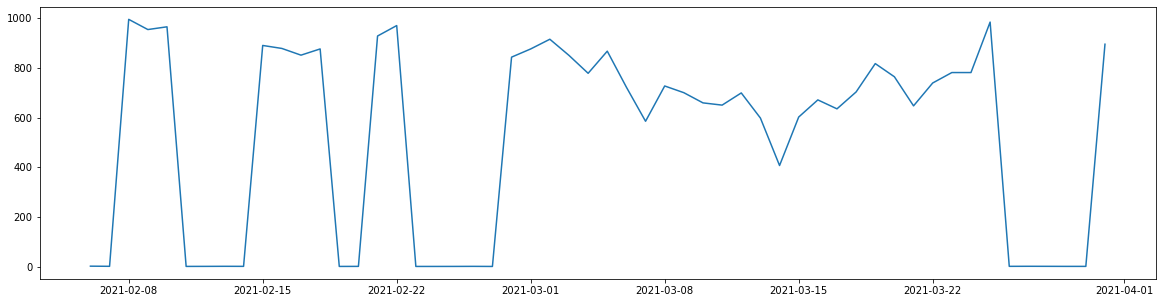

In [29]:
plt.figure(figsize = (20, 5))
plt.plot(ss12["Transiti - Totale"])
plt.show()

Asse viario Modena-Sassuolo tra Modena e Baggiovara


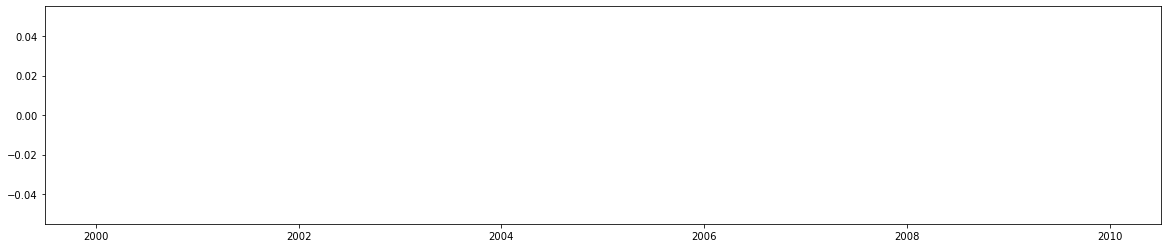

NSA 313 - Prosecuzione tangenziale di Bologna complanare sud alla A 14 nel tratto San Lazzaro/Idice


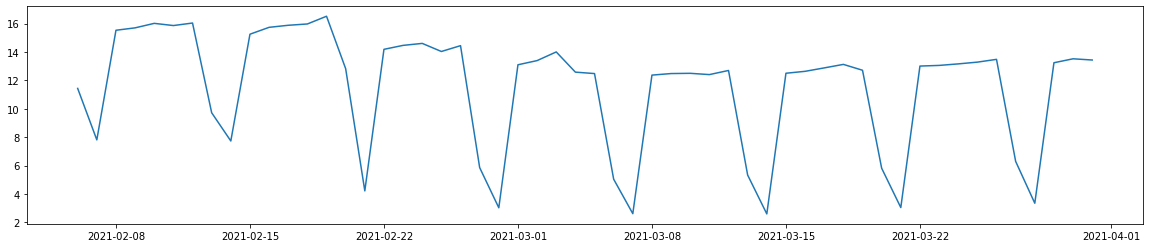

Piazzale Milano (ex SS 9) c/o ponte fiume Po


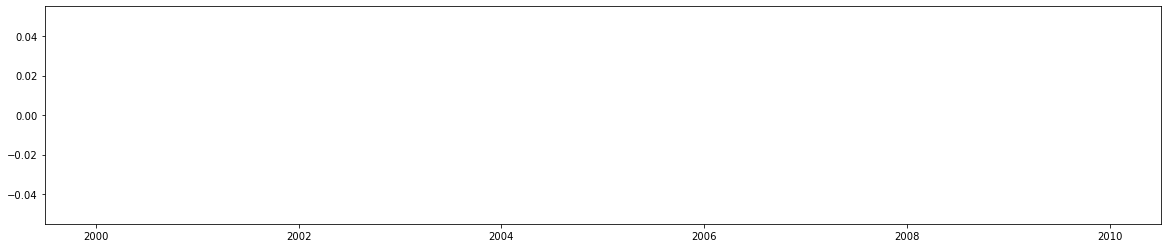

SP 1 da Villafranca di Forlì al confine provinciale


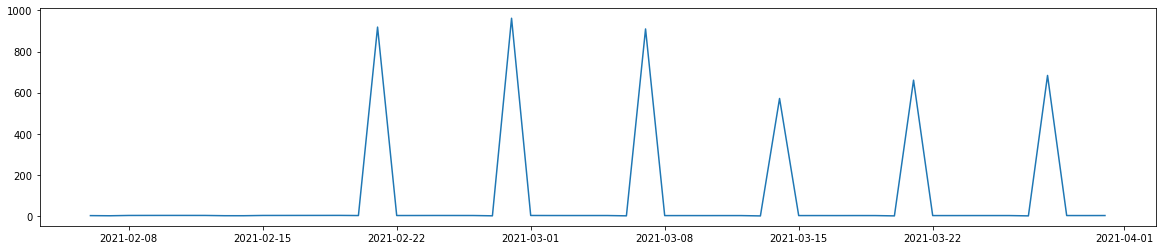

SP 1 fra Crevalcore e Decima


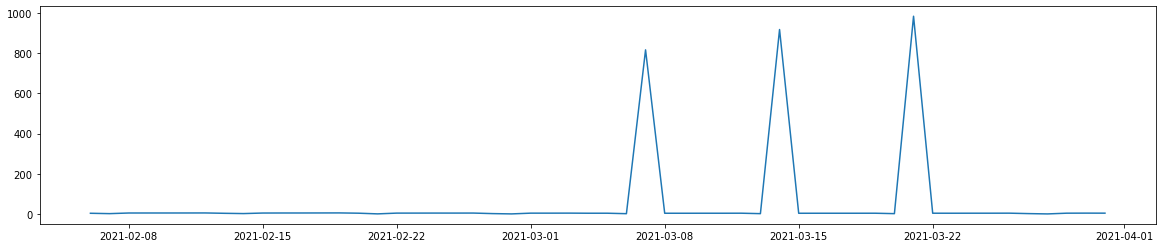

SP 1 tra intersezione SP7 a Piacenza


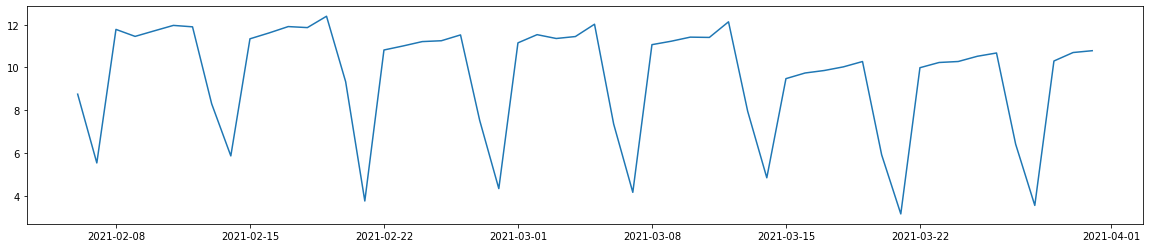

SP 10 da San Secondo Parmense al bivio per Roccabianca centro abitato Pizzo


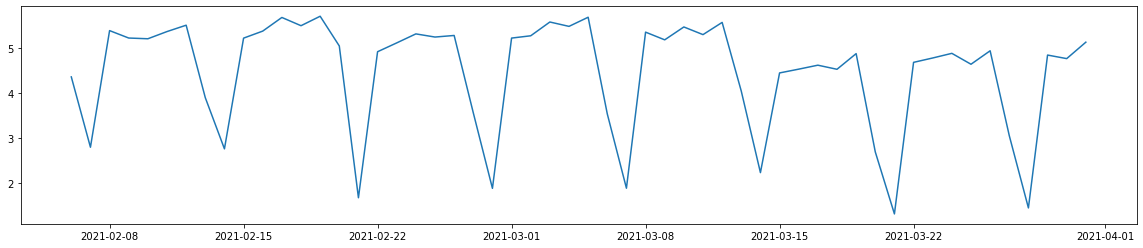

SP 10 dal bivio con SP 89 (San Mauro Pascoli) c/o A 14  al bivio SS 16 (San Mauro Mare)


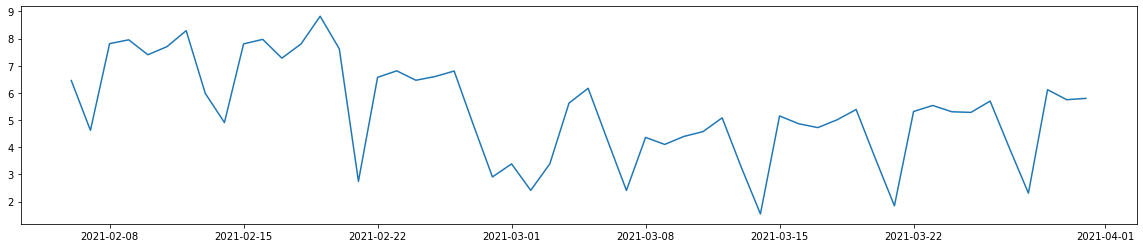

SP 10 nuovo ponte sul Po tra innesto variante Zibello e confine regionale (Lombardia)


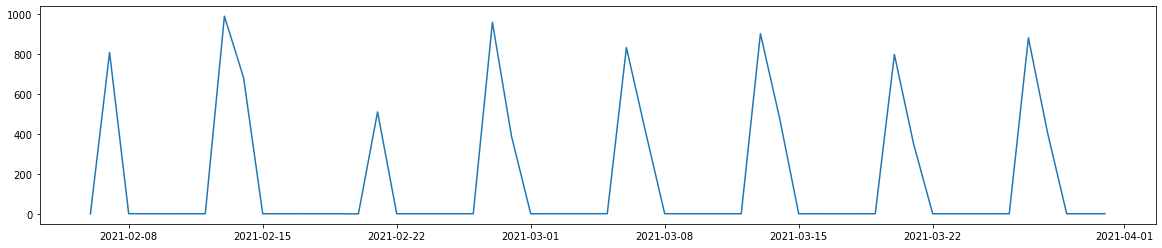

SP 10 tra Parma (Tangenziale) e Viarolo


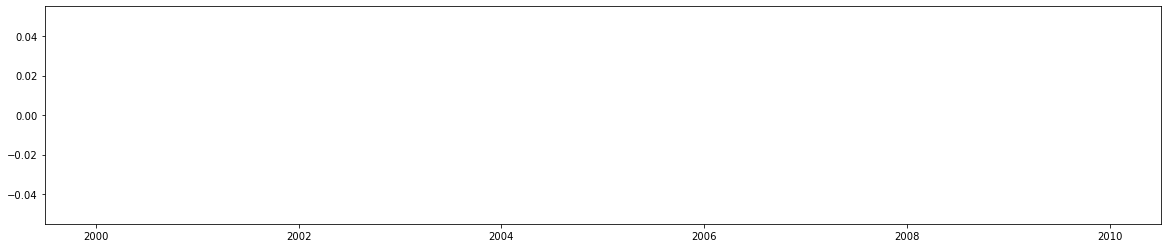

SP 10 tra Polesine e Roccabianca su variante Zibello


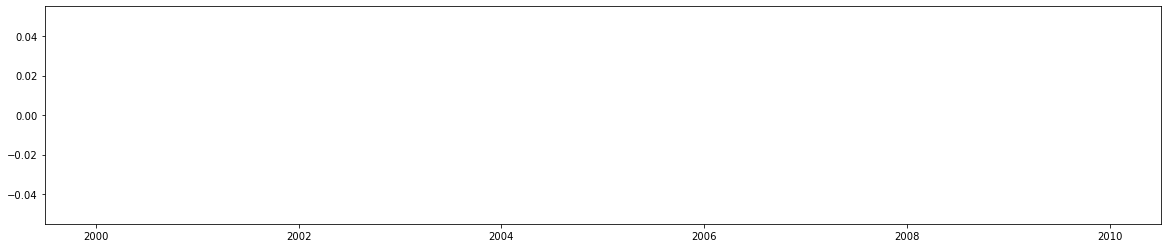

SP 10R fra Caorso e Roncaglia


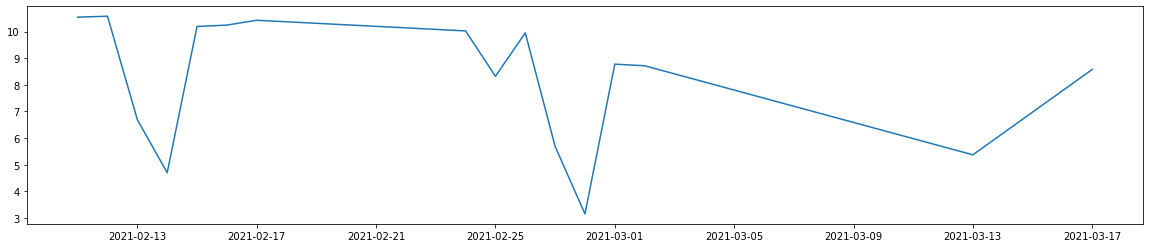

SP 10R fra Castelvetro Piacentino e Monticelli d'Ongina


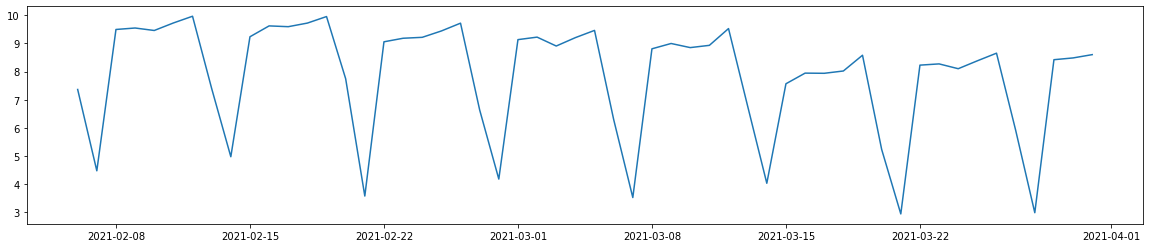

SP 10R fra Castelvetro Piacentino e confine regionale (Lombardia)


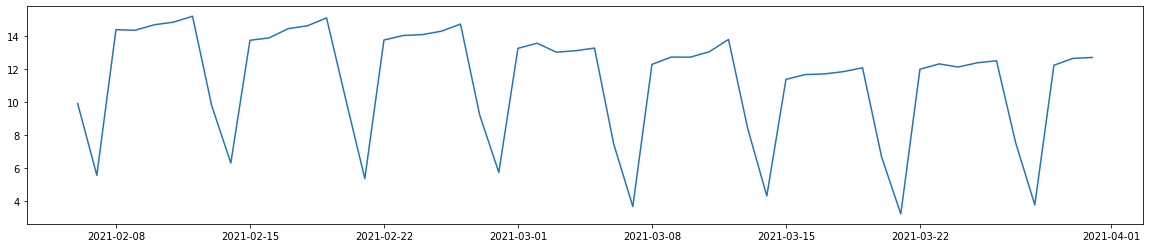

SP 10R tra Castel San Giovanni e Sarmato


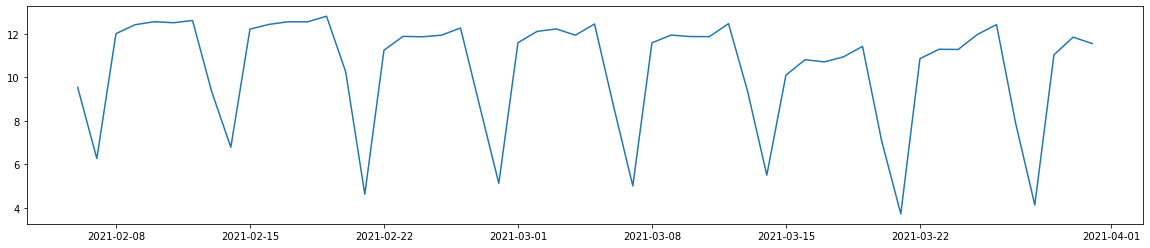

SP 10R tra Piacenza (Casello A 1/A 21) e il bivio SP 10R e SP 587R


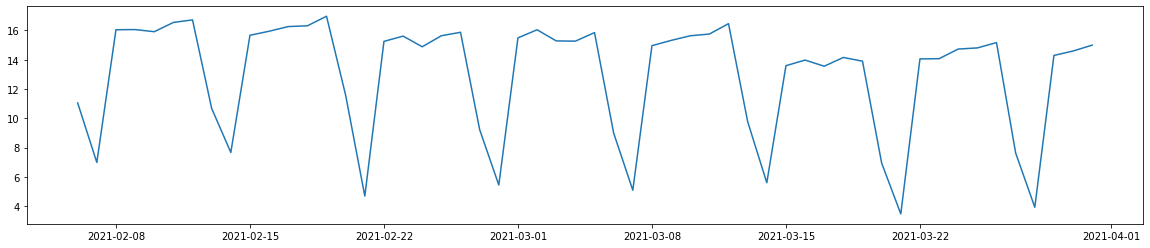

SP 10R tra Piacenza (ponte fiume Trebbia) e San Nicolo'


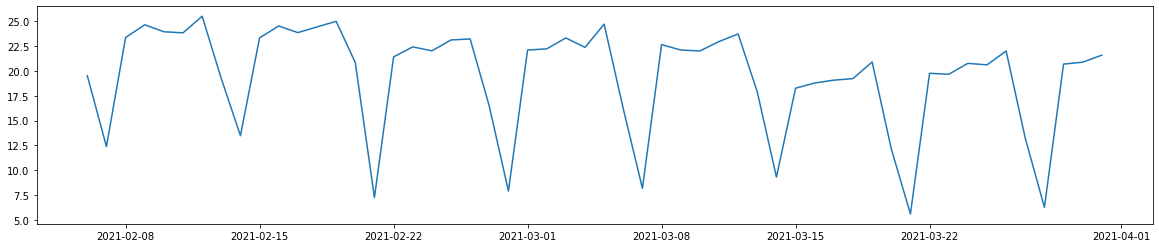

SP 11 da Soragna a Roncole Verdi


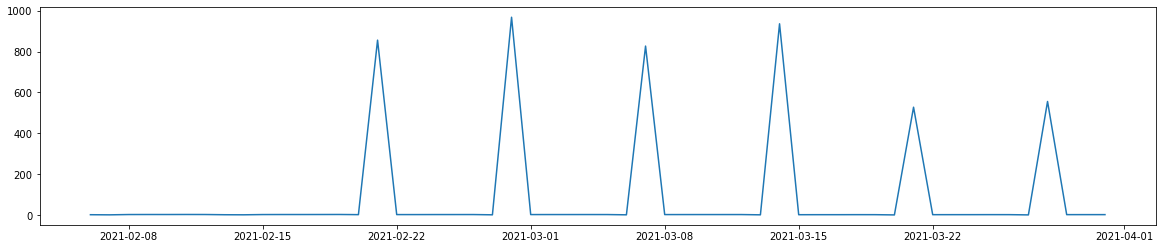

SP 11 fra Borgonovo e Gragnano


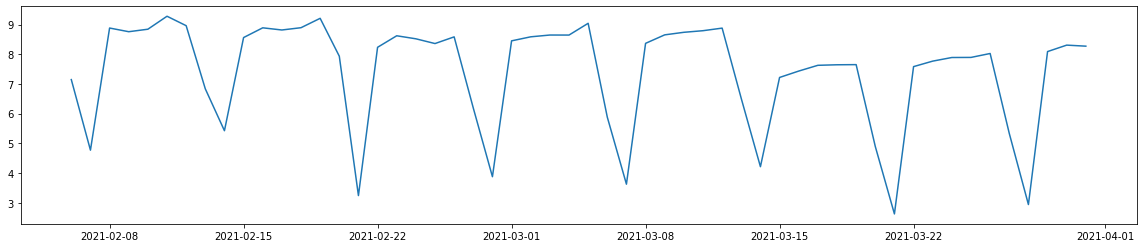

SP 11 fra Pieve di Cento e San Pietro in Casale


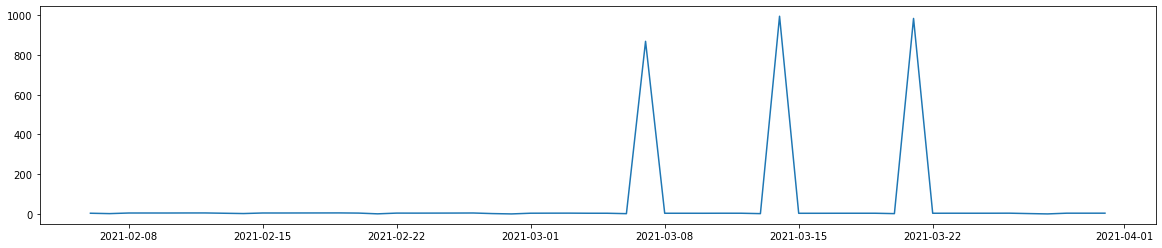

SP 11 tra Fontevivo e Cispadana (tangenziale)


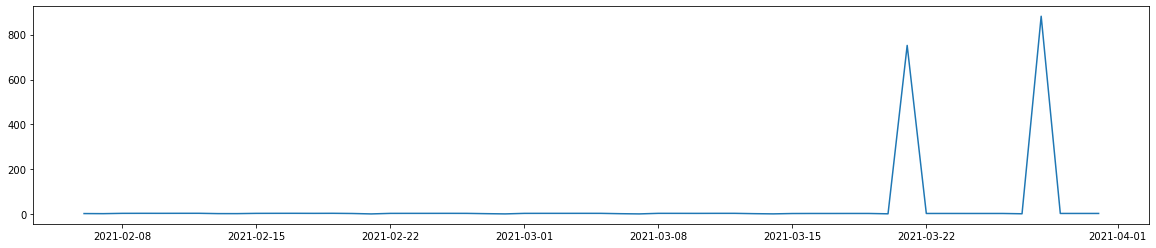

SP 111 fra via Emilia e la variante Asse Val d'Enza


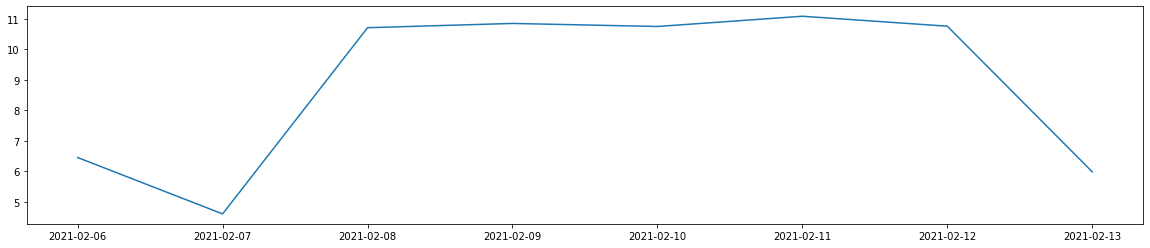

SP 111 sulla variante Asse Val'Enza (dal bivio per Nocetolo al bivio per Castelnovo di Sotto)


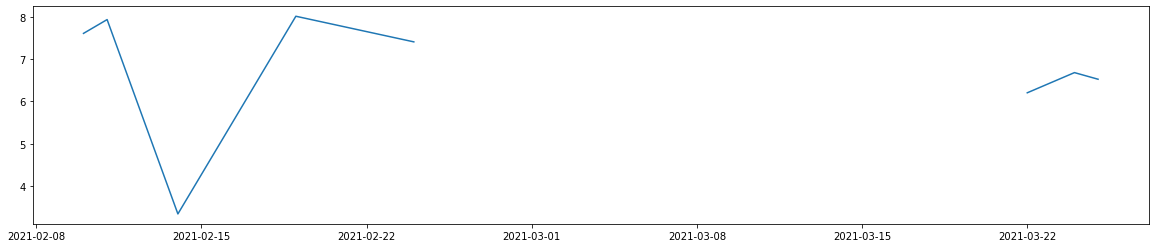

SP 111 tra Boretto e Viadana sul ponte Po


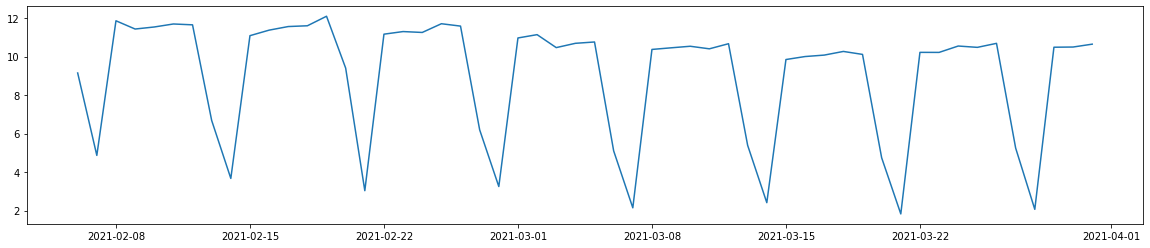

SP 111 tra bivio SP 1 (a nord di Poviglio) e Boretto (innesto variante)


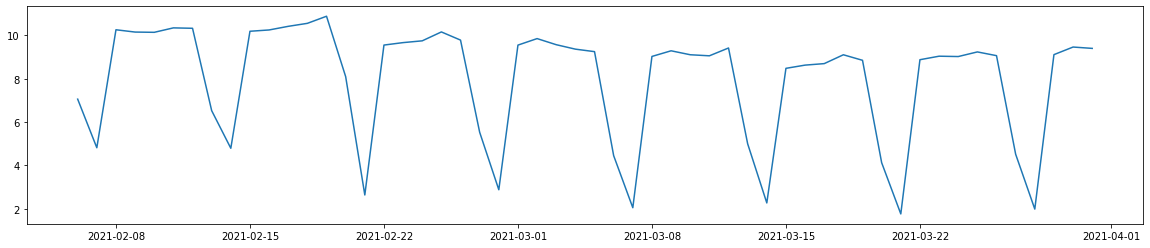

SP 113 sulla variante di San Martino in Rio/Correggio c/o le località Prato/Gazzata


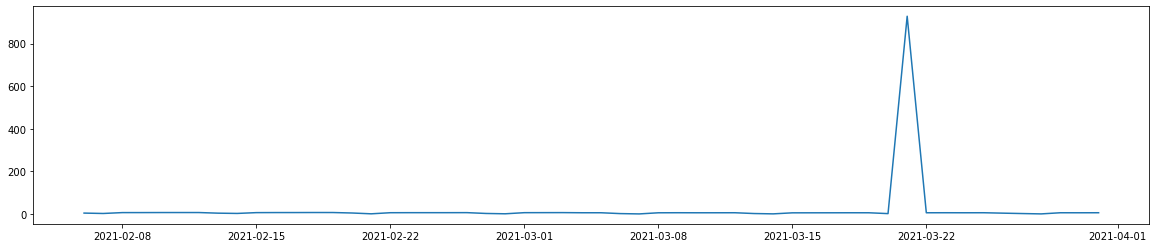

SP 114 dalla rotatoria SP 114/viale Parisoli alla rotatoria SP467


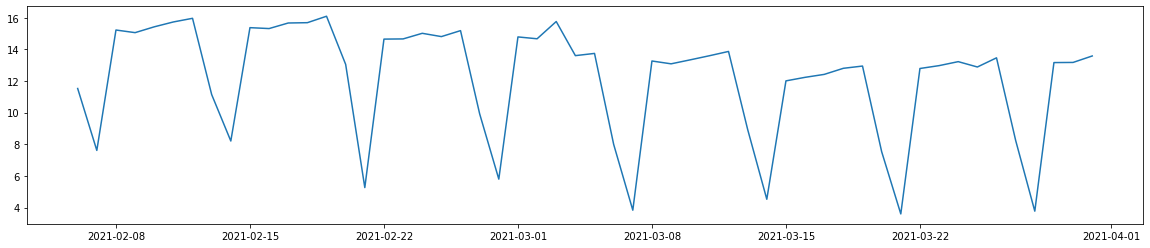

SP 118 tra Casemurate (bivio SP 254R) e il confine provinciale


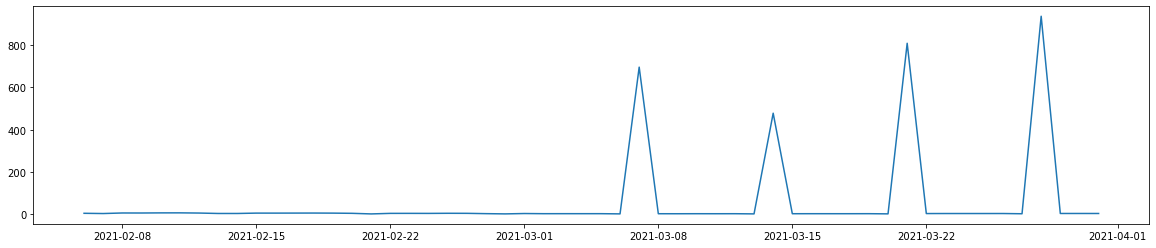

SP 12 da Fidenza (Casello A 1) a Soragna


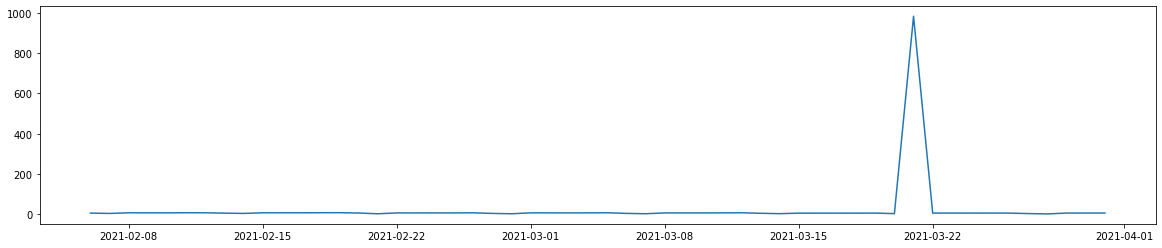

SP 12 fra San Polo d'Enza e Montecchio Emilia (variante a sud abitato)


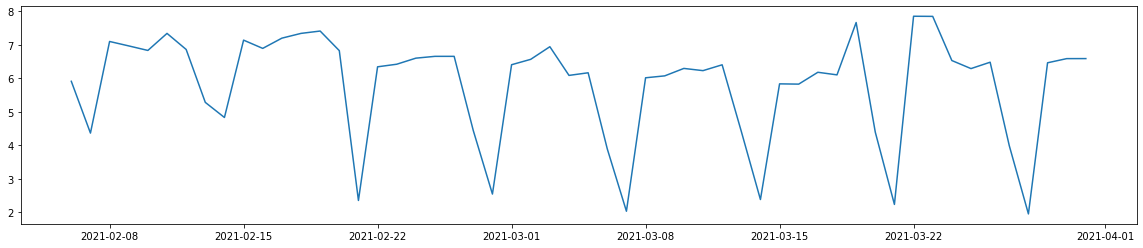

SP 12 fra Sant'Ilario d'Enza (variante a sud) e Montecchio Emilia


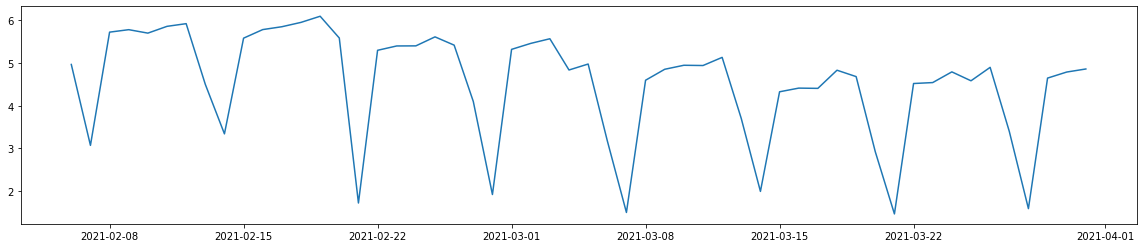

SP 12 fra casello A 1 e Fidenza


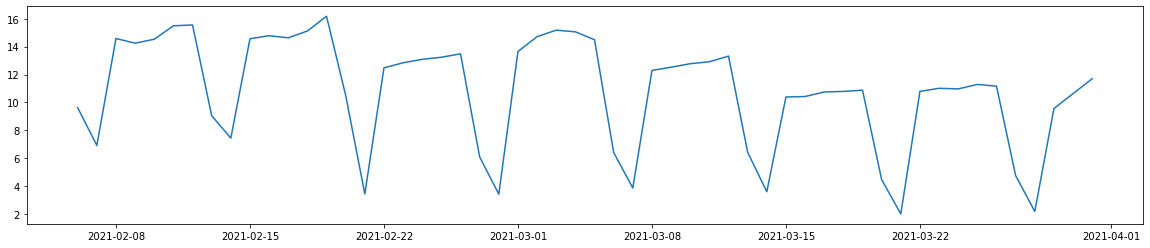

SP 13 tra SS 9 (Santarcangelo di Romagna) e SP 92 (località Camerano)


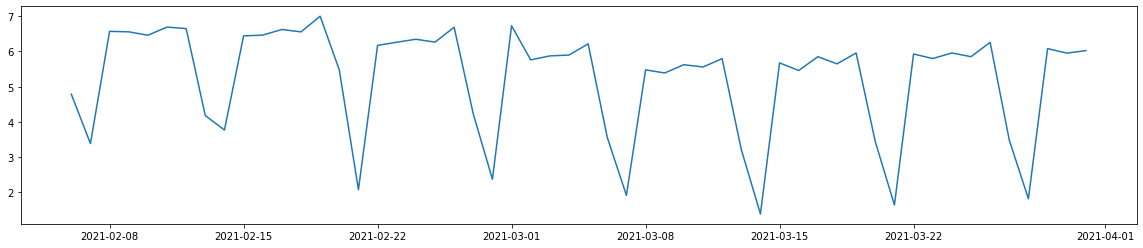

SP 136 tra Casello A 1 Rimini Nord e SS 16


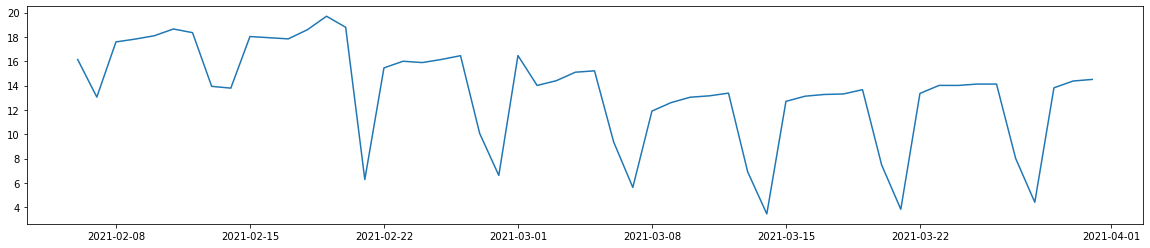

SP 138 tra S.Piero in Bagno (E 45) e Bagno di Romagna


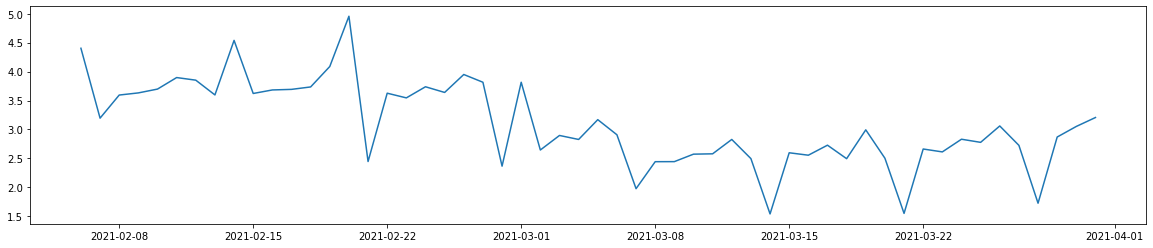

SP 14 da Poggio Berni (bivio SP 73) a Sant'Arcangelo di Romagna


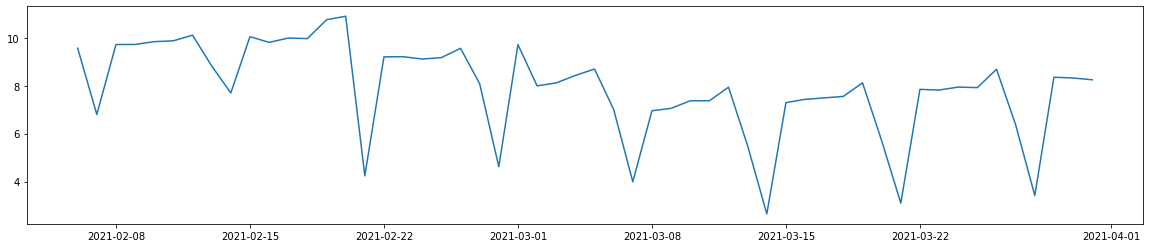

SP 14 fra Lugo (bivio SSPP 41/46) e Fusignano


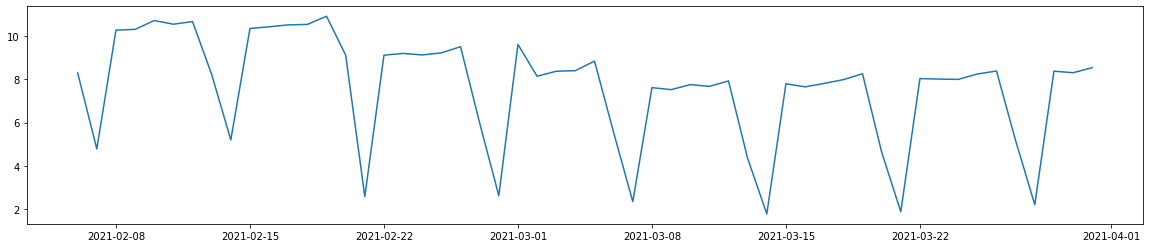

SP 14 tra Colombare (bivio SP 14Ter) e bivio SP 258R


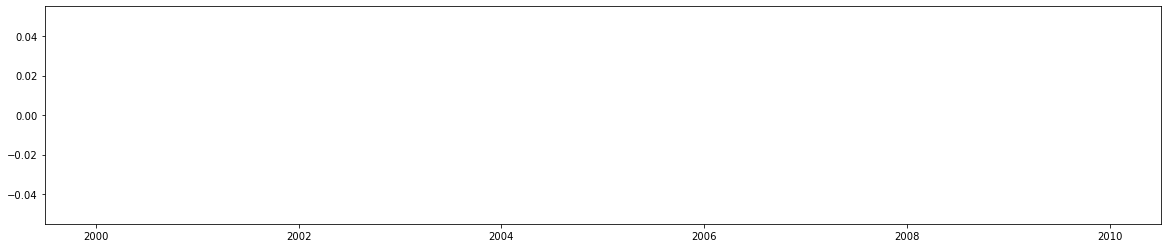

SP 140 da Diegaro (SS 9) a Pievesestina (E 45)


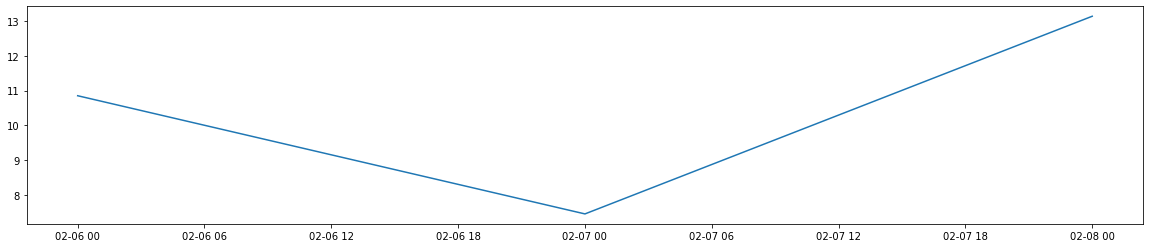

SP 15 fra SS62 e Sala Baganza


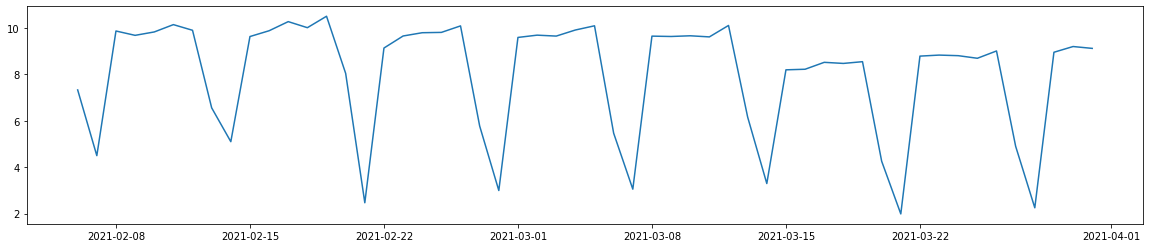

SP 15 tra Sassuolo e Magreta


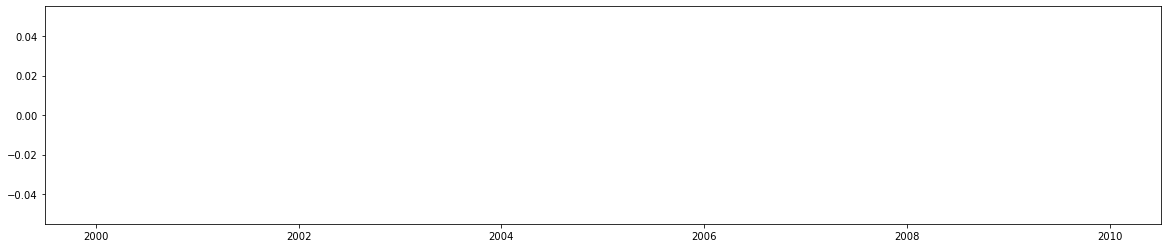

SP 15 tra Tresigallo e Massa Fiscaglia


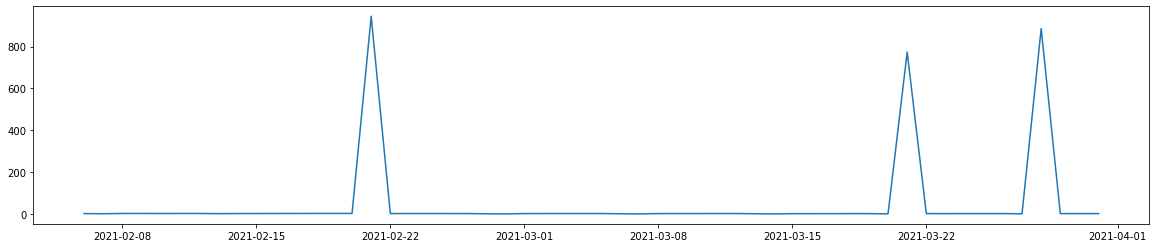

SP 16 dalla località Basilicanova al bivio SP 32 centro abitato Mamiano


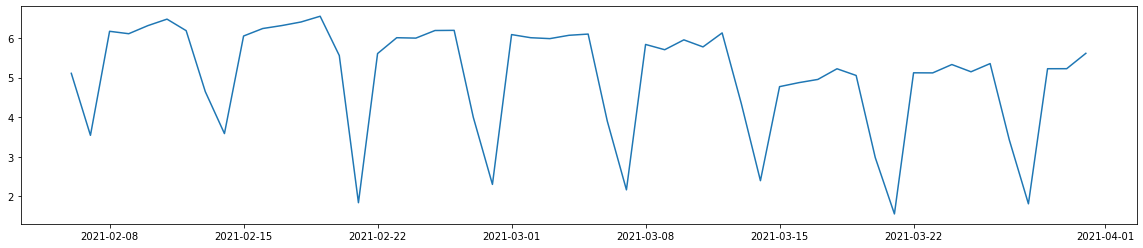

SP 17V tra San Giovanni in Marignano e Morciano di Romagna (variante)


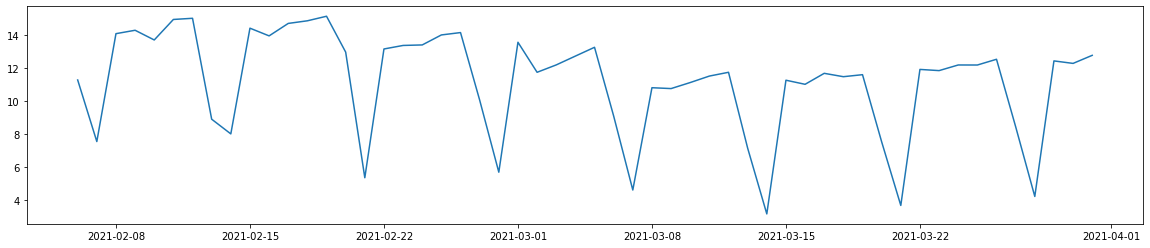

SP 18 da Pilastrello (bivio SP 513R) al bivio per la Pedemontana


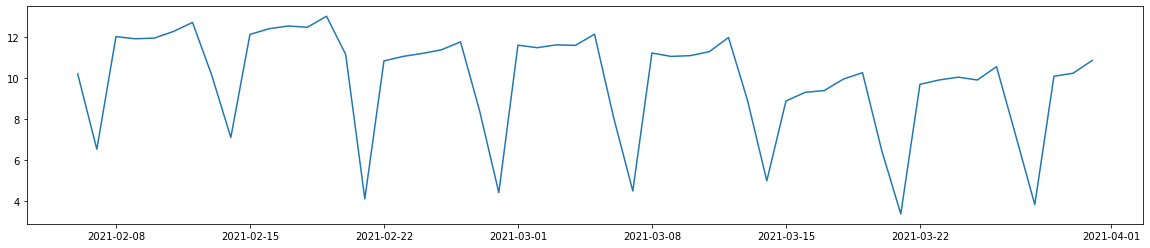

SP 18 da San Clemente al bivio SP 132 (località Osteria Nuova)


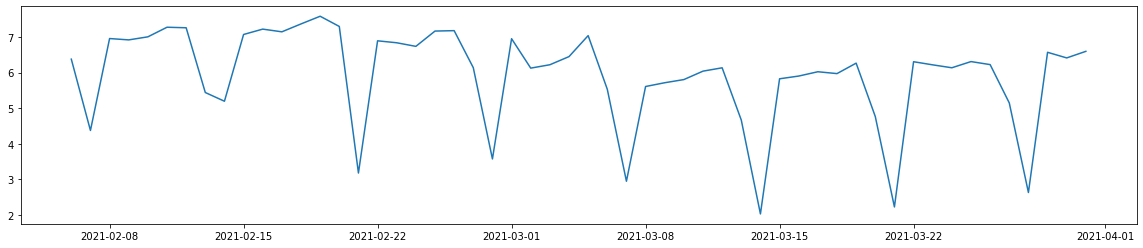

SP 18 tra Bargellino e Calderara di Reno (c/o Variante SP18)


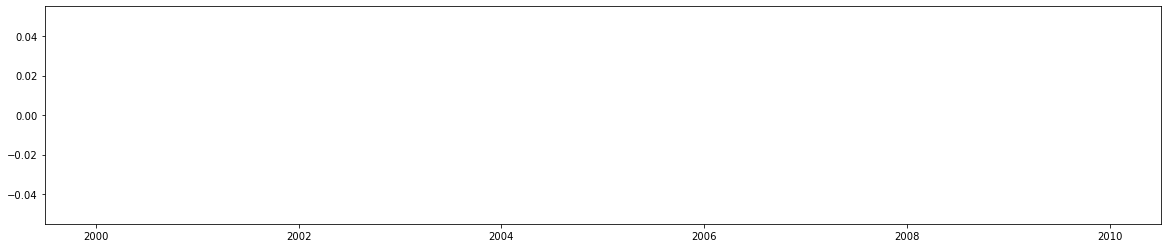

SP 18 tra Bondeno e il confine regionale (Lombardia)


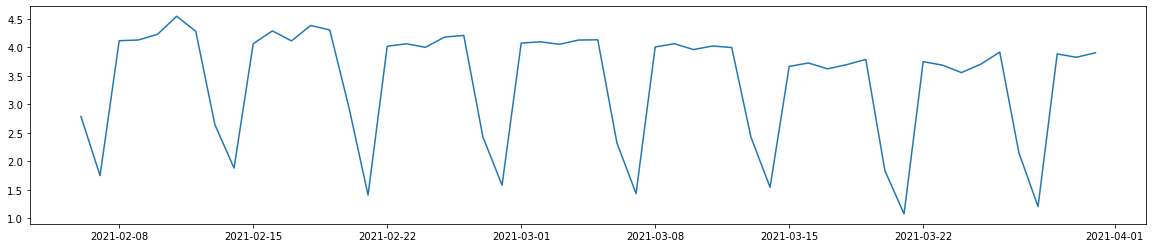

SP 19 fra Colombaia (bivio SP 76) e il Bivio SP 486R al confine provinciale


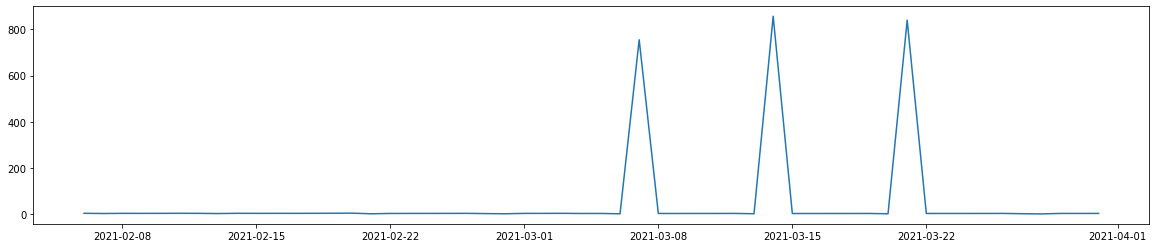

SP 19 tra SP31 e Medicina


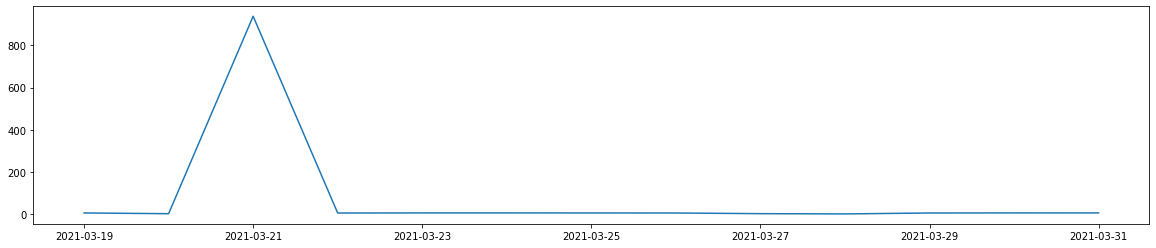

SP 2 fra Reggiolo (bivio SP 2) e località Villarotta (SP 84)


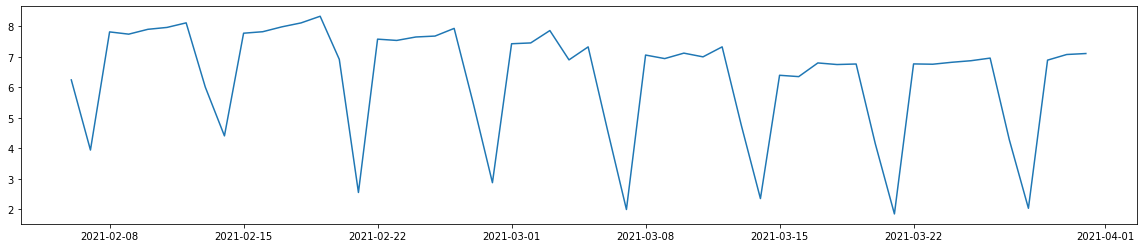

SP 2 fra Reggiolo c/o bivio variante nord e confine regionale


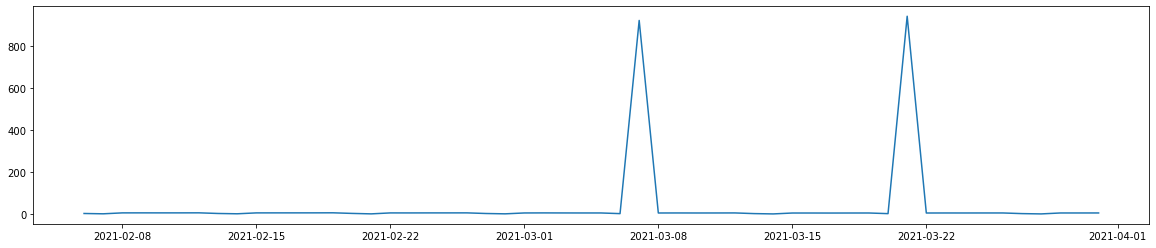

SP 2 in località La Caserma al Confine Provinciale


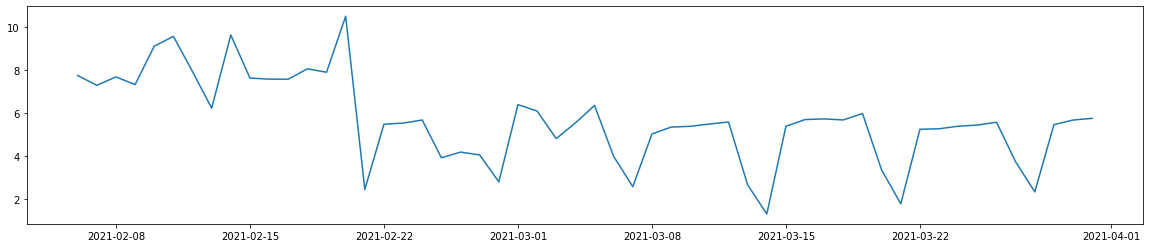

SP 2 tra intersezione SP 14 e Copparo


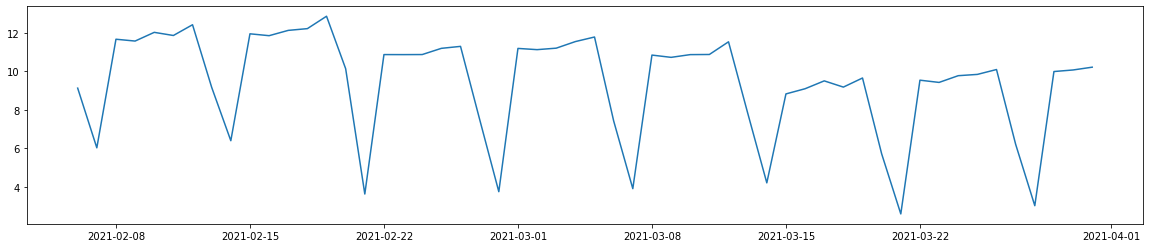

SP 21 da Castel San Pietro al bivio SP 35 (c/o Sassoleone)


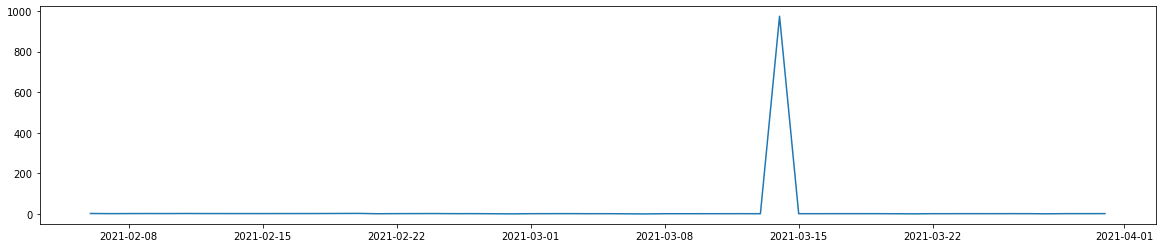

SP 23 tra Quattro Castella e la Variante di Montecavolo (c/o bivio SP 21)


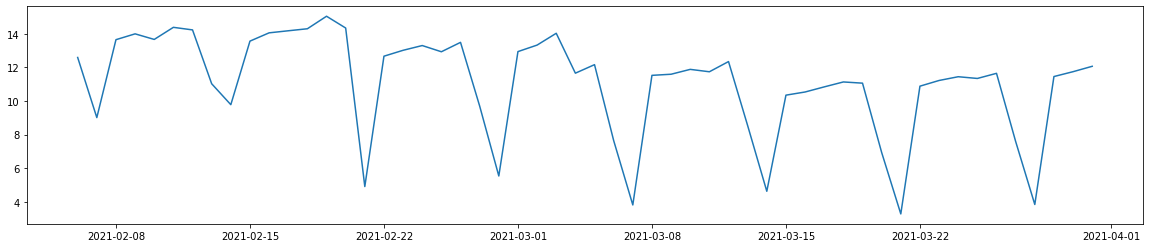

SP 23 tra Rivalta e la variante di Montecavolo


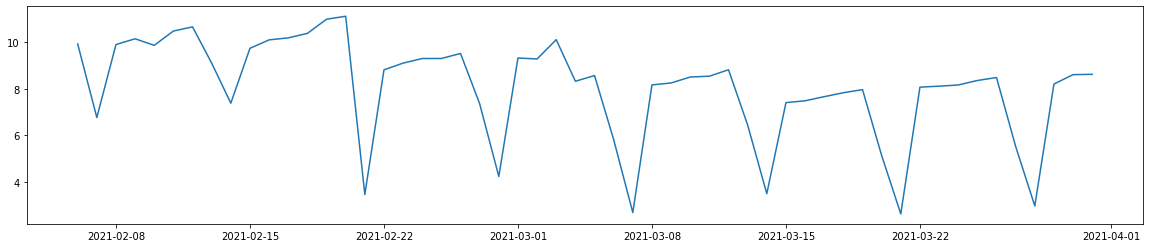

SP 25 tra intersezione con SS 64 e confine provinciale


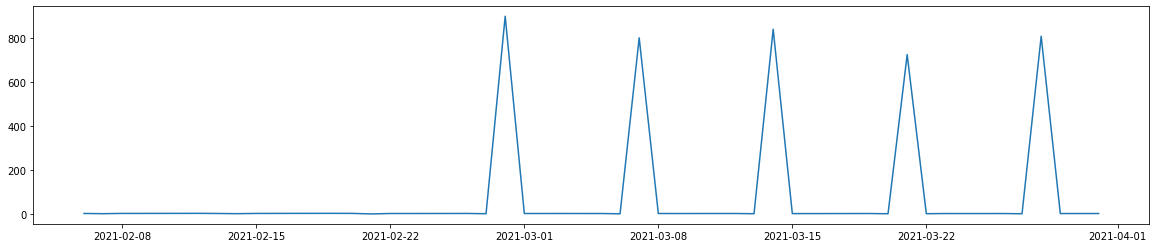

SP 253R dal bivio SP 302R allo svincolo A 14dir a Fornace Zarattini


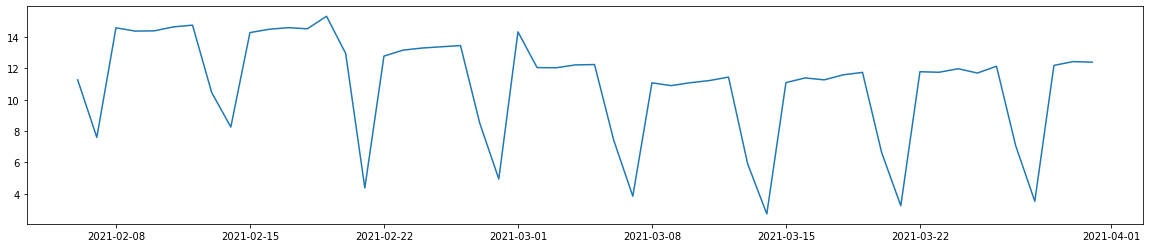

SP 253R fra Bagnacavallo (A14 Dir) e Godo (bivio SP 302R)


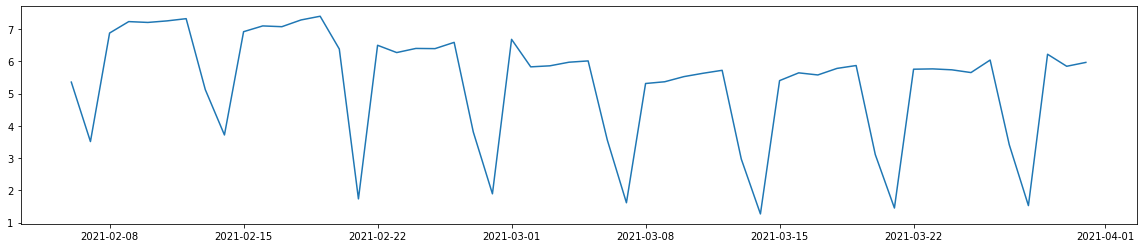

SP 253R tra Lugo (ponte fiume Senio) e Bagnacavallo


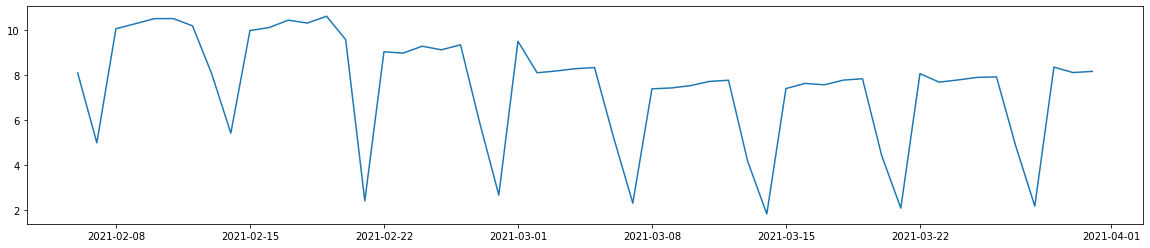

SP 254R dal ponte sul fiume Savio alla SS 16


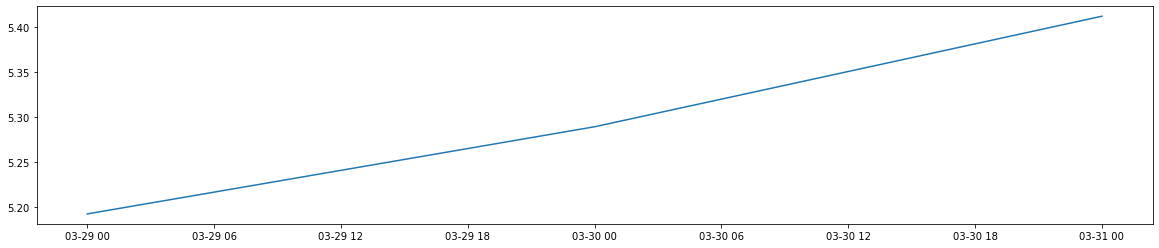

SP 255 fra Nonantola e Sant'Agata Bolognese


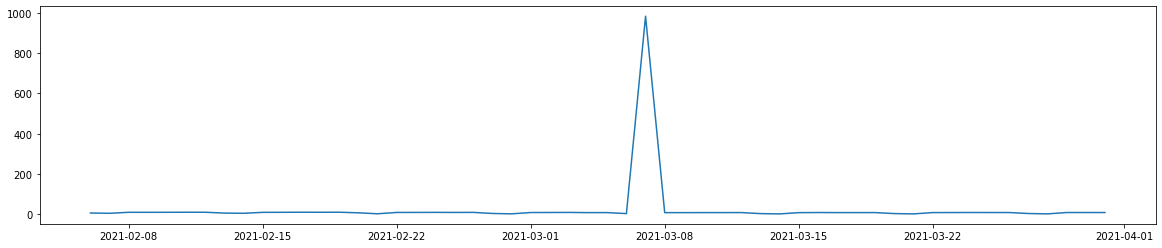

SP 255 tra Modena e Navicello


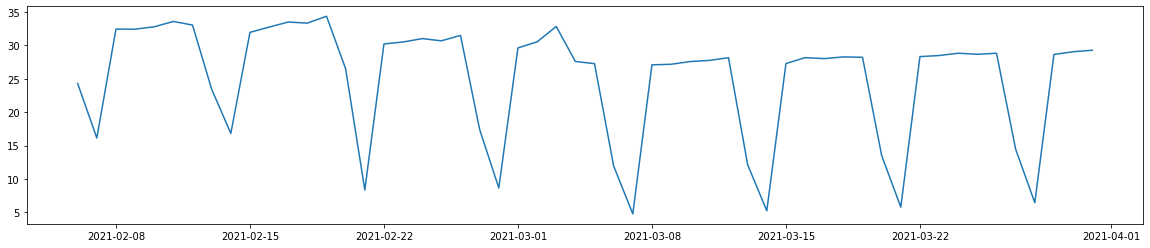

SP 258R tra Rimini e A 14


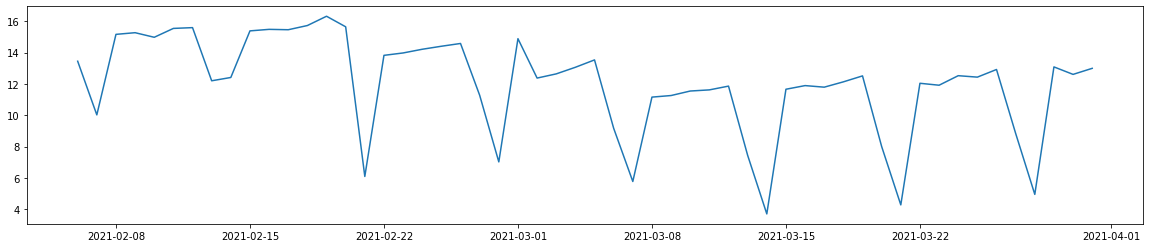

SP 258R tra Villa Verucchio ed ex Confine regionale (località Dogana)


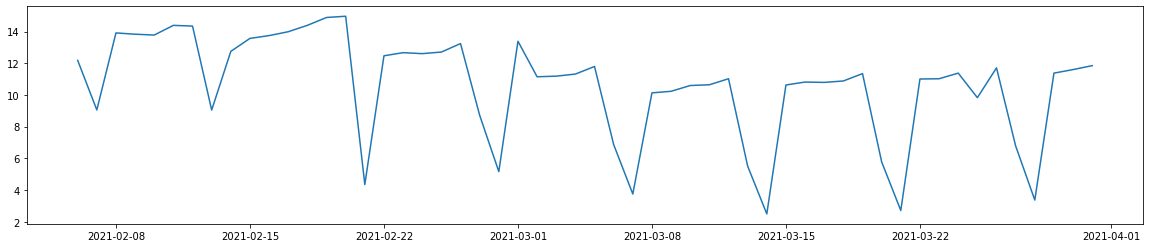

SP 26 da Santa Sofia a San Piero in Bagno


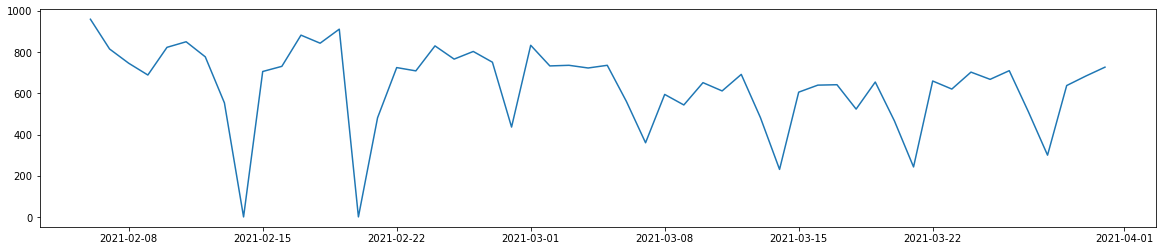

SP 26 tra Calderino e località Badia


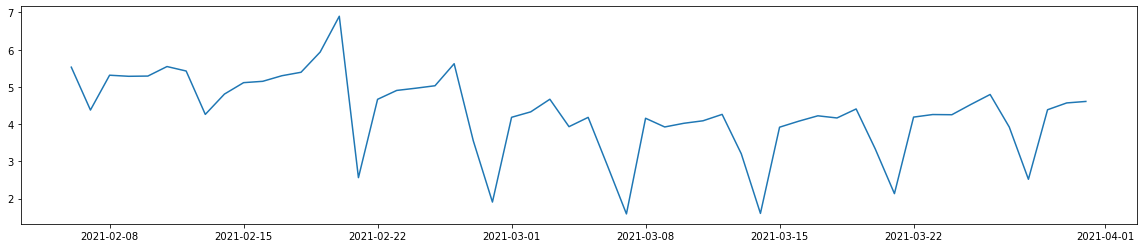

SP 26 tra Gesso e Ponte Rivabella


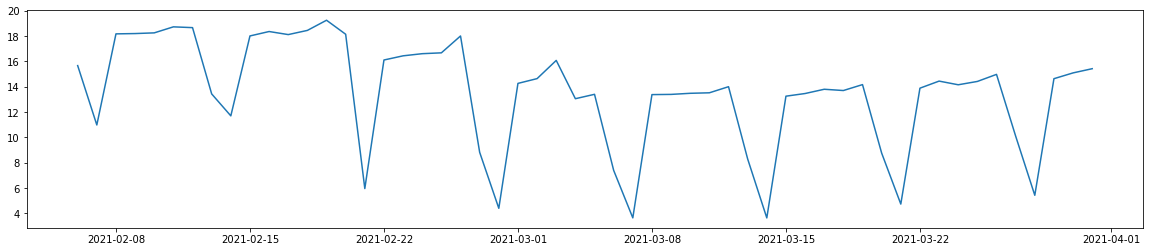

SP 27 tra Ponte Samoggia e Muffa


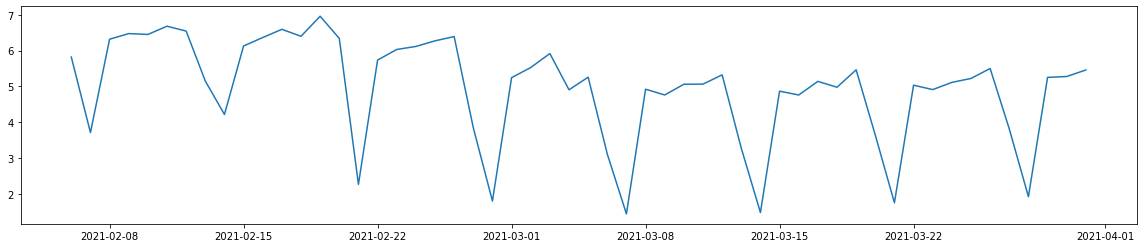

SP 28 fra Fornovo di Taro e Varano de Melegari centro abitato Viazzano


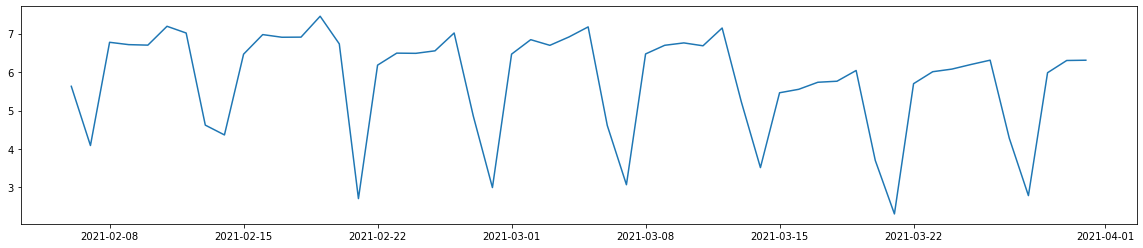

SP 28 in località Molinazzo (Comune di Gossolengo)


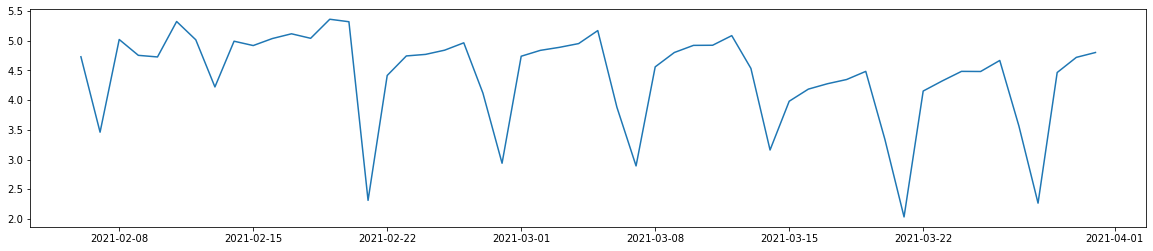

SP 28 tra Montecchio Emilia e bivio circonvallazione


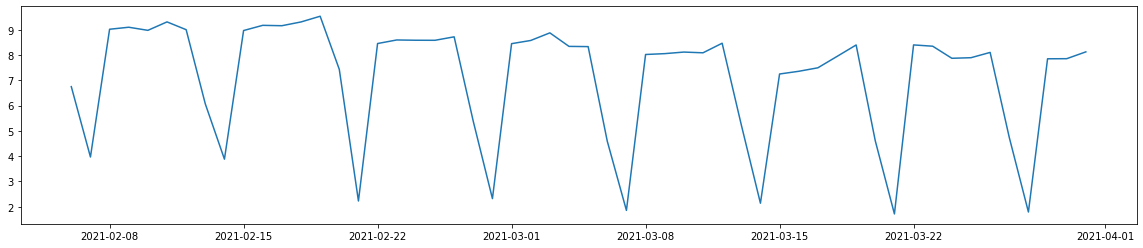

SP 28 tra Piacenza (Tangenziale Sud) e Gossolengo


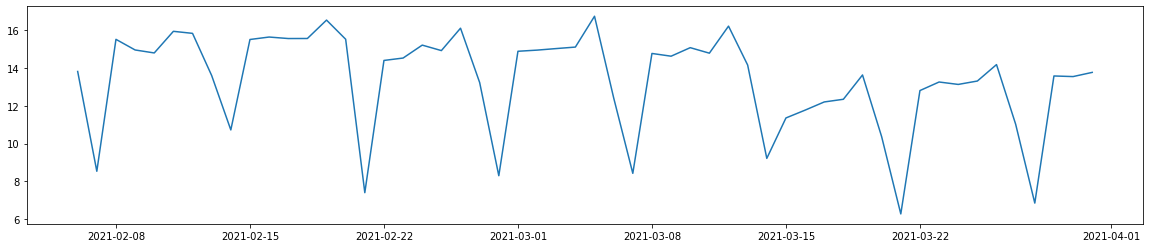

SP 3 sulla variante tra Bagnolo in Piano e il casello A 1 di Reggio Emilia


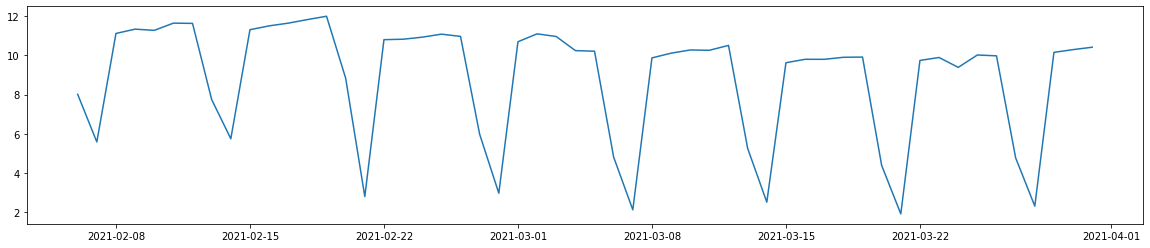

SP 3 tra San Lorenzo in Noceto e Predappio


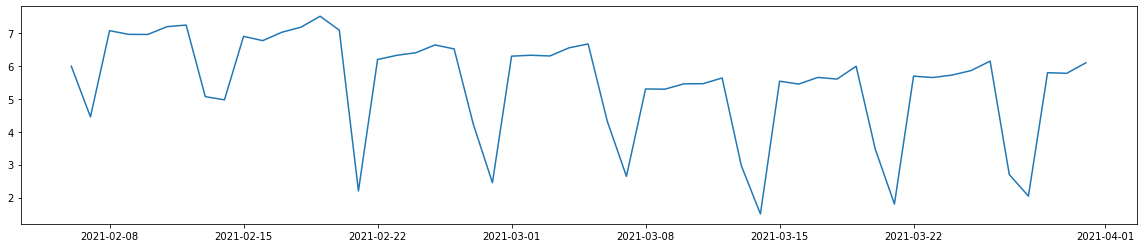

SP 3 tra via Monda e via Caminate


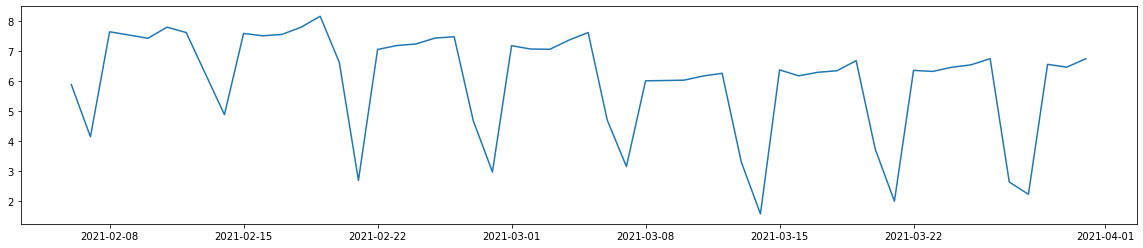

SP 30 tra Campagnola Emilia e il confine provinciale


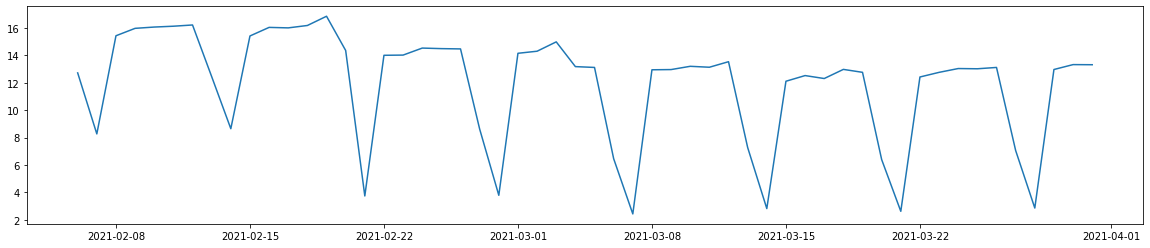

SP 302R tra Brisighella e Marradi


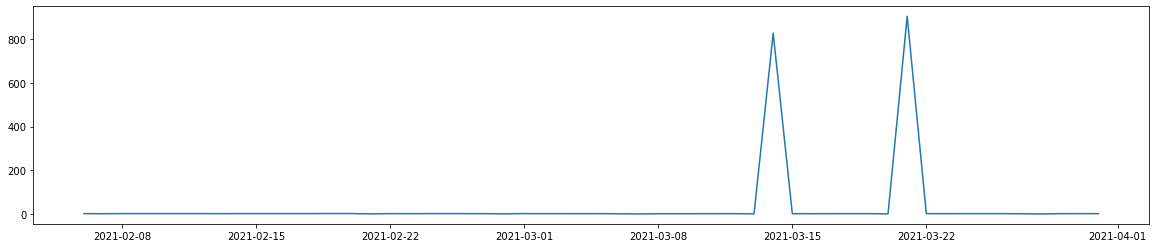

SP 302R tra Faenza (bivio SP 66) e Brisighella


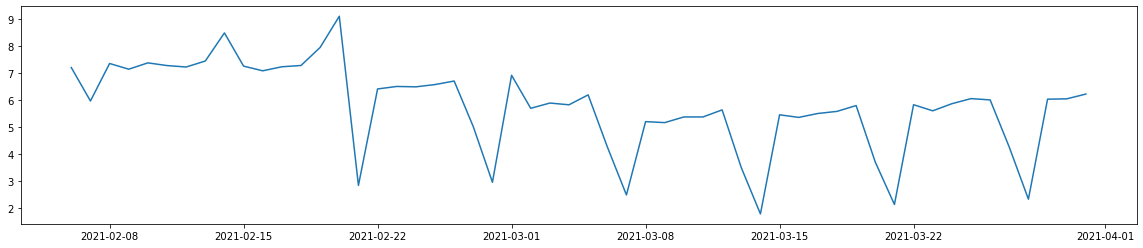

SP 306R fra Casola Valsenio e bivio SP 65 c/o località Isola


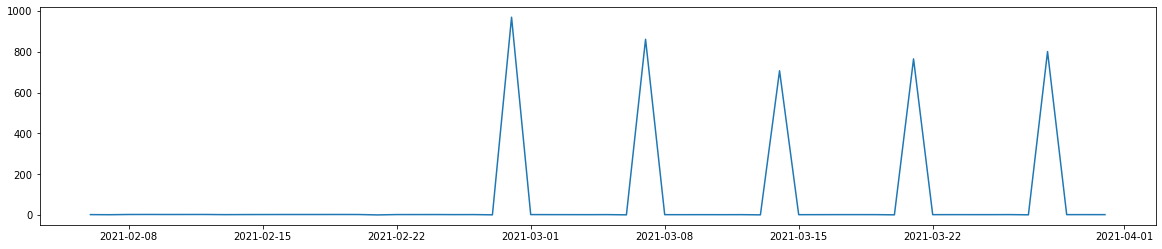

SP 306R fra Castel Bolognese e Riolo Terme


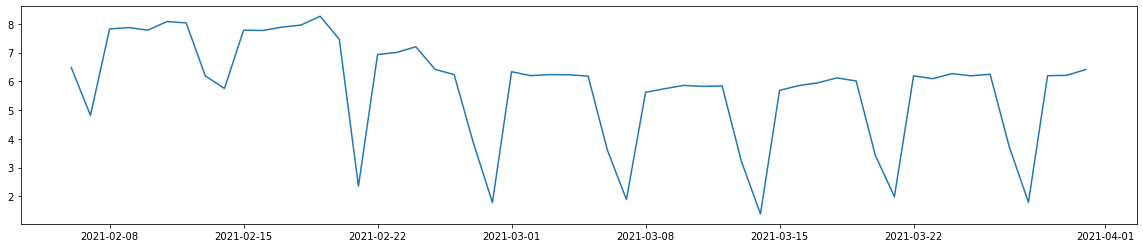

SP 31 dal bivio SP 28 per Castenaso a Ponte Rizzoli


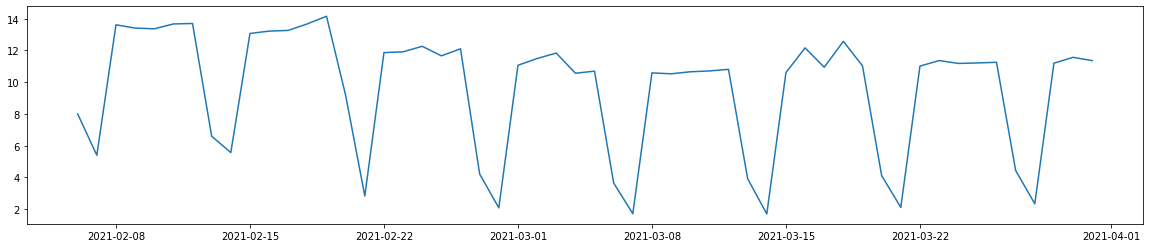

SP 31 fra bivio SP 12 in località Castelnuovo Fogliani e il confine provinciale


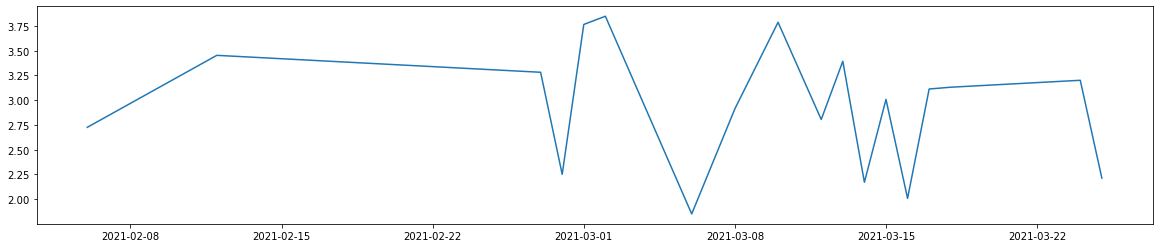

SP 31 tra Viadotto A 14 e Coriano


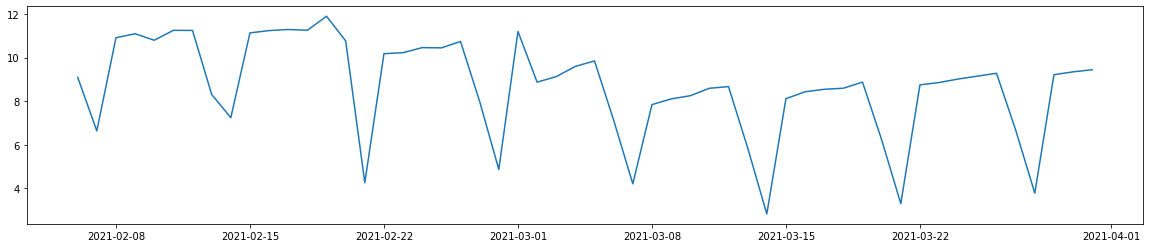

SP 32 dal bivio SP 16 (per Langhirano) al bivio SP 665R


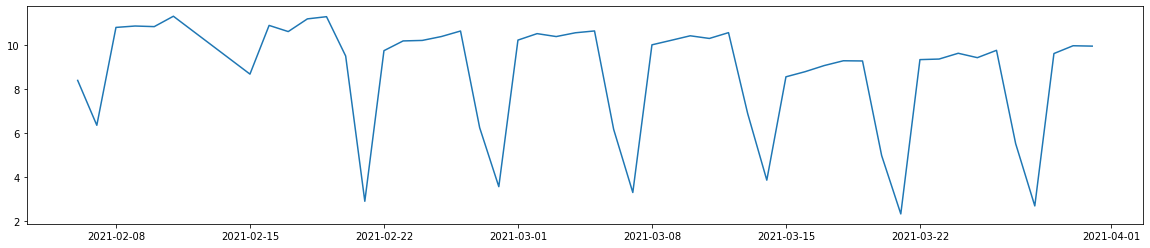

SP 324 da Silla alla intersezione SP 623


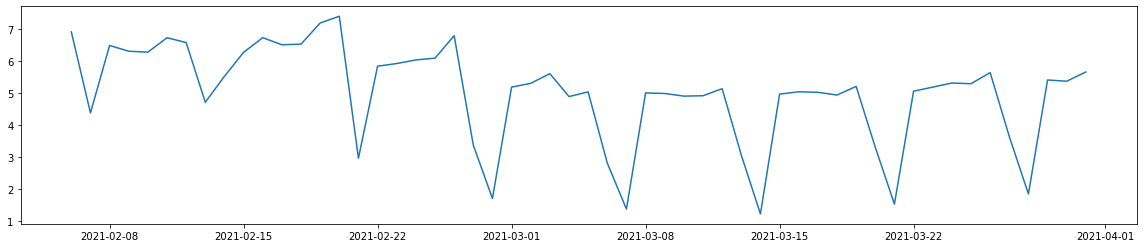

SP 325 tra Casello A 1 (Sasso Marconi) e Vado


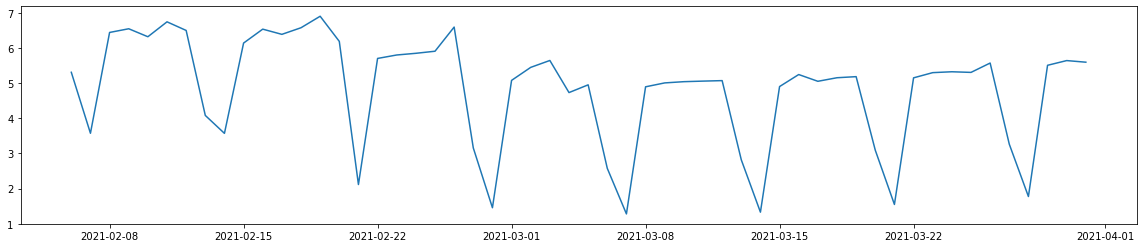

SP 33 in località Gatteo


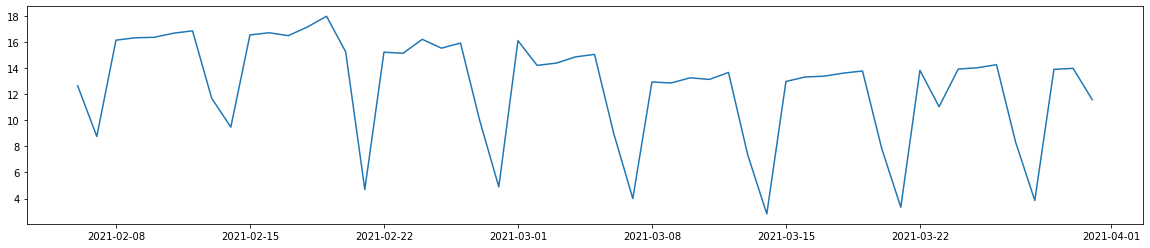

SP 34 da Colorno al bivio SP 60 (al confine provinciale)


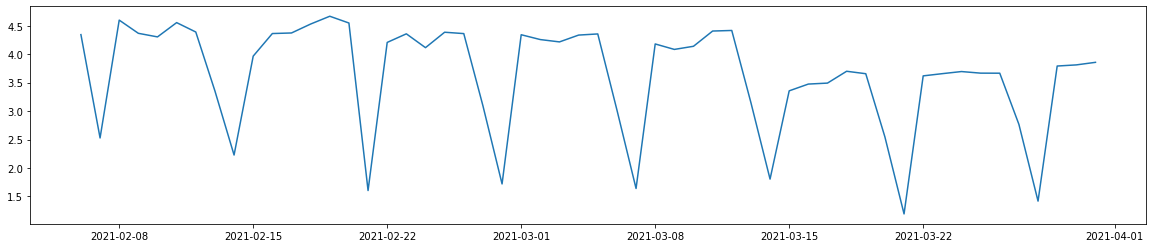

SP 343R tra Colorno e Casalmaggiore


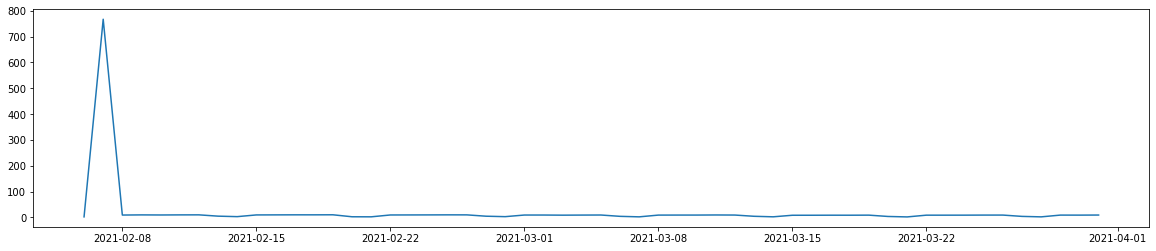

SP 343R tra Parma e San Polo


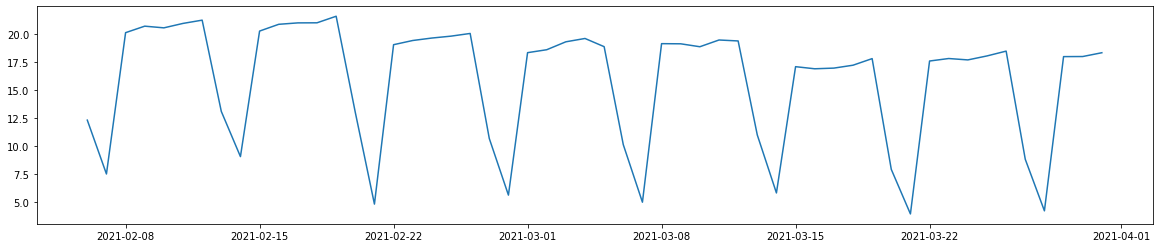

SP 35 tra bivio SP 50 (località Cella) e Sant'Andrea in Casale


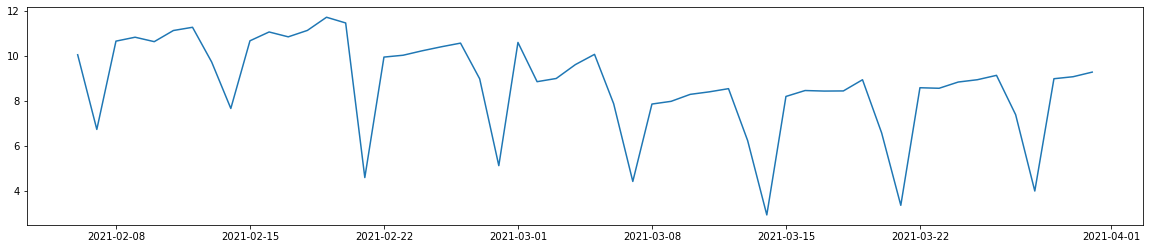

SP 357R da Fornovo di Taro al bivio SP 93 per Fidenza


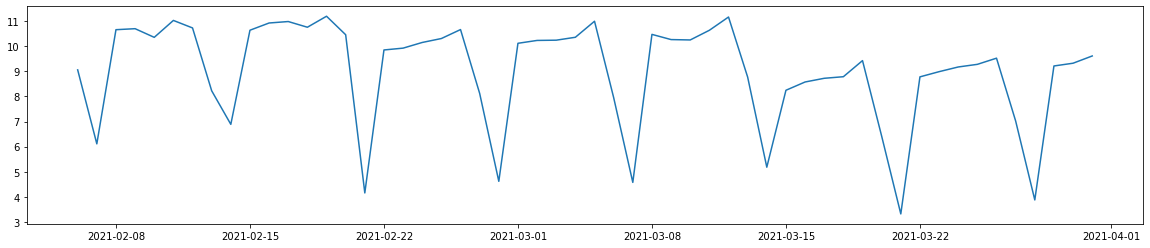

SP 357R tra SS 9 e Noceto


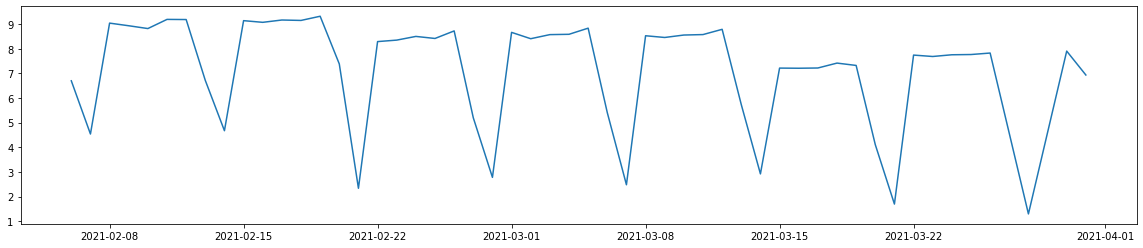

SP 359R tra Fidenza e Salsomaggiore Terme


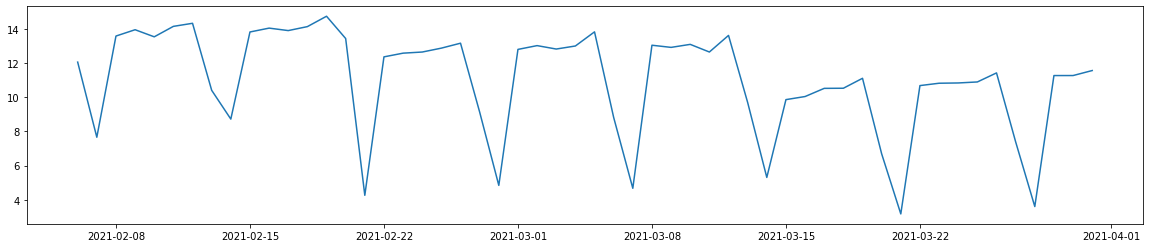

SP 37 da Sasso Marconi alla intersezione SP 58


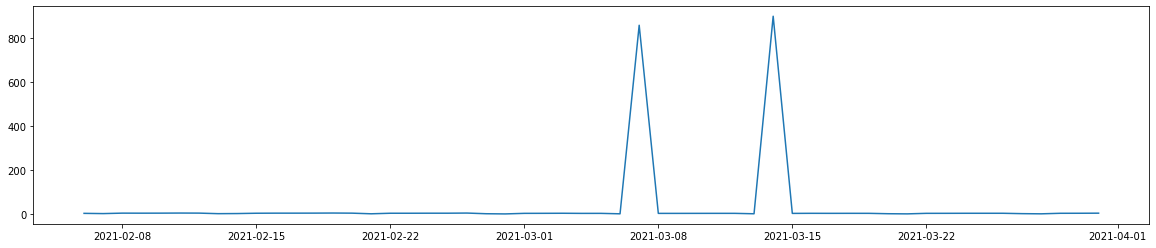

SP 37 fra Albinea e Scandiano (bivio SP 7)


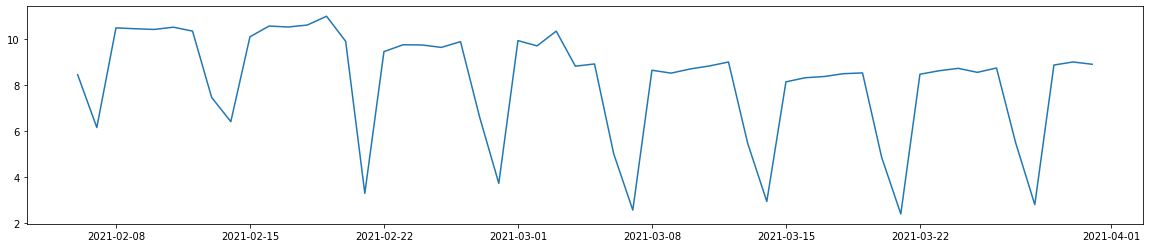

SP 37Bis dalla località Selbagnone al bivio SP 72 (Meldola)


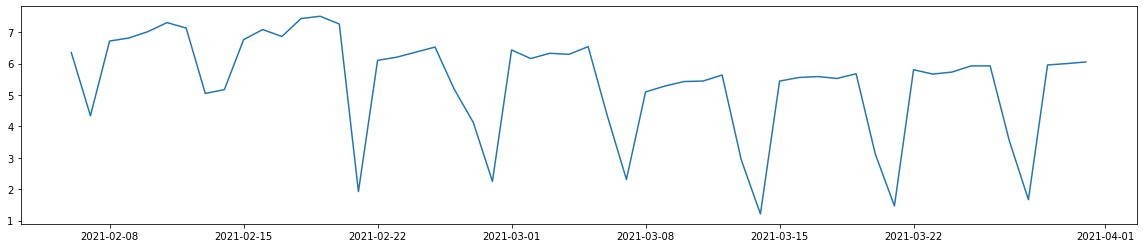

SP 3_1 tra accesso interporto Bologna e viadotto A 13


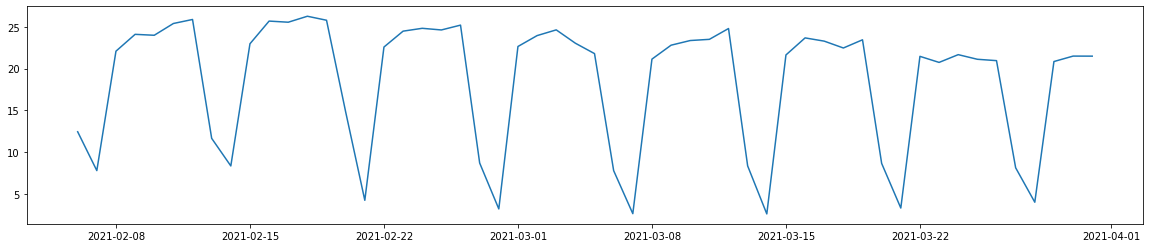

SP 3_2 tra Budrio e bivio SP 29 per Medicina


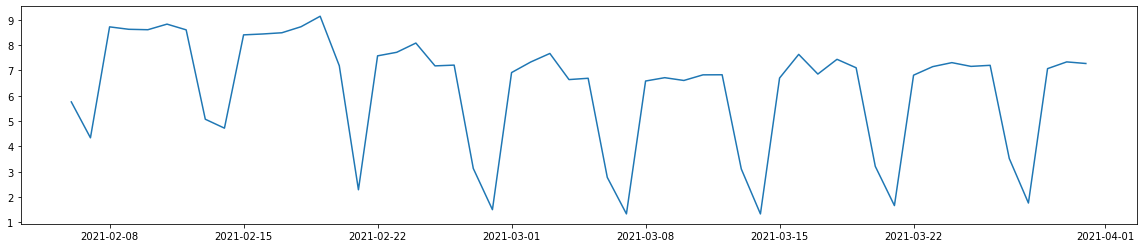

SP 4 dal bivio SP22 (per SS 12) al bivio SP 26 (per Pavullo nel Frignano)


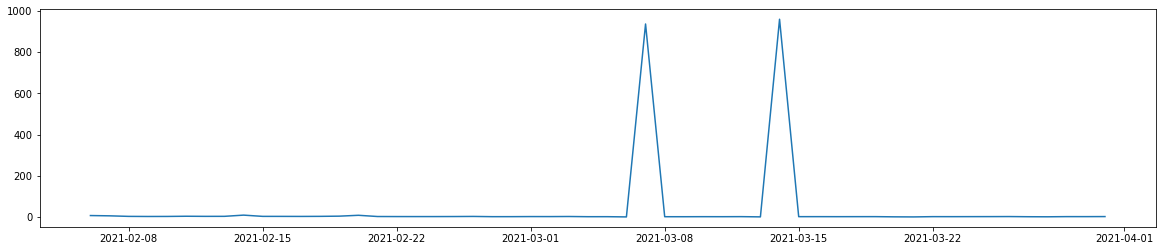

SP 4 tra Galeata e Santa Sofia


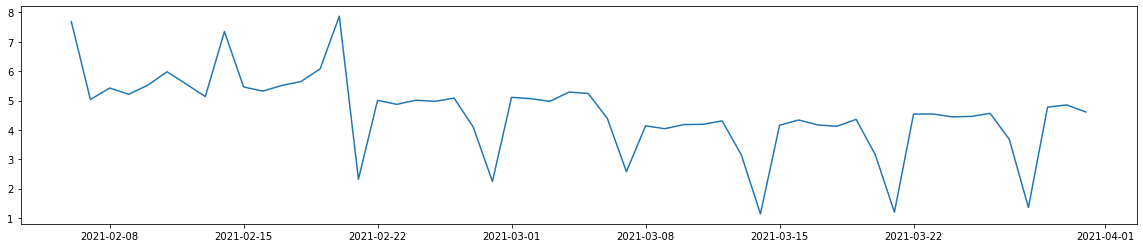

SP 4 tra Ronco (SS9) e bivio SP 72 (Para)


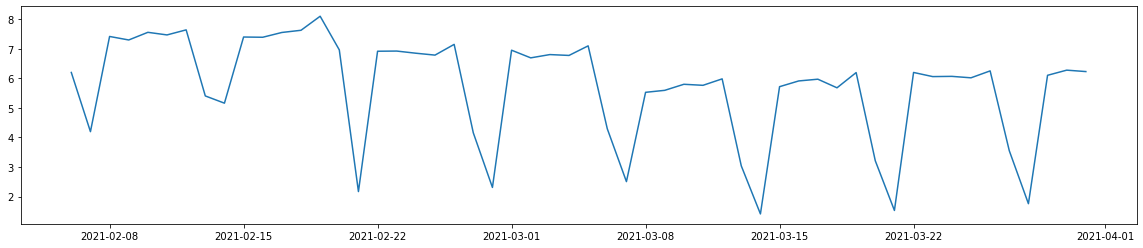

SP 4 tra San Giorgio di Piano e Intersezione SP 11 c/o San Pietro in Casale


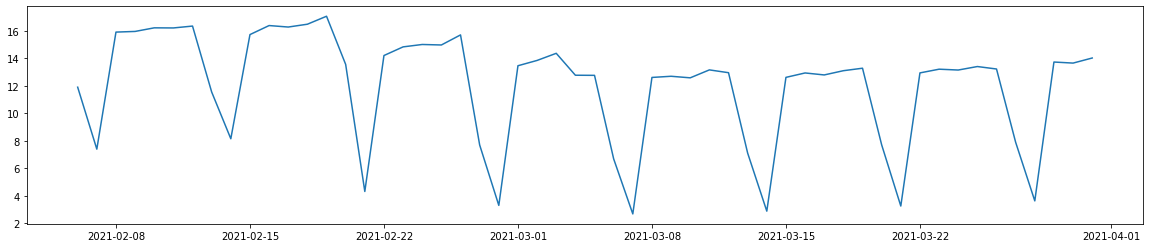

SP 4 tra San Pietro in Casale e San Vincenzo/San Venanzio


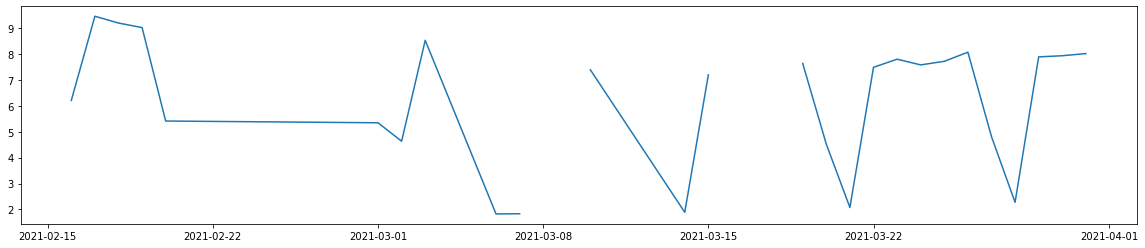

SP 41 tra Rimini (viadotto A 14) e bivio SP 49 (località Ospedaletto)


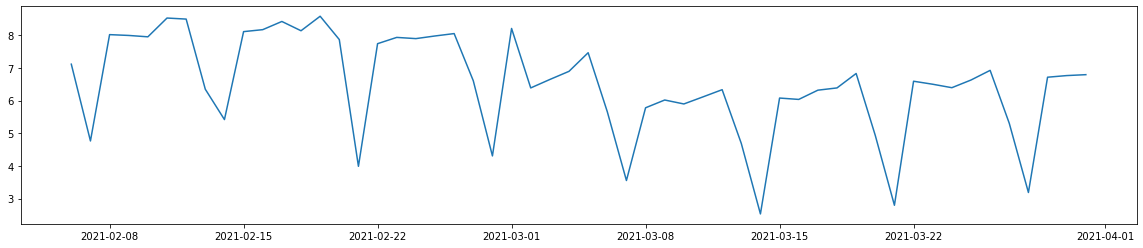

SP 412R fra Pianello Val Tidone e Borgonovo Val Tidone


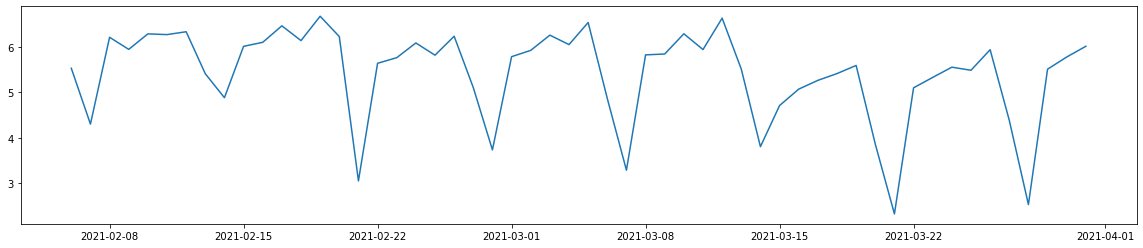

SP 412R tra Castel San Giovanni (Casello A 21) e ponte fiume Po


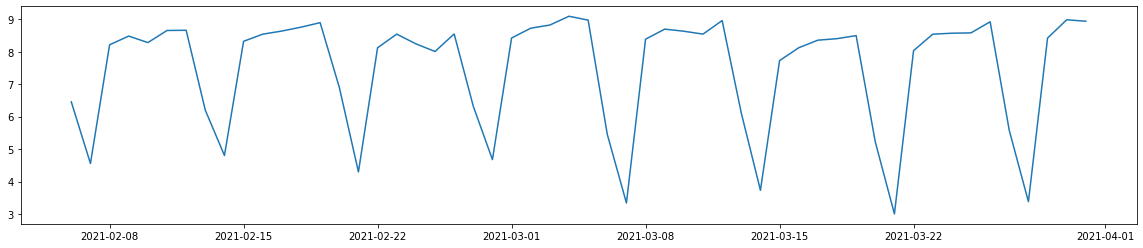

SP 413 tra Modena e Ganaceto


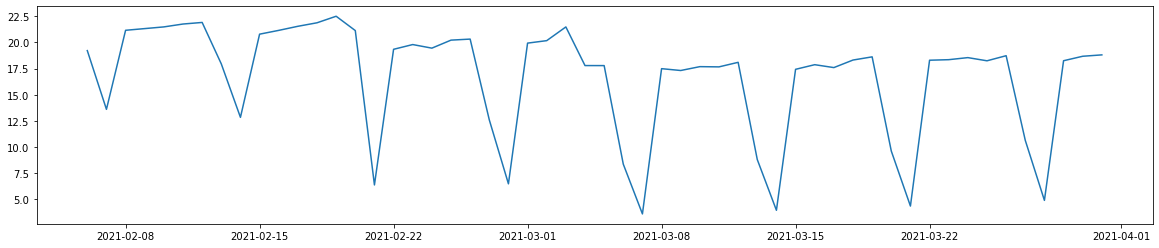

SP 42 fra Novellara e San Giacomo (SP 62R)


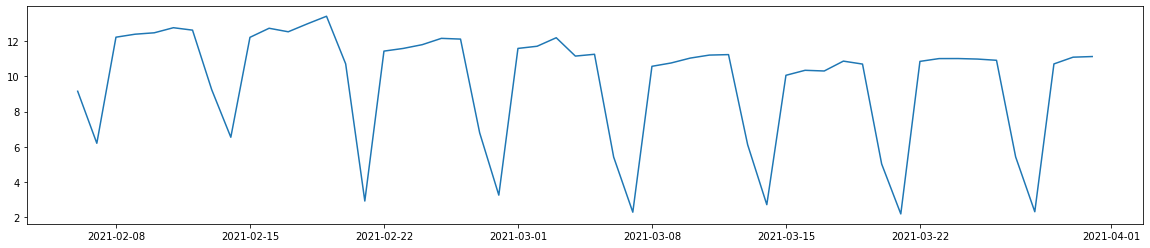

SP 42 fra Podenzano e bivio SP 6/ponte fiume Nure in località San Giorgio Piacentino


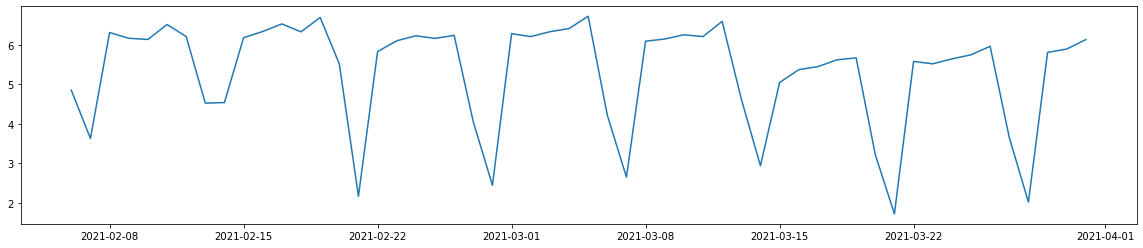

SP 43 tra Trecasali (bivio SP 8) e Torrile


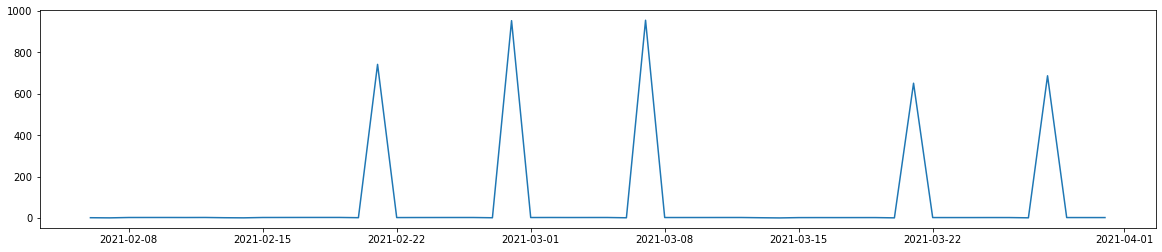

SP 462R dal bivio SP 10R in località Monticelli a Cortemaggiore


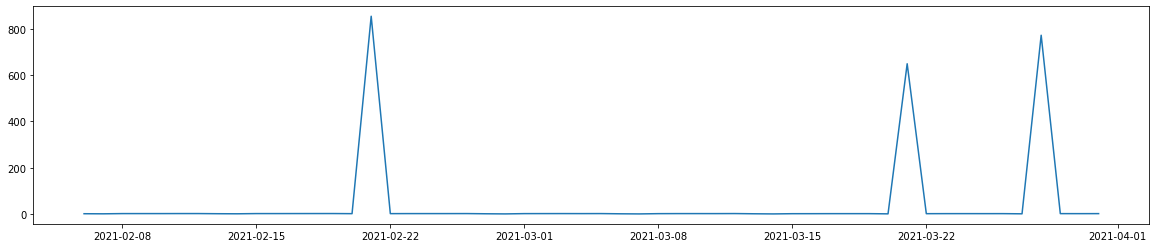

SP 462R fra Fiorenzuola d'Arda e Cortemaggiore


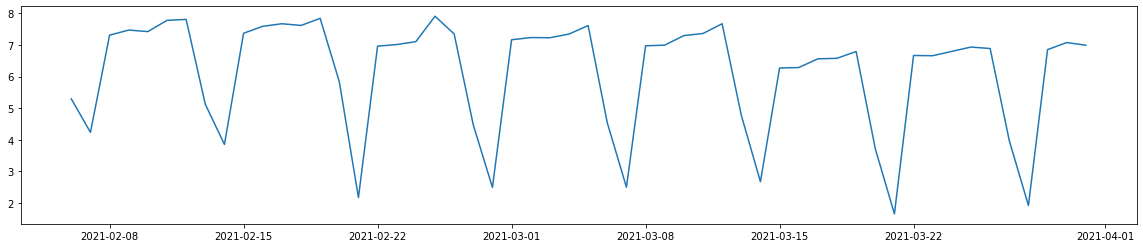

SP 467 fra SP 3 e SS 12


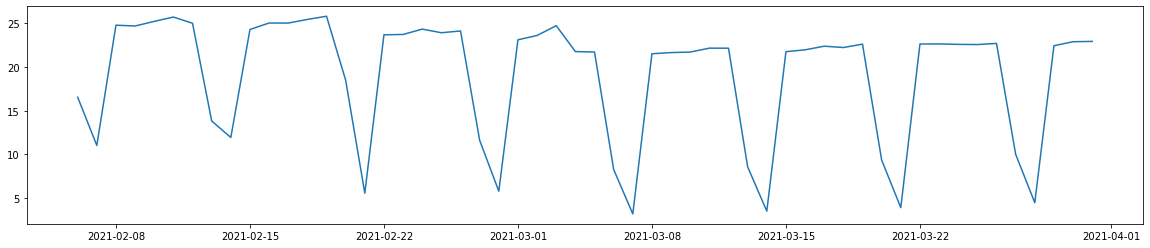

SP 467 tra SP 486 e confine provinciale


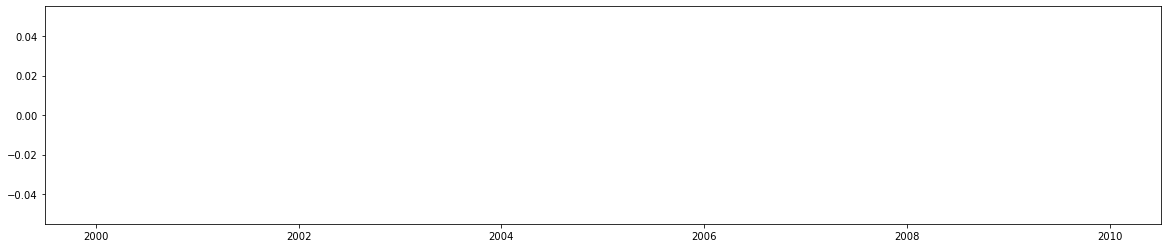

SP 467R tra Fogliano e località Pratissolo (c/o Scandiano)


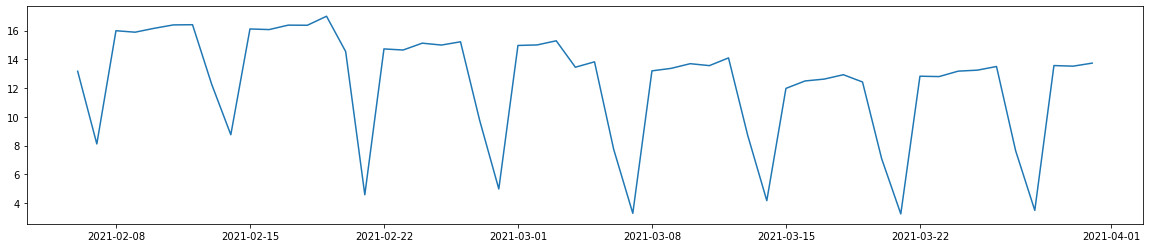

SP 486 tra Modena e Baggiovara


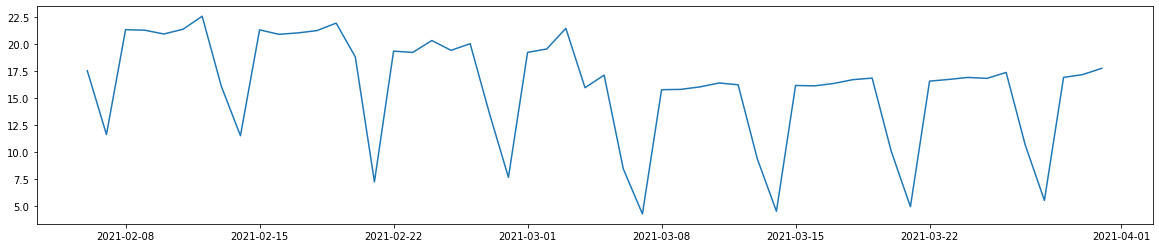

SP 486R fra Sassuolo e Castellarano


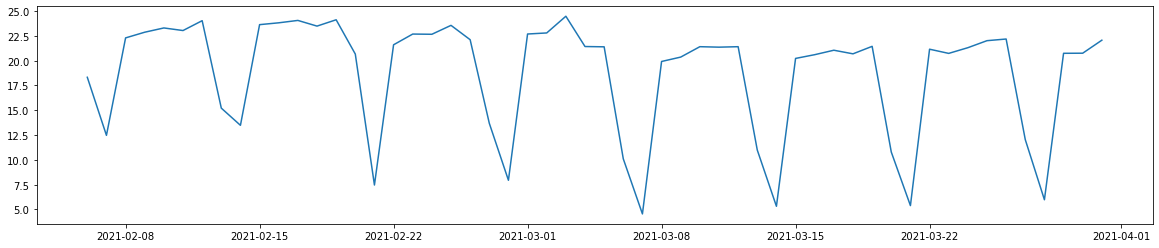

SP 49 da Santarcangelo di Romagna alla località Posta (bivio SP 258R)


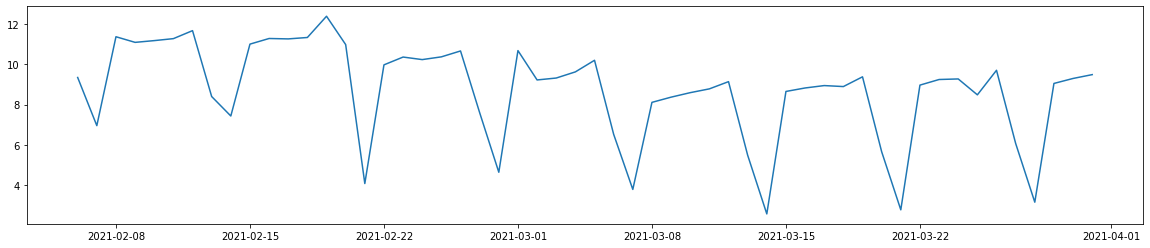

SP 5 dall'intersezione SP 3 a intersezione per Ca' de Fabbri


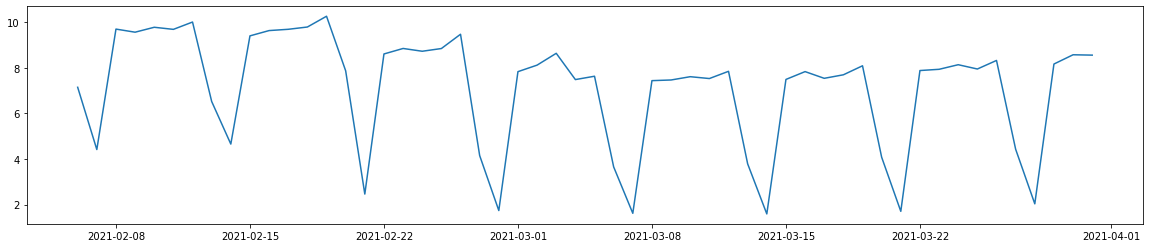

SP 5 fra Reggiolo e intersezione SP 45 per Fabbrico


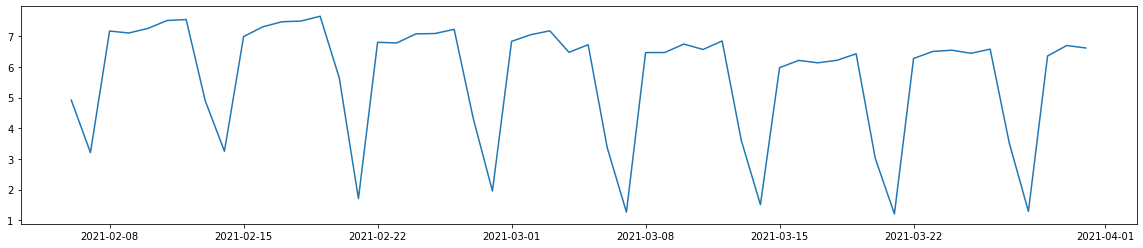

SP 5 fra Russi e San Pancrazio


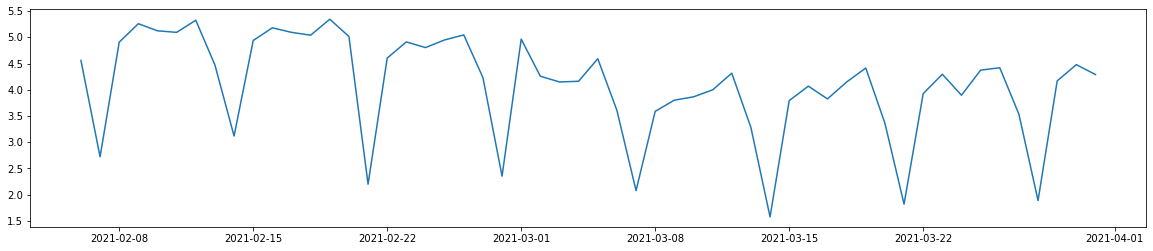

SP 51 fra Sassuolo (bivio SP 467R) e Rubiera


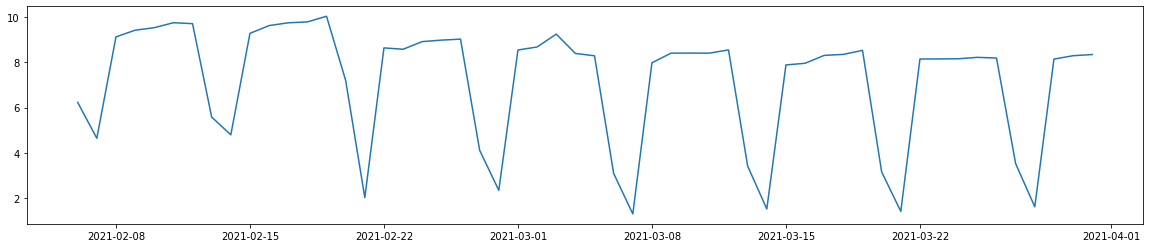

SP 513R a nord di Vetto


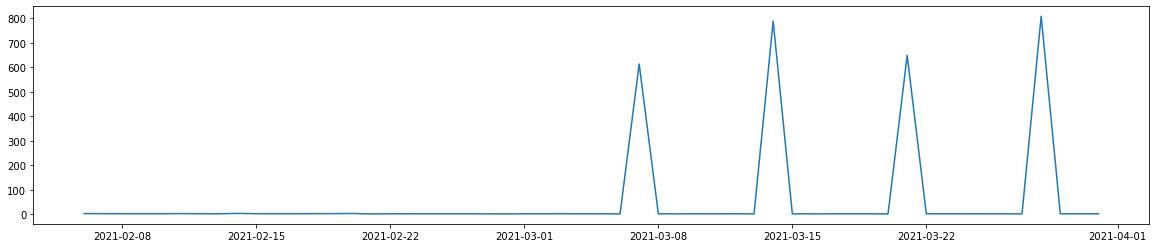

SP 513R fra Traversetolo e confine provinciale


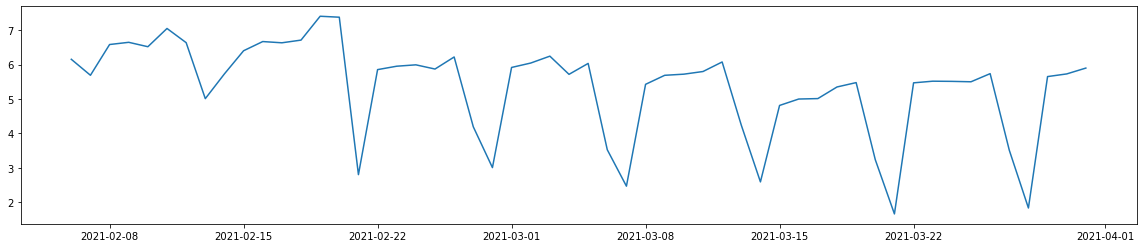

SP 513R tra Parma e Pilastrello


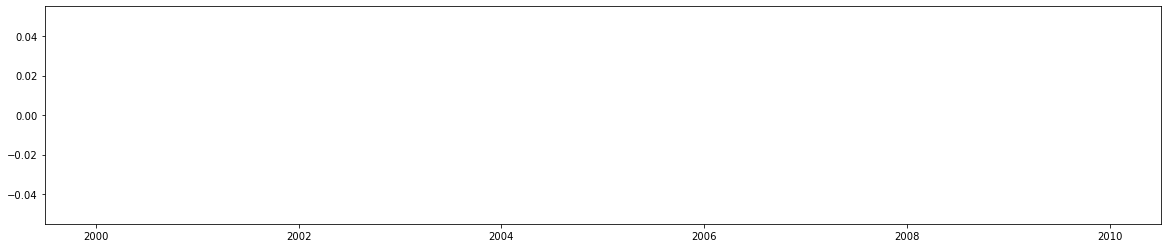

SP 523R da Roccamurata (bivio SP 308R) a Borgo Val di Taro


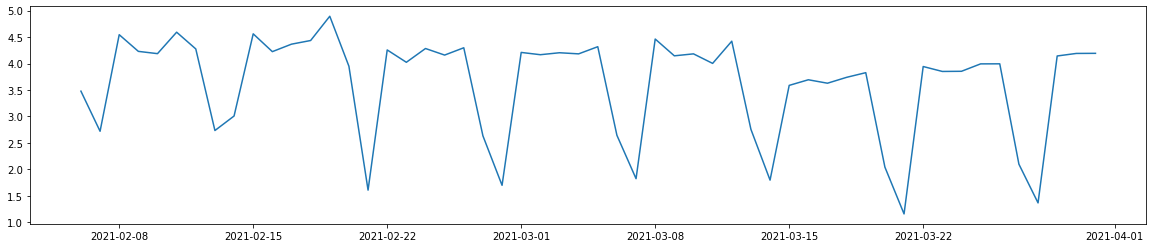

SP 53 fra Codigoro e Marozzo


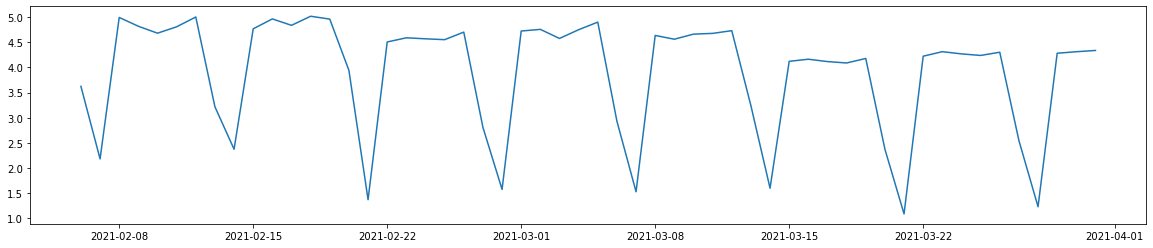

SP 54 fra Pomposa e Codigoro


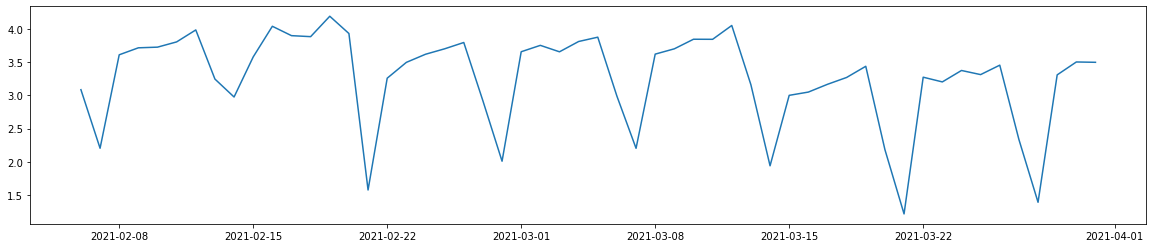

SP 56 tra Forlì e bivio SS67 (Castrocaro Terme)


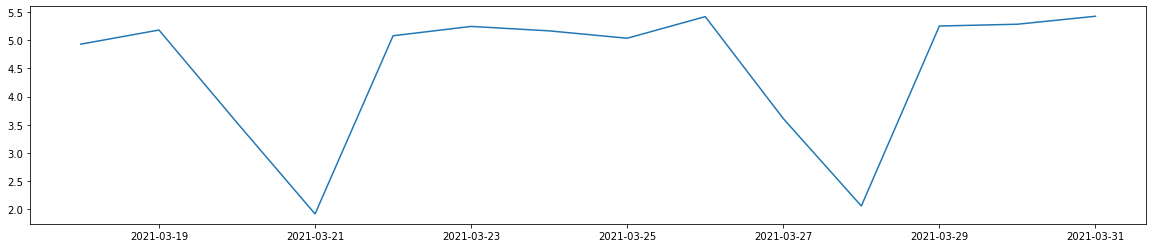

SP 569 da intersezione Pedemontana a Savignano sul Panaro


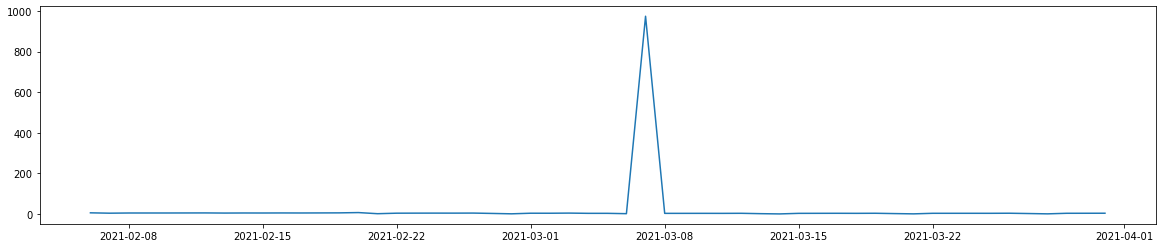

SP 569 tra Innesto tangenziale Bologna e uscita Zola Predosa (Gesso/Rivabella)


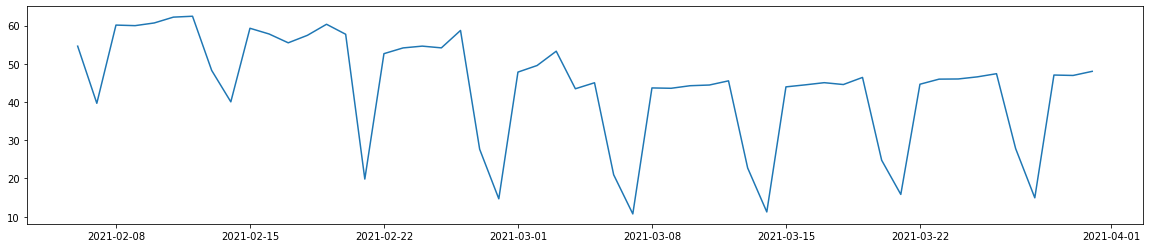

SP 569 tra Pragatto e innesto variante Ponte Ronca


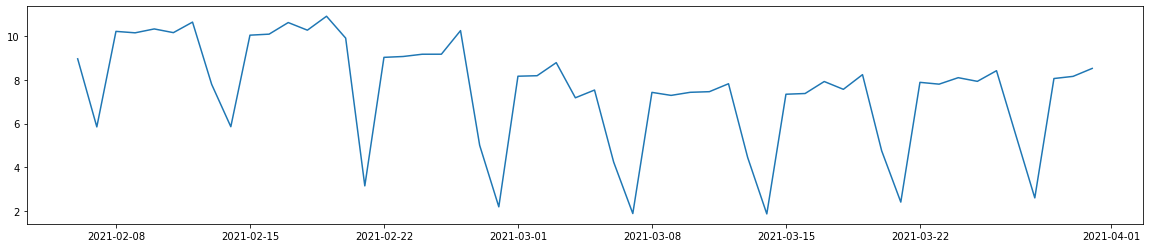

SP 58 tra San Giovanni in Marignano e il confine regionale (Marche)


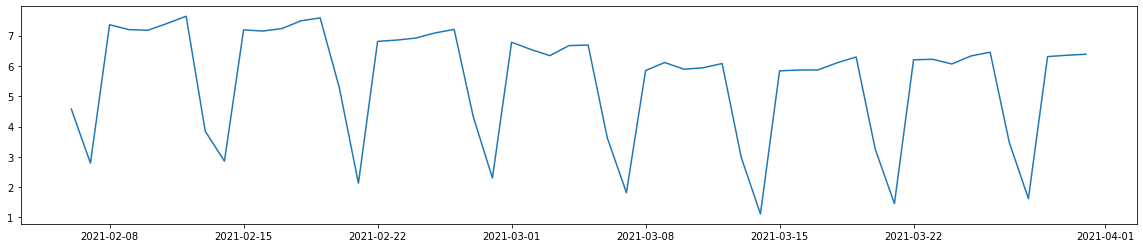

SP 587R dal bivio SP 10R alla A 21Dir


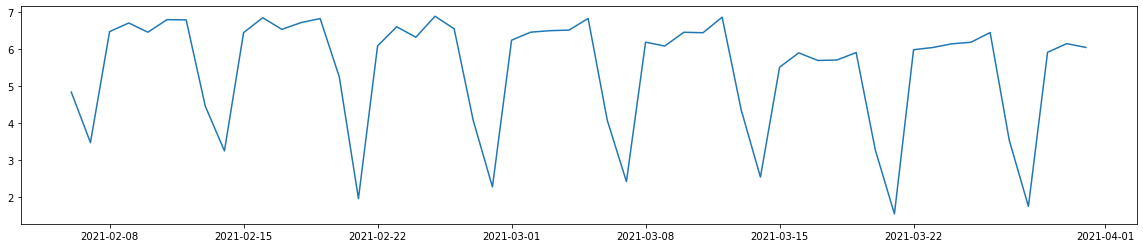

SP 588R da Castione Marchesi (A 1) a Busseto


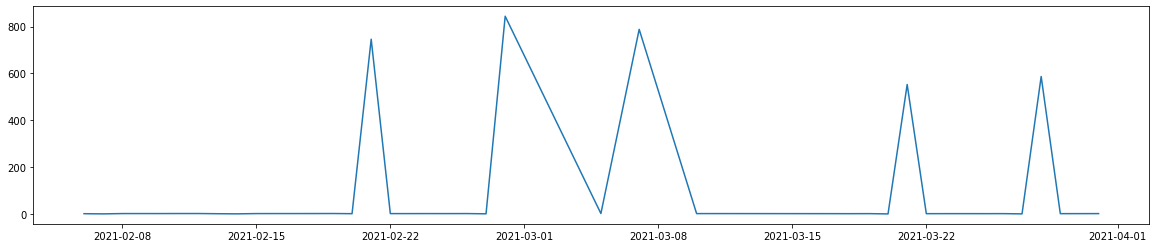

SP 588R dal casello A 21 di Castelvetro Piacentino a Villanova d'Arda


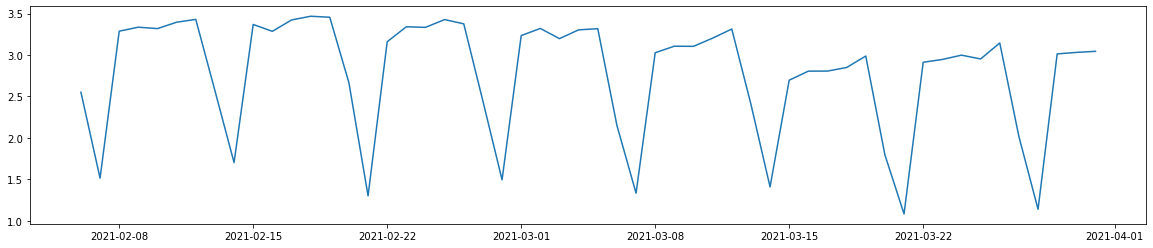

SP 588R fra Villanova d’Arda e confine provinciale


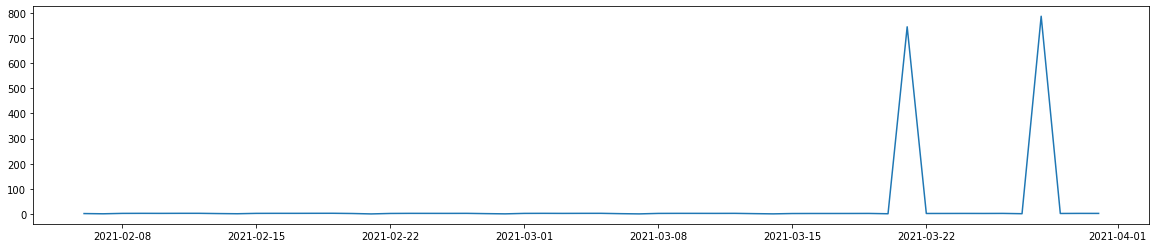

SP 6 fra Cento e Pilastrello


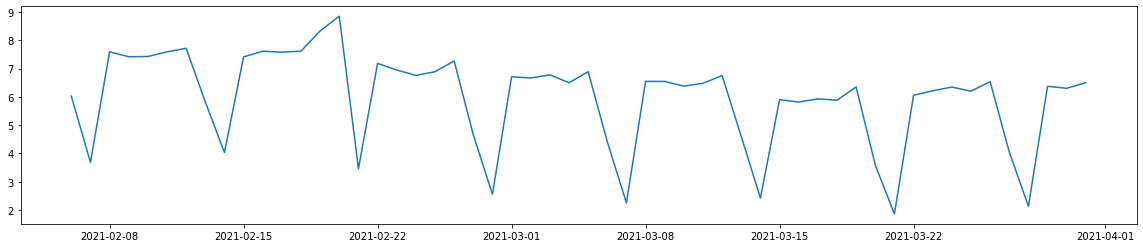

SP 6 tra Budrio e San Martino in Argine


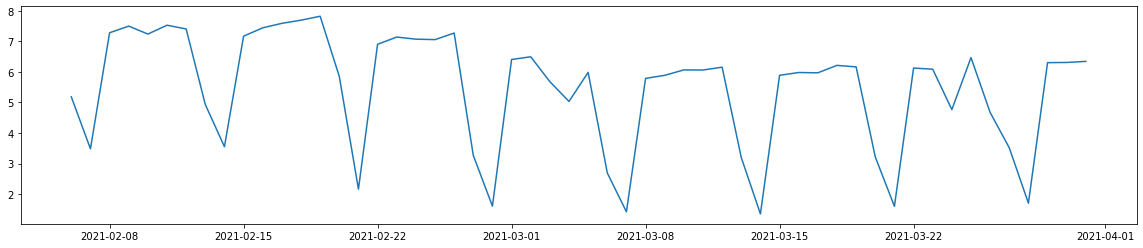

SP 6 tra Budrio e bivio SP 253


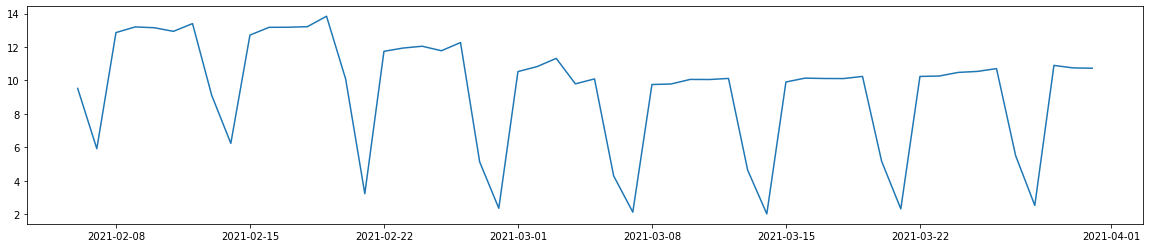

SP 6 tra Piacenza (Tangenziale Sud) e bivio SP 42/ponte fiume Nure in località San Giorgio Piacentino


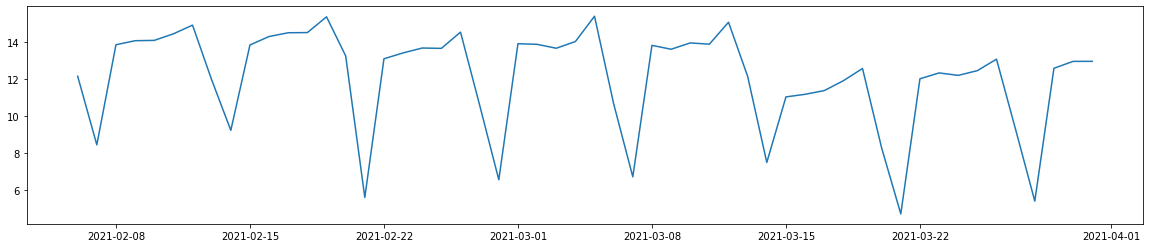

SP 60 tra intersezione SP 68 e SP62


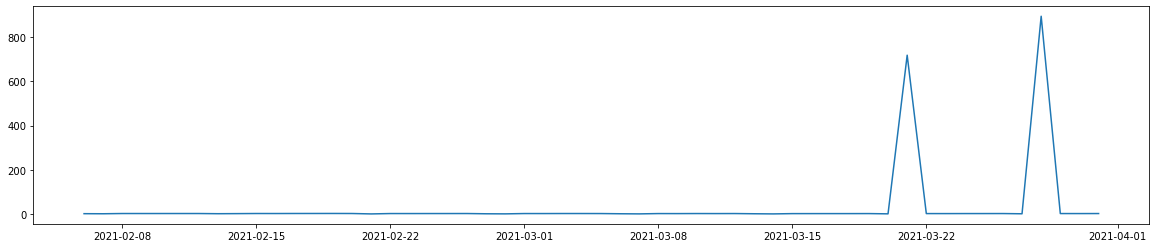

SP 610 tra Imola e Casalfiumanese in località Ca' Miseria


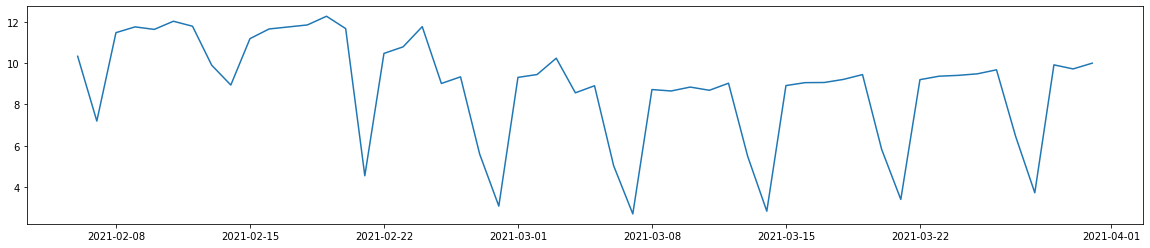

SP 610 tra casello A 1 (Imola) e bivio SP 51 per Castel Guelfo di Bologna


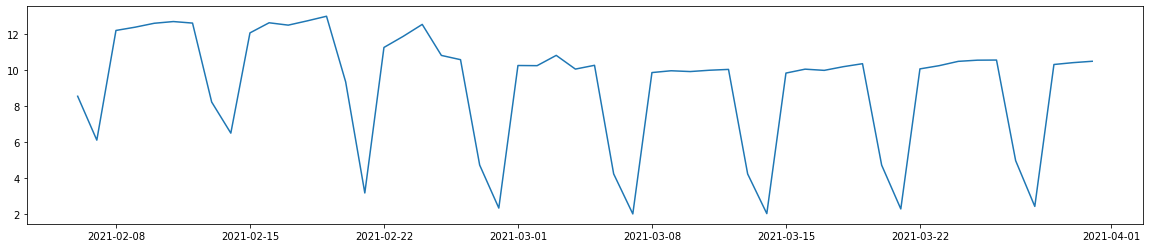

SP 610R fra SP 253R e Conselice


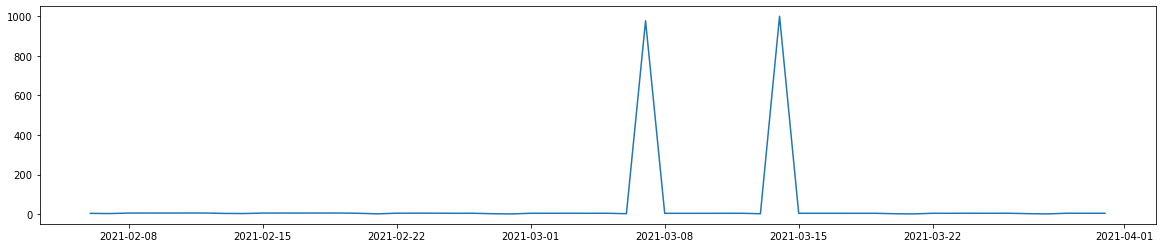

SP 623 tra Modena Sud/casello A 1 e Spilamberto


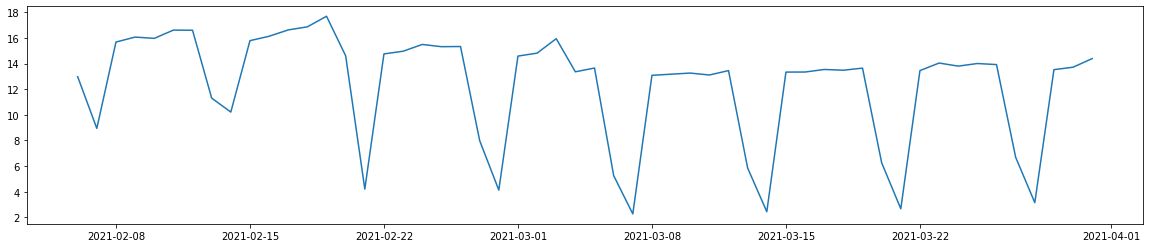

SP 62R tra Brescello (bivio SP 41) e Sorbolo (bivio SP 20)


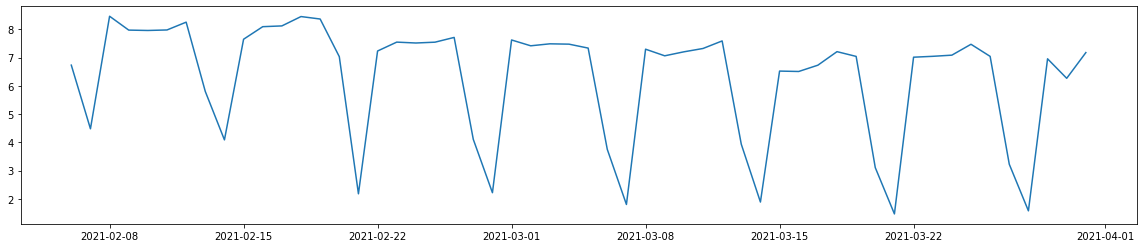

SP 62R tra Parma (viadotto A 1) e Sorbolo


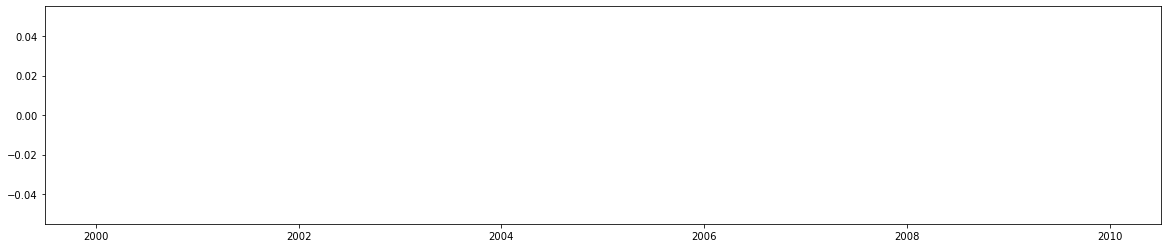

SP 62RVar Cispadana da Boretto (bivio Variante SP 358R) a Gualtieri (bivio SP 63R)


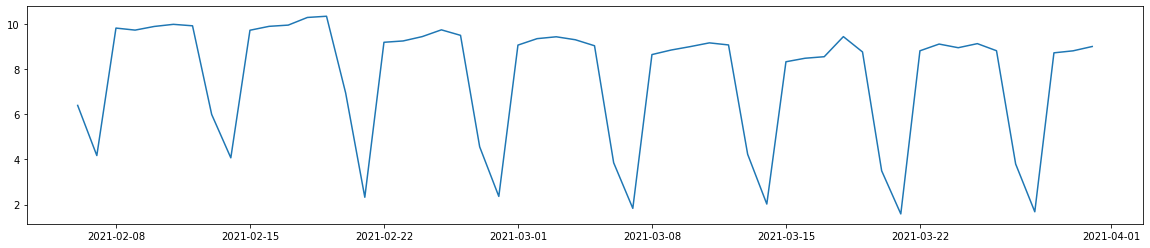

SP 62RVar sulla variante di Luzzara (c/o Codisotto)


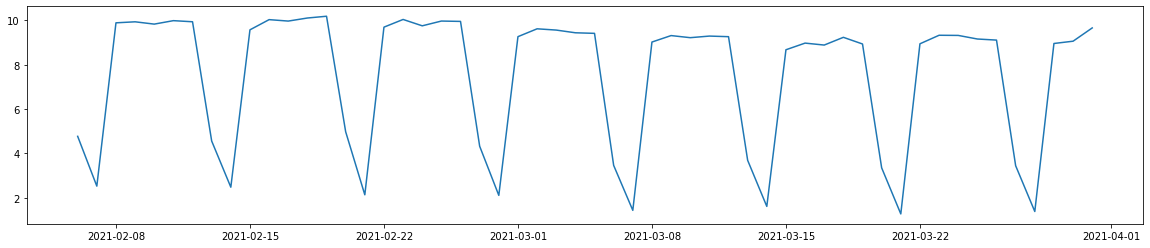

SP 62RVar tra la località San Giacomo (bivio SP 42) ed SP 2 (c/o Tagliata)


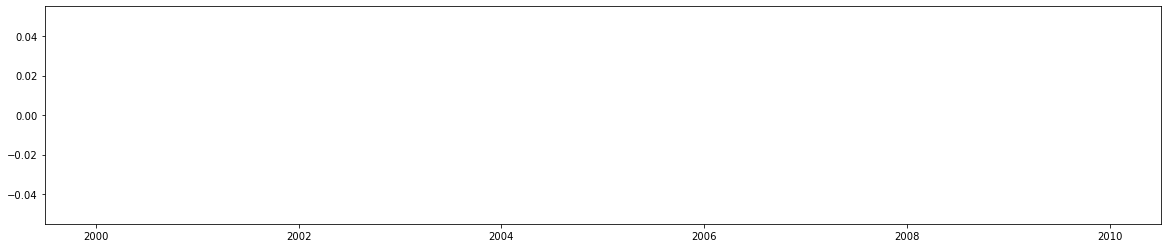

SP 63R tra Sesso e Cadelbosco di Sopra (bivio SP 358R)


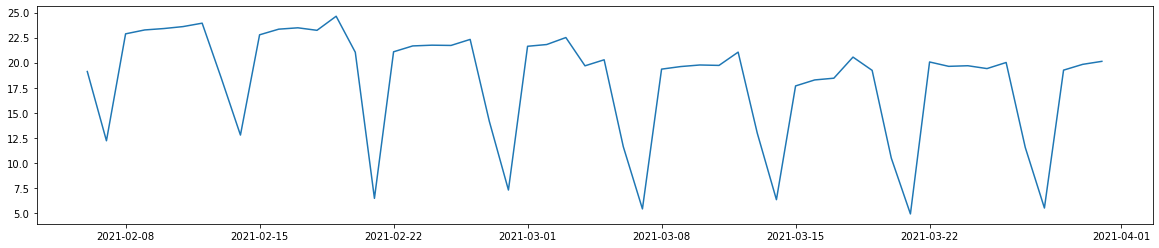

SP 63R tra la località Santa Vittoria (c/o bivio SP 81) e la Cispadana


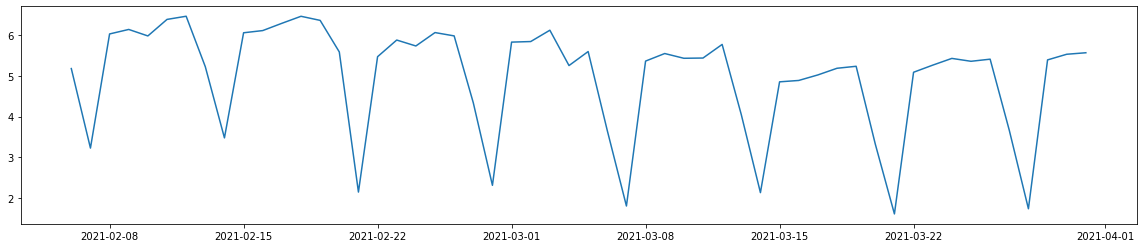

SP 654R fra Ponte dell'Olio e Bettola


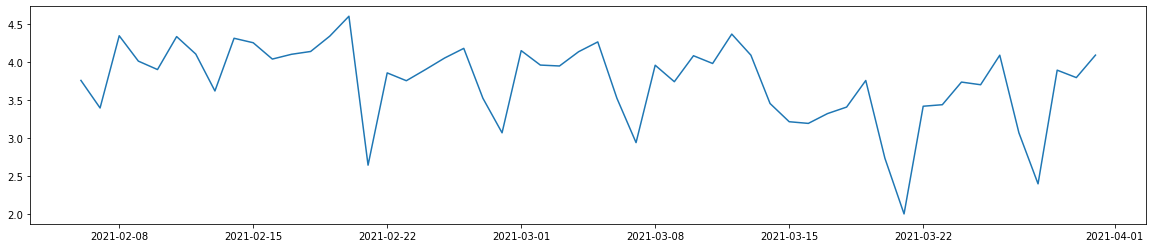

SP 654R tra Piacenza (Tangenziale Sud) e Turro


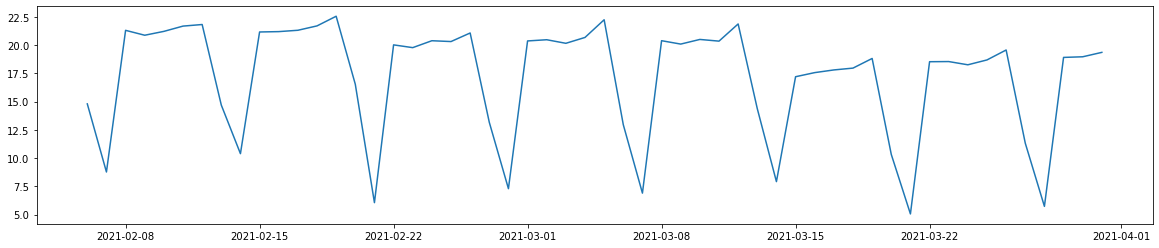

SP 66 fra Cento e Sant'Agostino


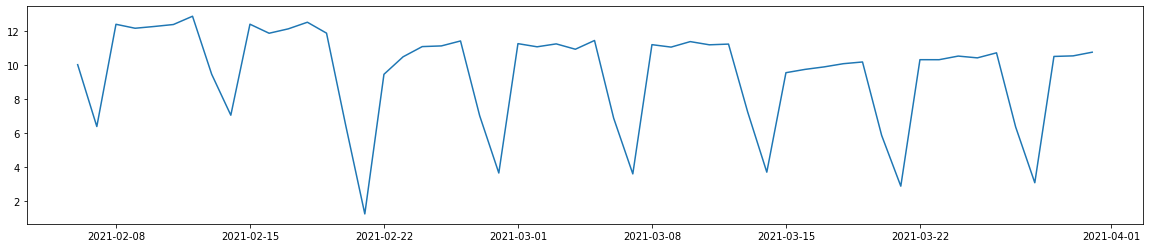

SP 665R dalla località Pilastro a Langhirano


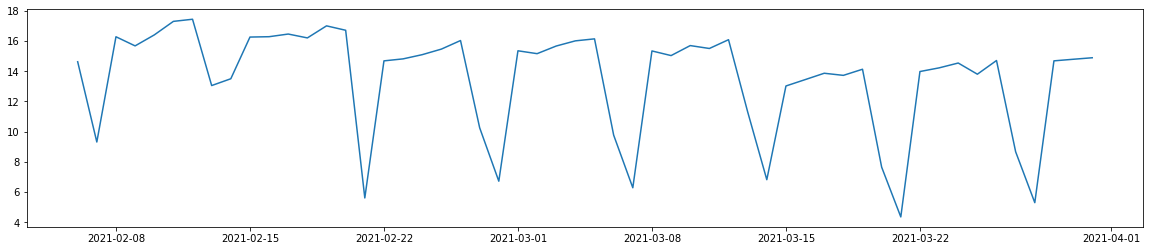

SP 665R tra Parma e Corcagnano


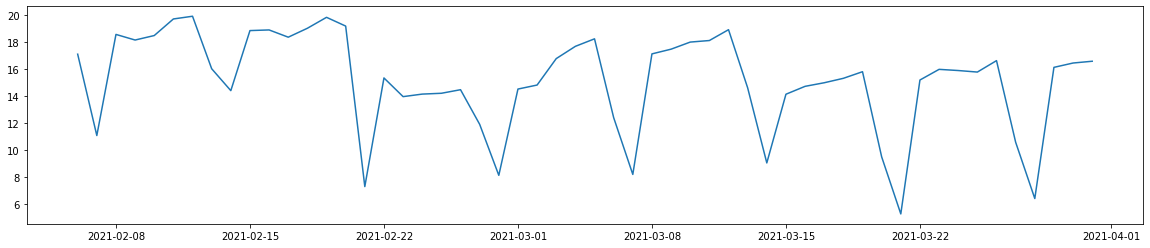

SP 67 fra Calerno e Montecchio Emilia


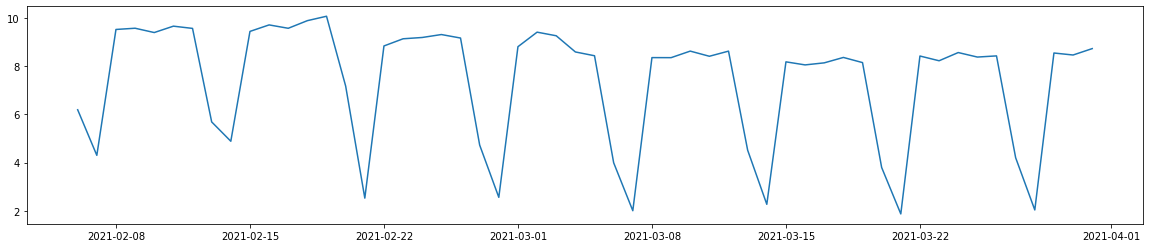

SP 68 ad Ariano Polesine al Confine regionale (Veneto)


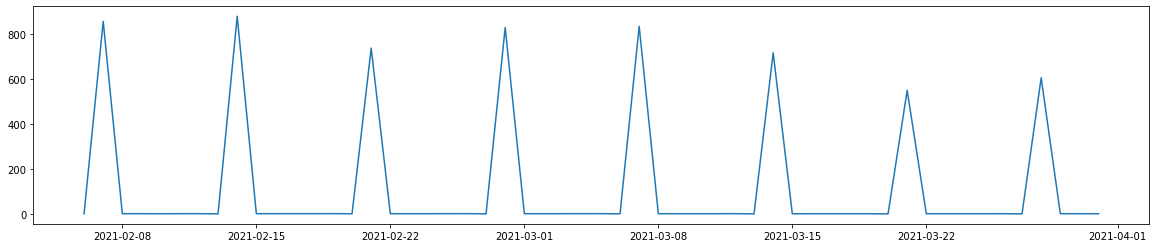

SP 68 tra Portomaggiore e la Superstrada Ferrara-Mare


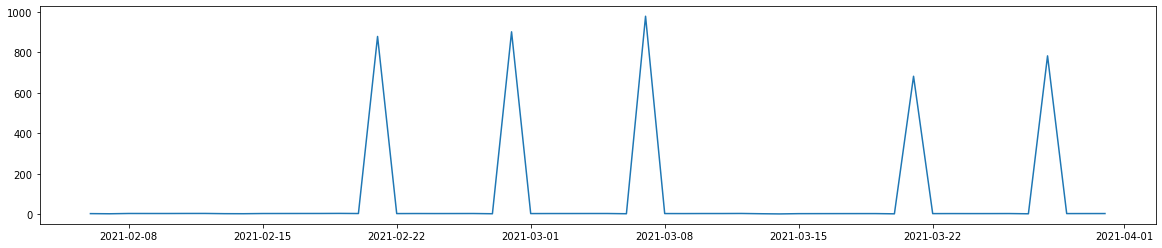

SP 69 in località Pilastri al Confine regionale


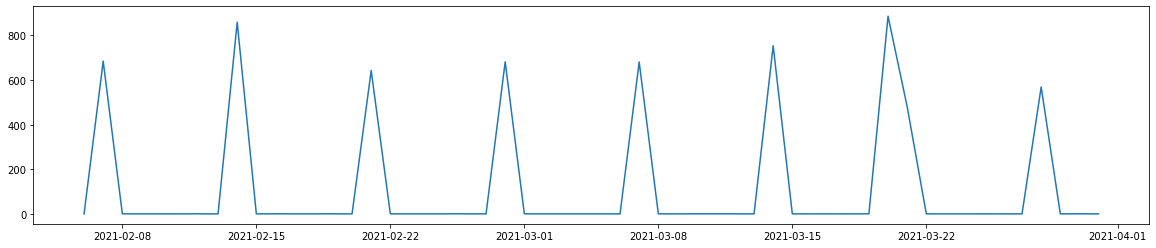

SP 6Bis fra Carpaneto e Castell'Arquato


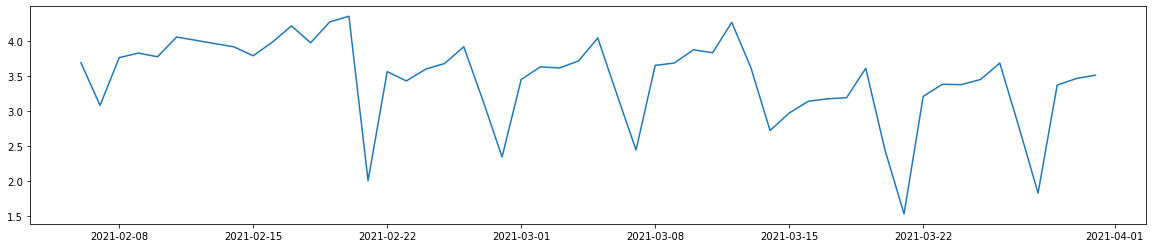

SP 7 dalla intersezione tangenziale sud/ovest di Piacenza a San Nicolò


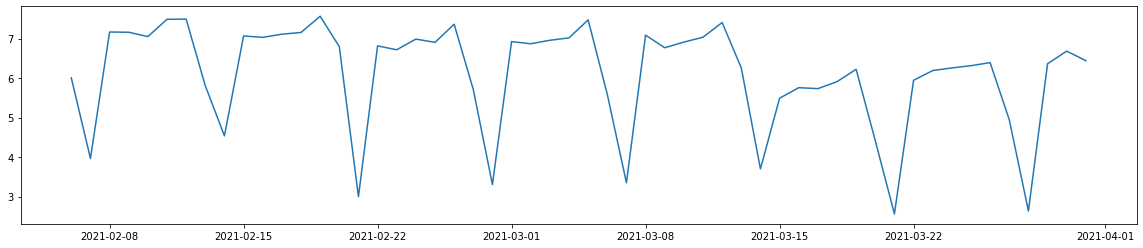

SP 7 dalla località Ca de' Mandorli al bivio per Castel de Britti


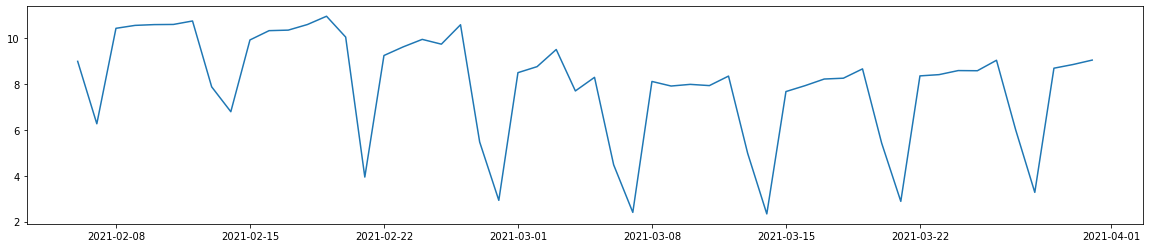

SP 7 fra Viano e Scandiano (bivio SP 37)


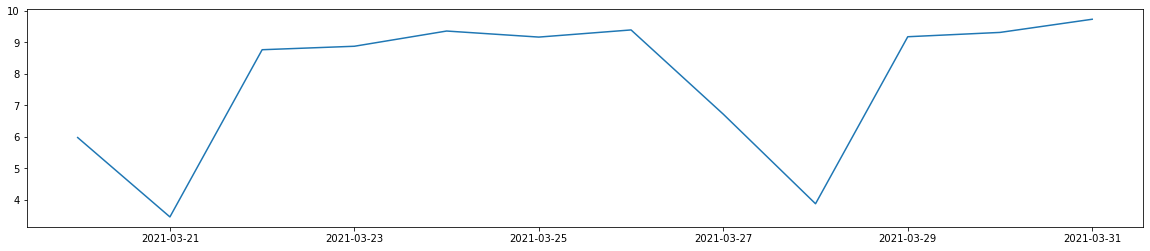

SP 7 in località Calabrina al Confine Provinciale


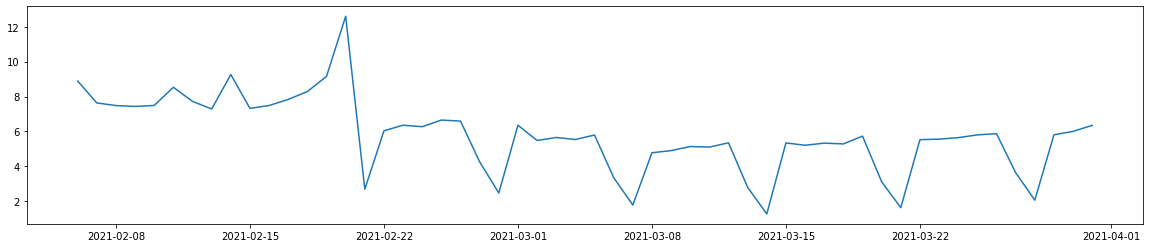

SP 72 tra Parma e Mezzani


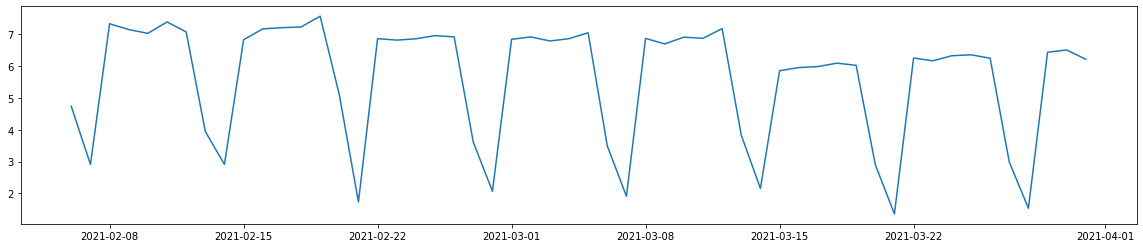

SP 72 tra San Martino in Strada e bivio ex SS 310R (Meldola)


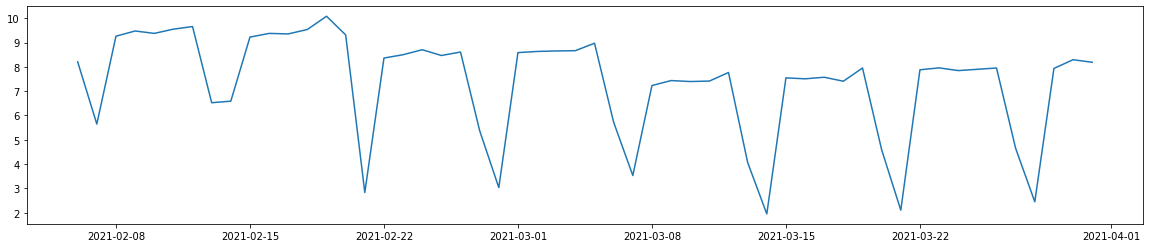

SP 78_1 tra Bazzano e Intersezione SP 27 a Monteveglio


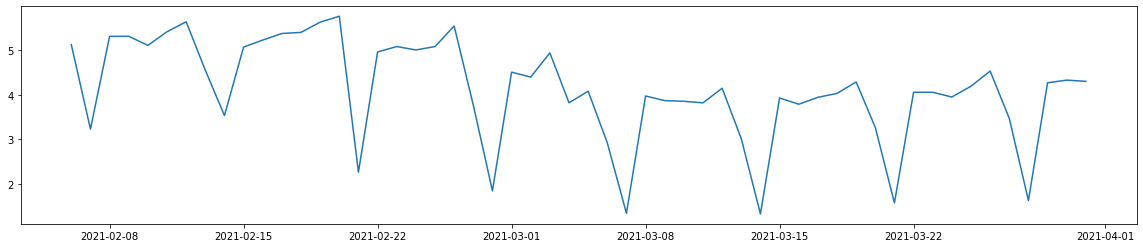

SP 7IBisR dal bivio SSPP 32/33ter alla SS 16


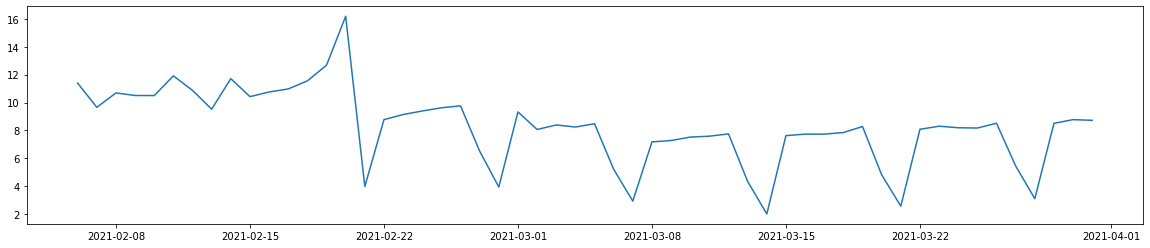

SP 8 da Bagnacavallo al bivio SS 16


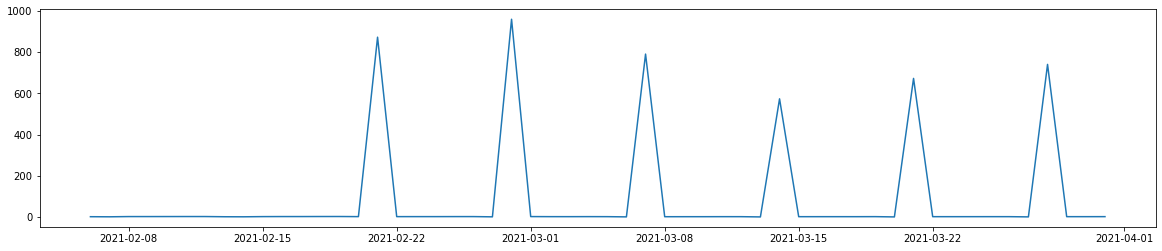

SP 8 dal Casello A 1 (Faenza) a Cotignola


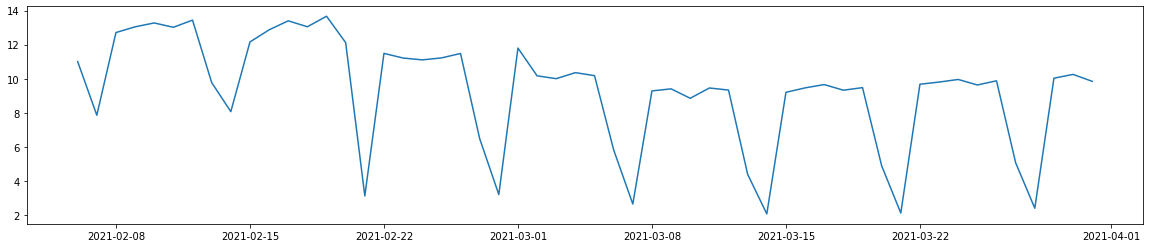

SP 8 tra Cesena e A 14


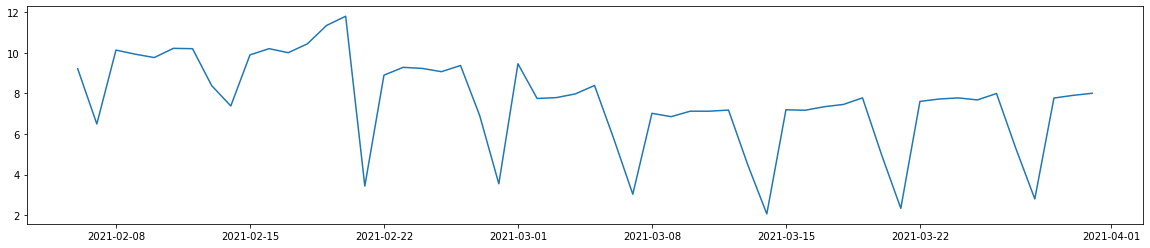

SP 85 tra Rubiera e bivio SP 13MO (c/o Campogalliano)


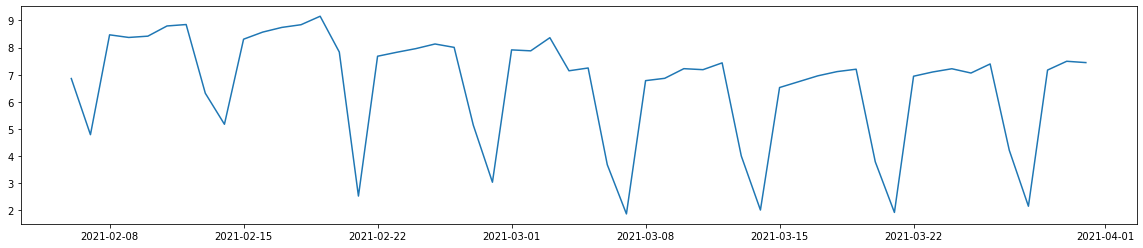

SP 9 fra Colorno e Torrile centro abitato di Bezze


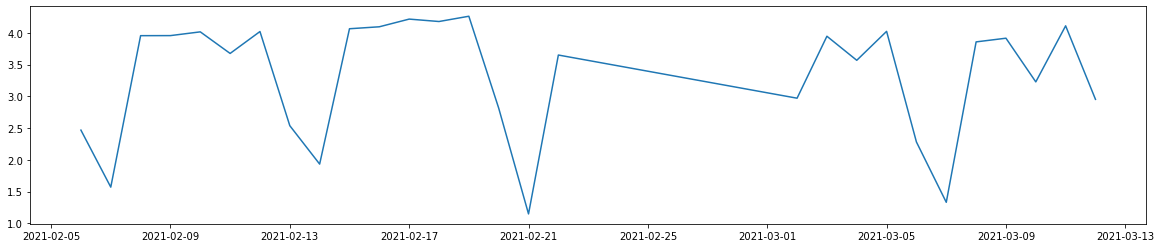

SS 12 a Medolla


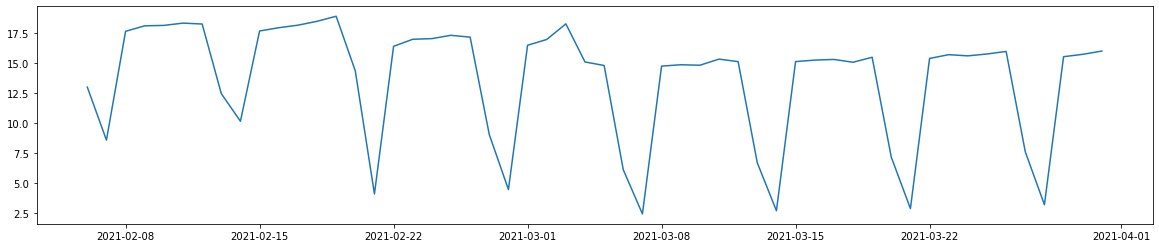

SS 12 tra Fiumalbo e Abetone


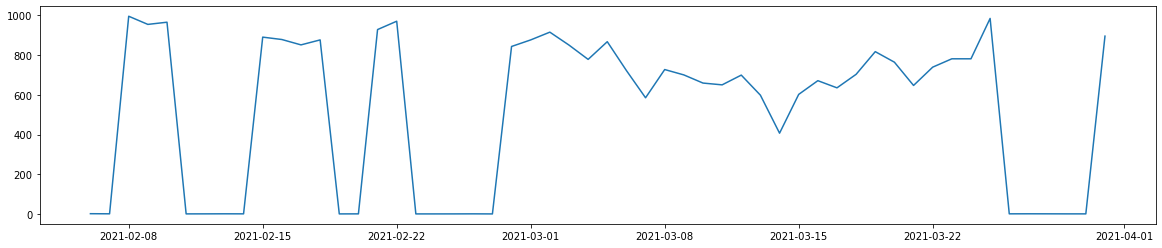

SS 12 tra Maranello e Pavullo nel Frignano


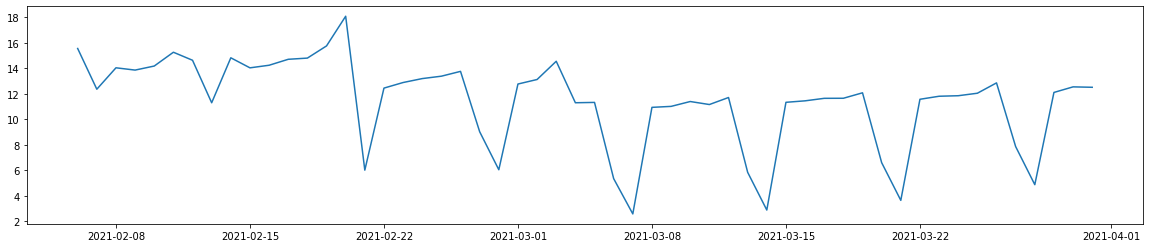

SS 12 tra Modena e Bastiglia


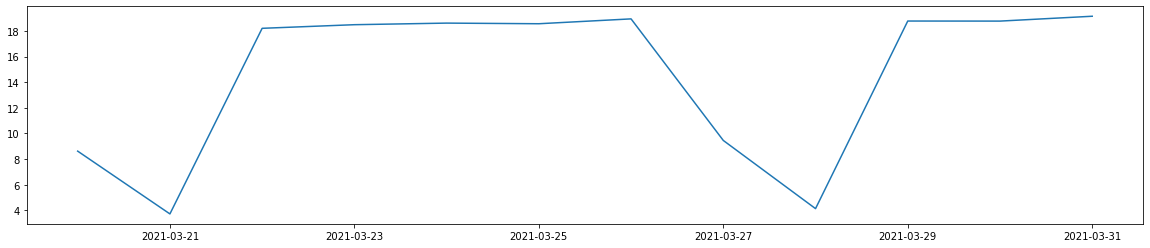

SS 12 tra Montale e Modena


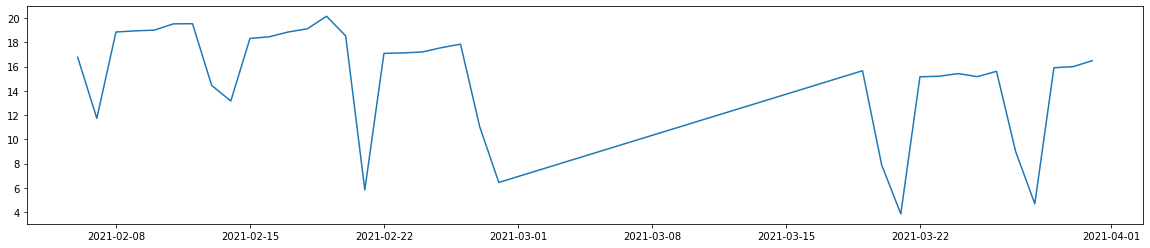

SS 12 tra Pavullo e intersezione SP 31


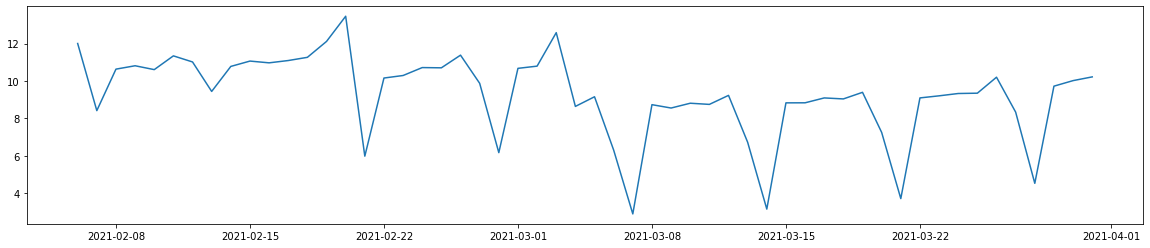

SS 16 al Confine regionale (Marche)


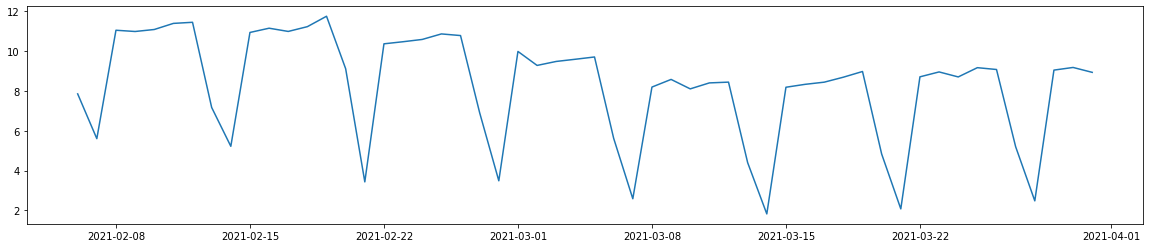

SS 16 dal bivio SP 610R ad Argenta


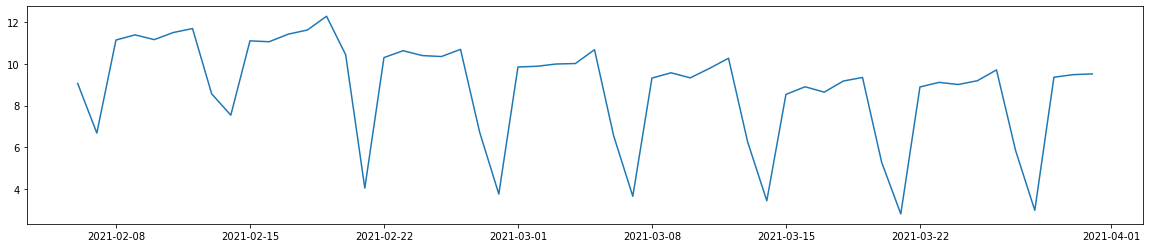

SS 16 tra Cervia e Cesenatico


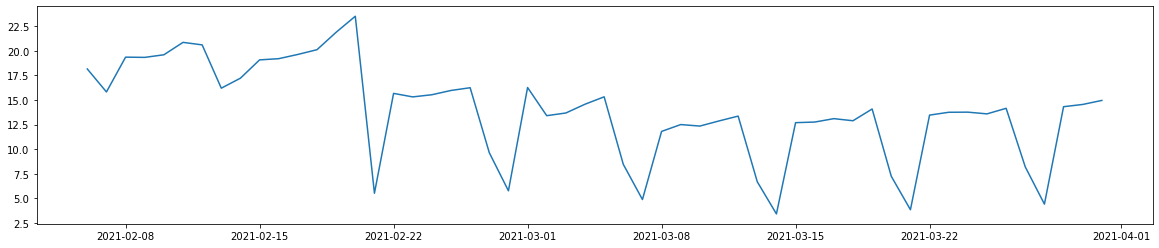

SS 16 tra Riccione e Rimini


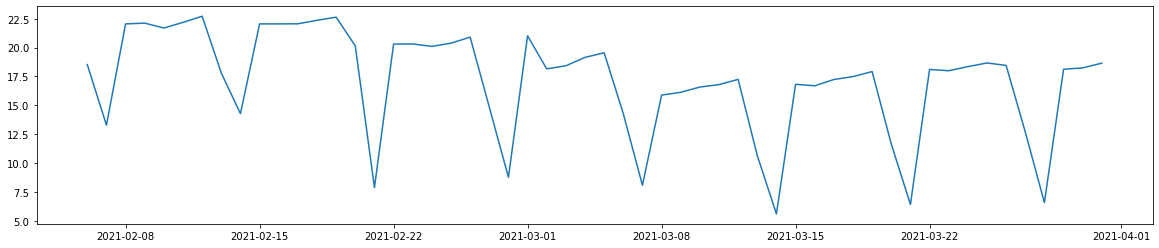

SS 16 tra Rimini e Igea Marina-Viserba


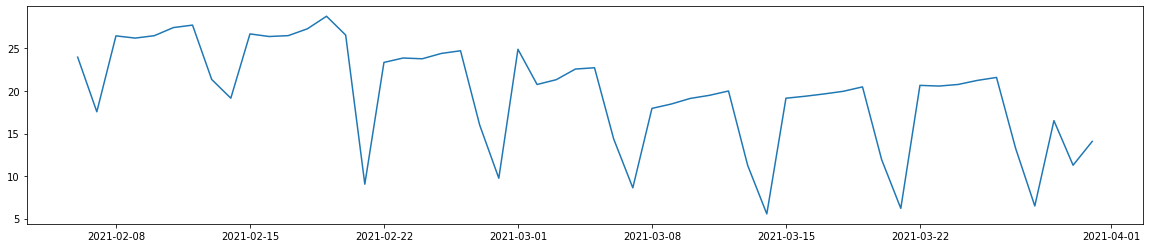

SS 16 tra intersezione SP 101 (località Fosso Ghiaia) e la variante di Savio


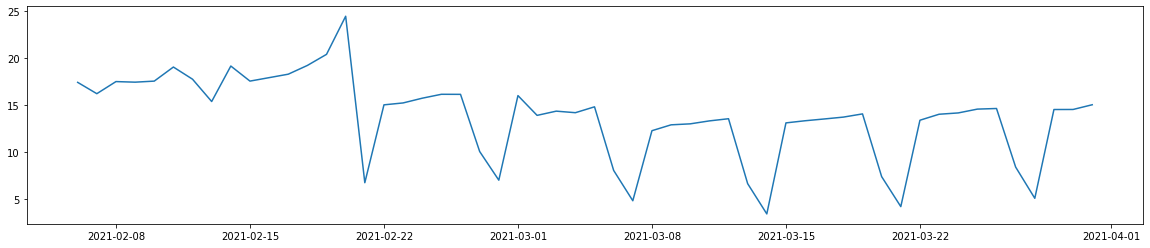

SS 16 tra la tangenziale di Ravenna e la località Camerlona


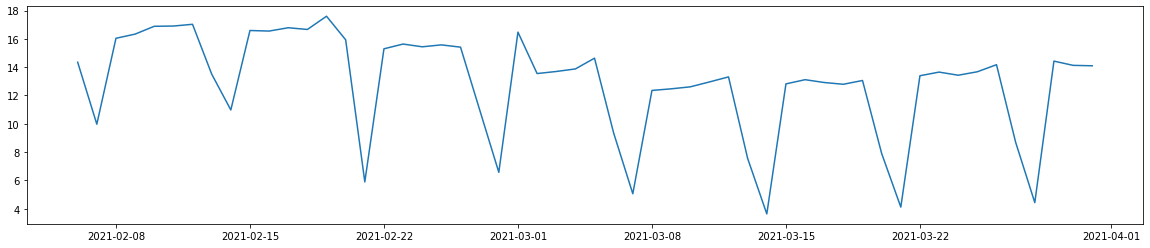

SS 309 a San Giuseppe di Comacchio


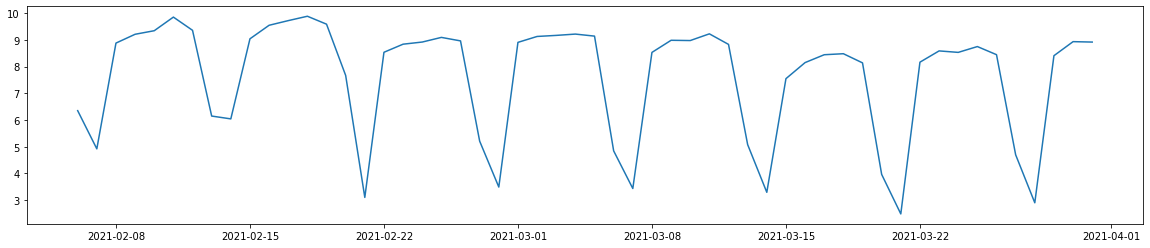

SS 45 tra Ottone e Gorreto


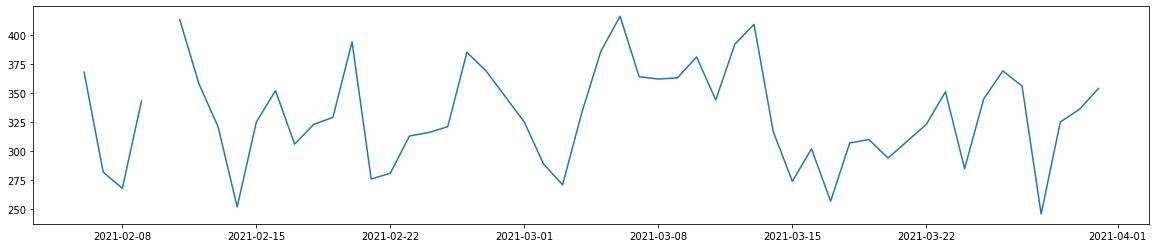

SS 45 tra Piacenza e Settima


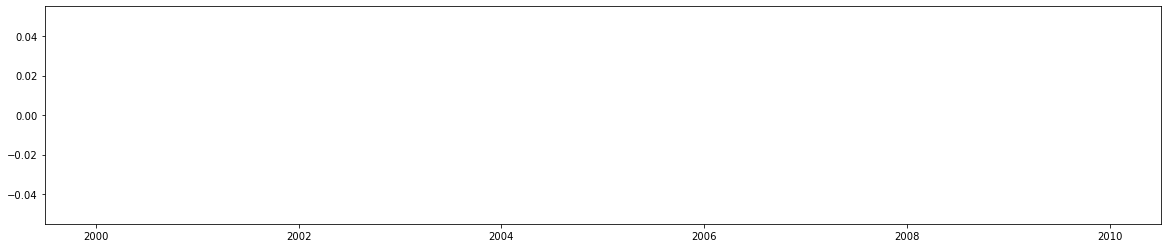

SS 45 tra Rivergaro e Perino


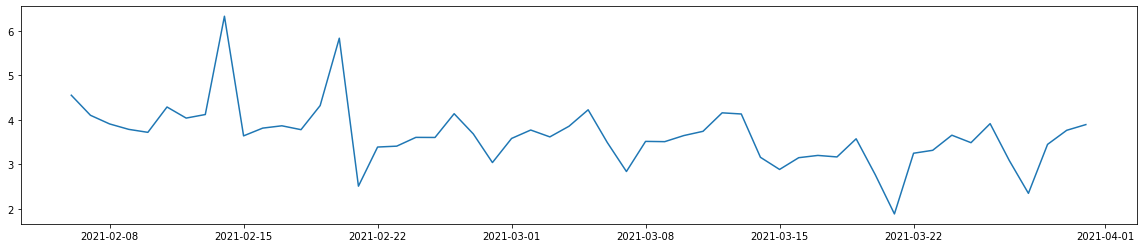

SS 62 tra Parma e Collecchio


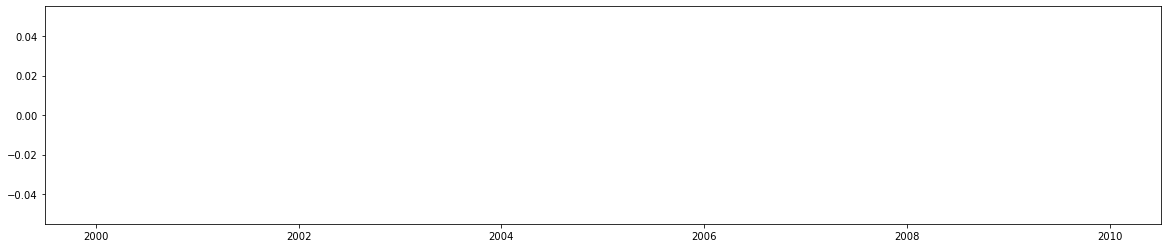

SS 63 località Casina (variante abitato)


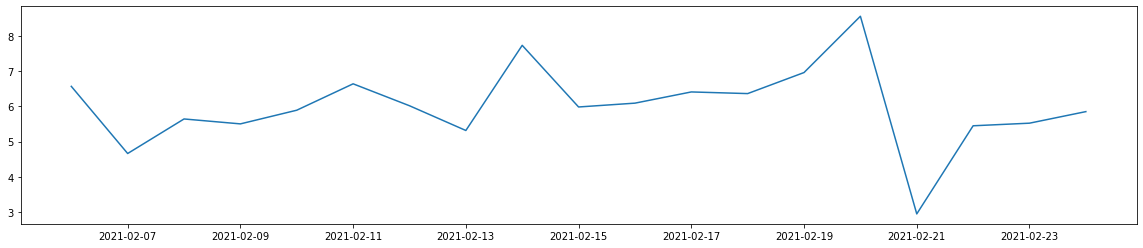

SS 63 tra Casina e Vezzano sul Crostolo


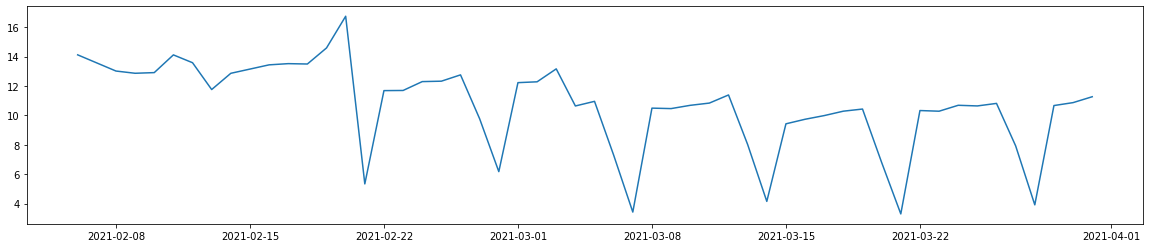

SS 63 tra Collagna e Sassalbo (Passo del Cerreto)


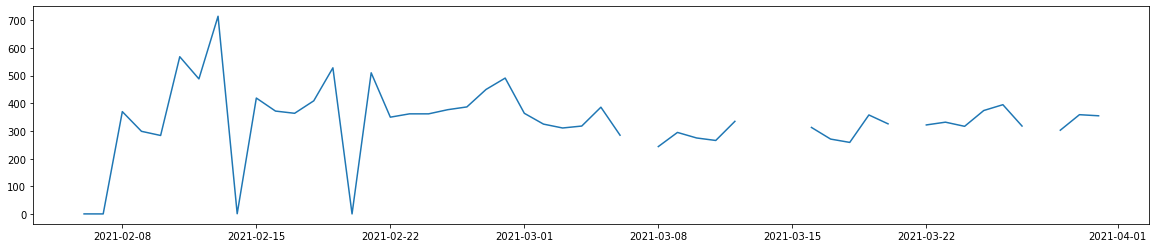

SS 63 tra Reggio Emilia e Puianello


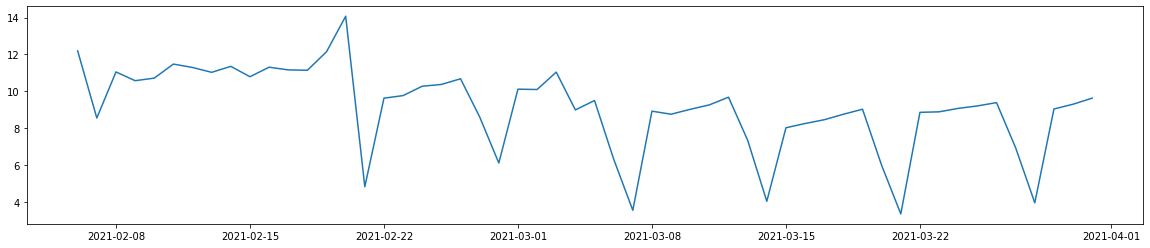

SS 64 ai confini provinciali di Bologna e Ferrara


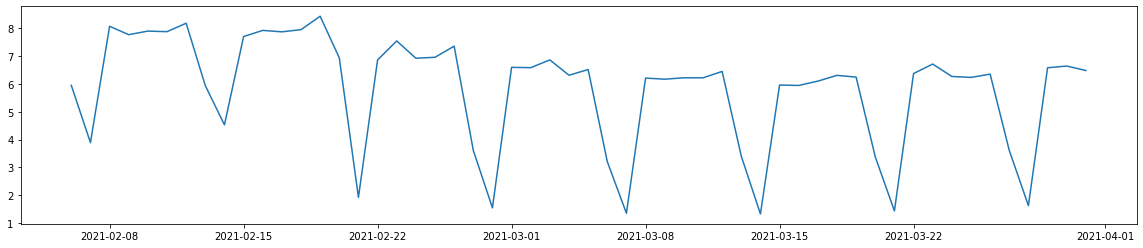

SS 64 tra Bologna e Lovoleto


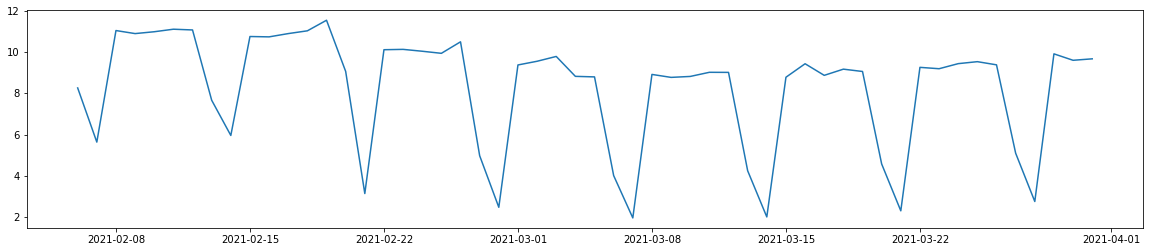

SS 64 tra Porretta Terme e Sambuca Pistoiese


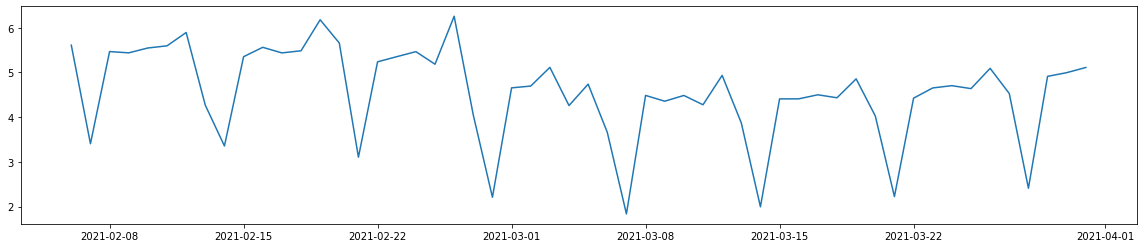

SS 64 tra Sasso Marconi e Marzabotto


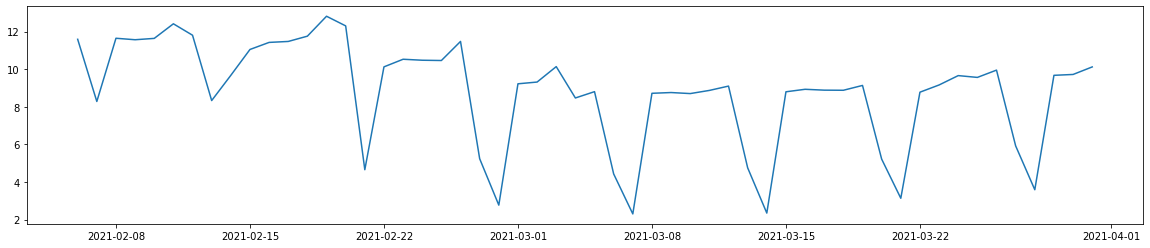

SS 67 tra Dovadola e Rocca San Casciano


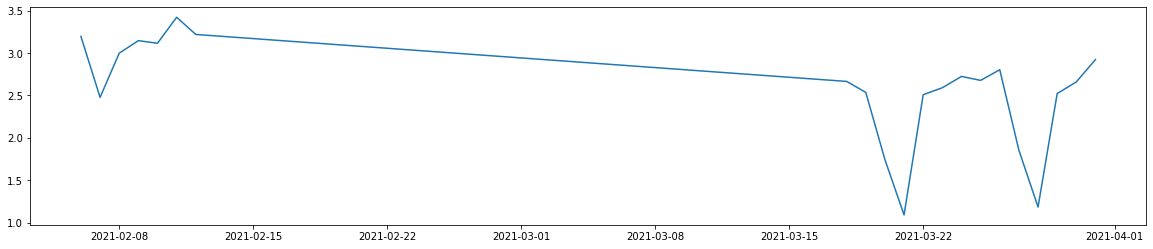

SS 67 tra Rovere e Forlì


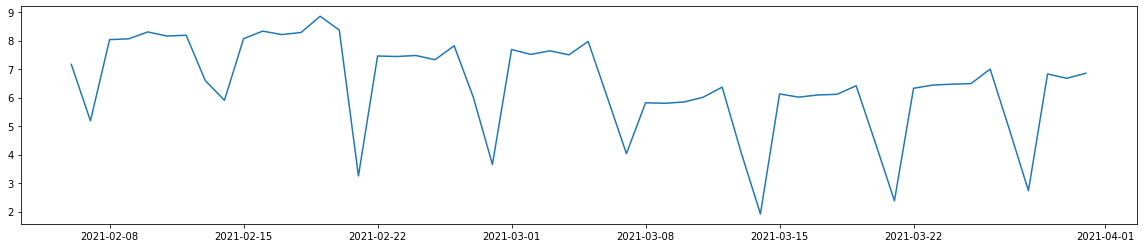

SS 67 tra le località Ghibullo (SP5) e Coccolia (SP40)


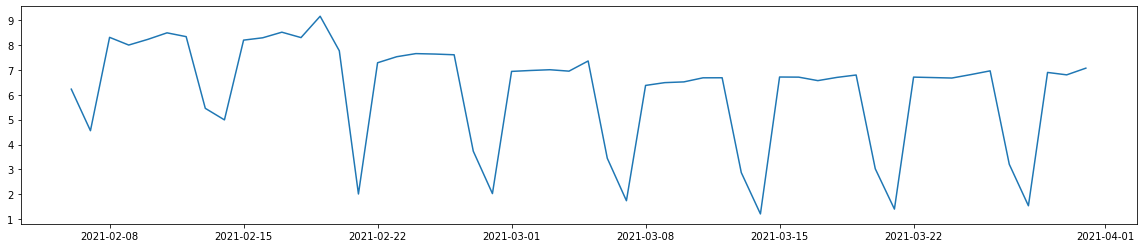

SS 72 tra Rimini e  San Marino


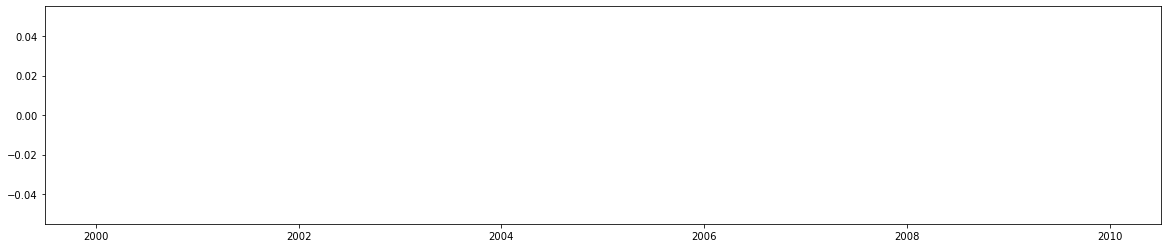

SS 722 Tangenziale nord di Reggio Emilia


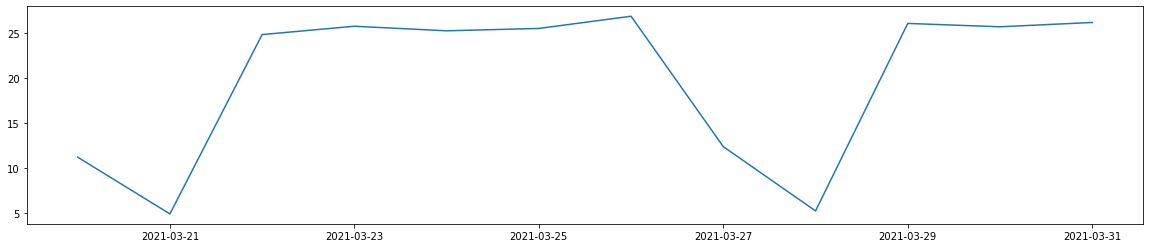

SS 724Dir/tangenziale complanare sud alla A 1 in direzione Bologna - tra intersezione Modena/Sassuolo e intersezione SS12


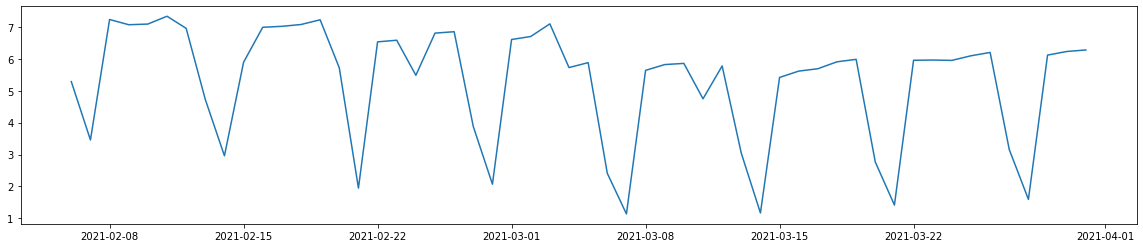

SS 724Dir/tangenziale complanare sud alla A 1 in direzione Reggio Emilia - tra intersezione Modena/Sassuolo e intersezione SS 12


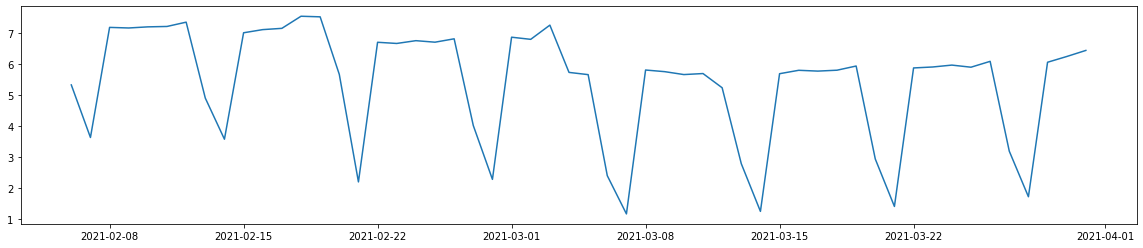

SS 725 (tg sud Piacenza) tra intersezione SS 45 e l'intersezione SP 6


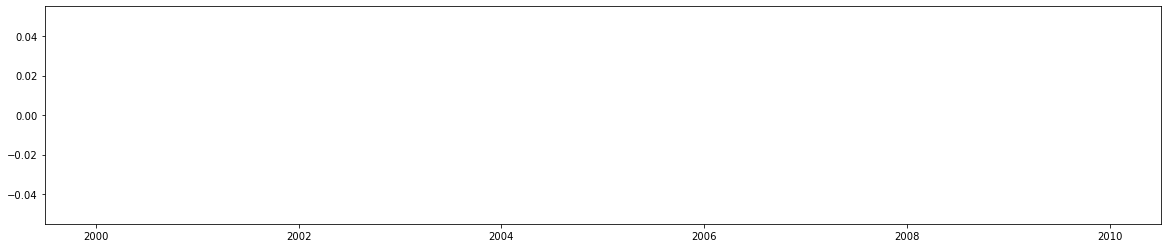

SS 726 (tg Cesena) tra intersezione ex SS 71BIS e l'intersezione SP 304R


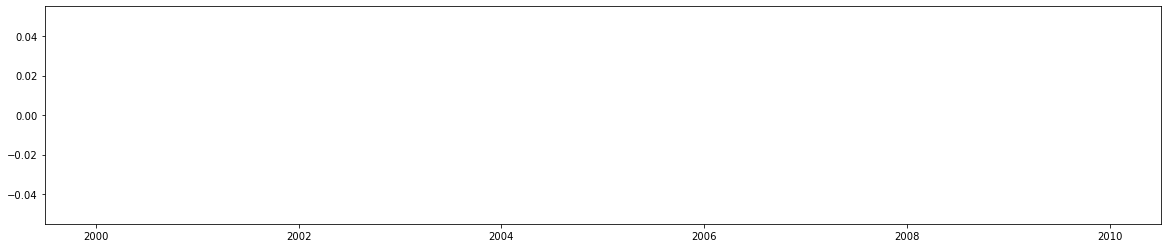

SS 727 (tg Forli') tra intersezione SS 9 e l'intersezione SS 67


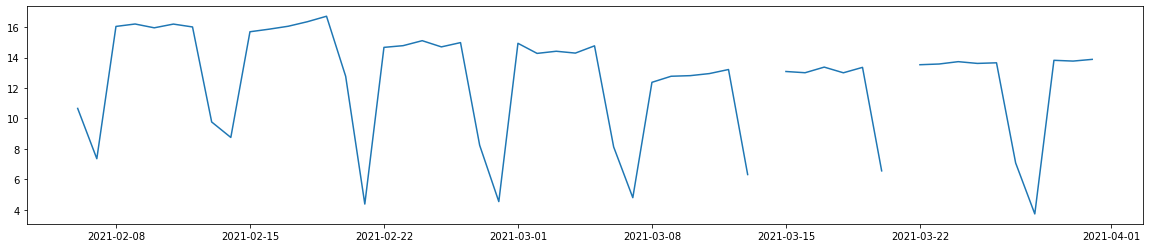

SS 9 da Imola a Castelbolognese (al confine provinciale)


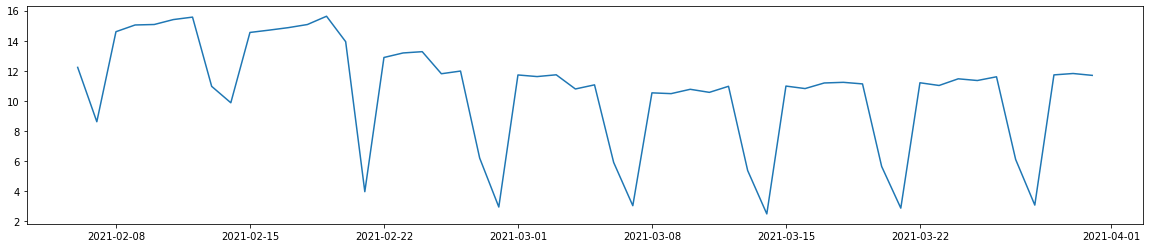

SS 9 località Cavazzona


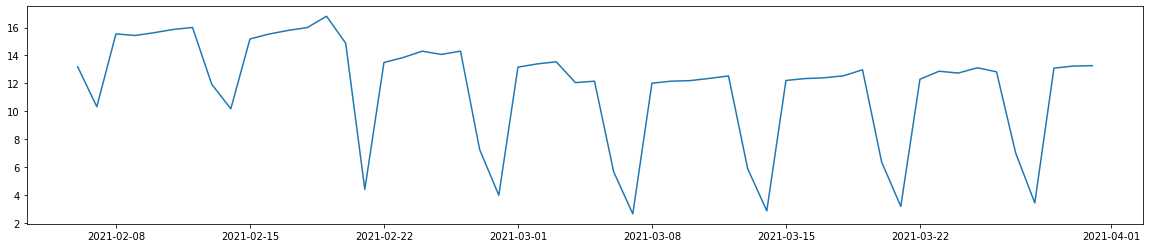

SS 9 tra Castel Bolognese e Faenza


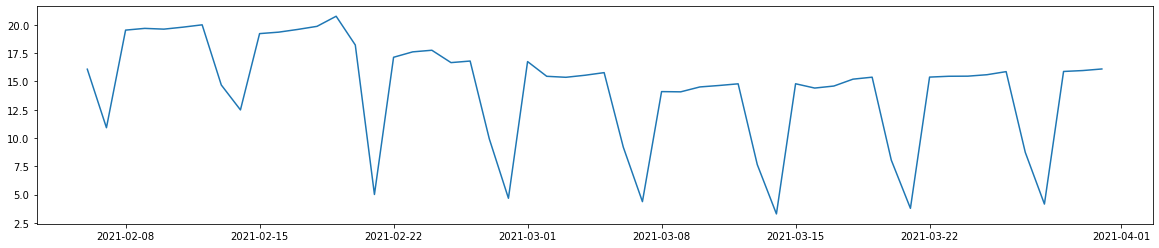

SS 9 tra Castel San Pietro e Imola


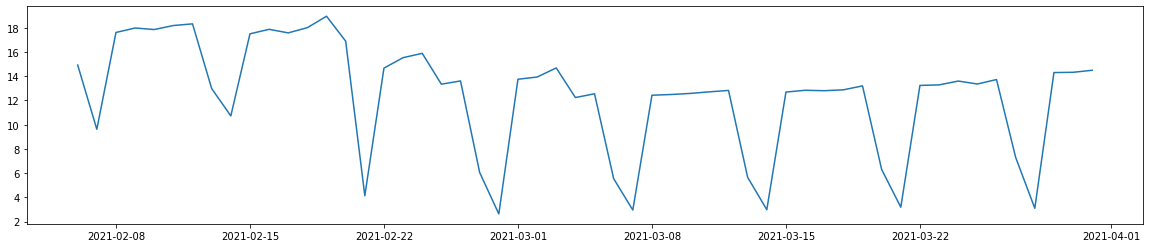

SS 9 tra Fidenza e A 15


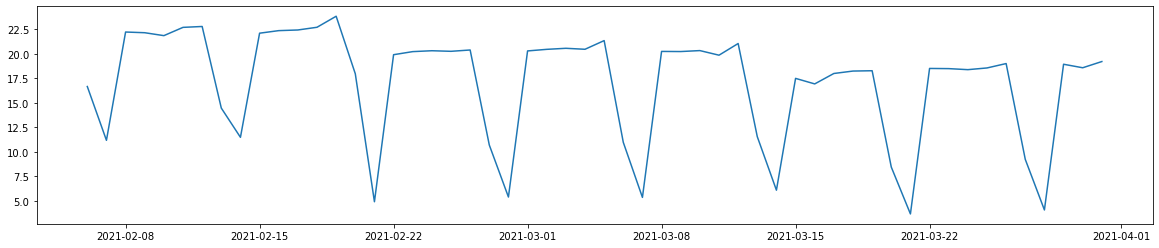

SS 9 tra Fiorenzuola d'Arda e Fidenza al confine provinciale


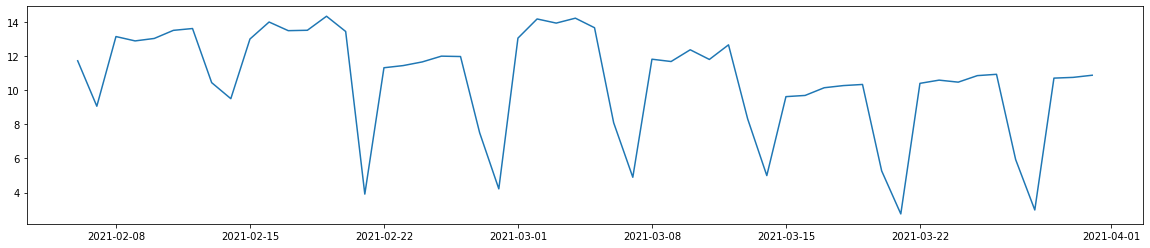

SS 9 tra Forlimpopoli e Cesena


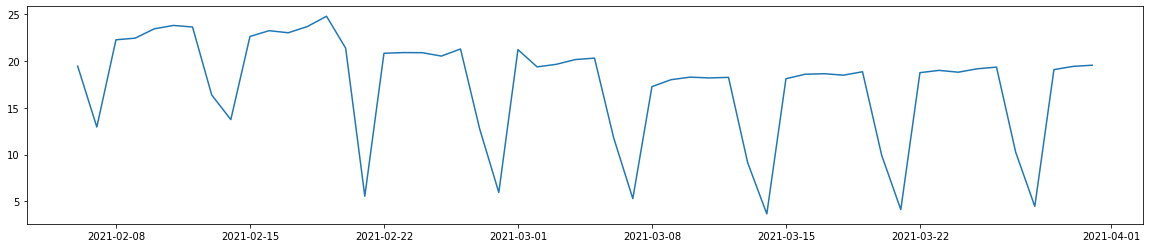

SS 9 tra Masone e Rubiera


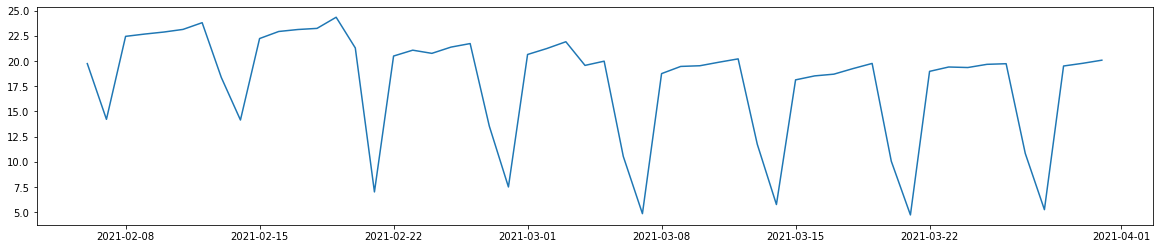

SS 9 tra Modena e Rubiera


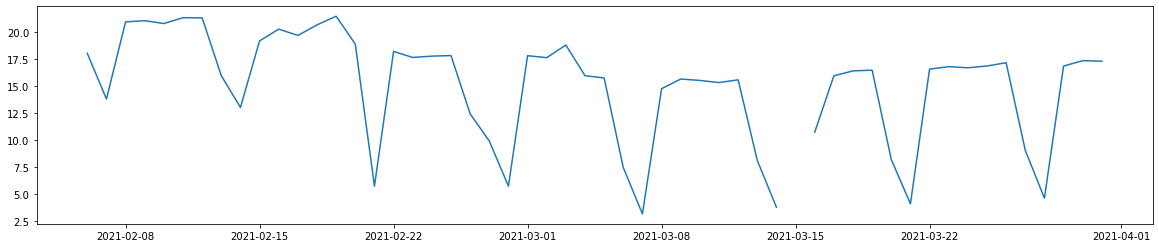

SS 9 tra Piacenza e Pontenure


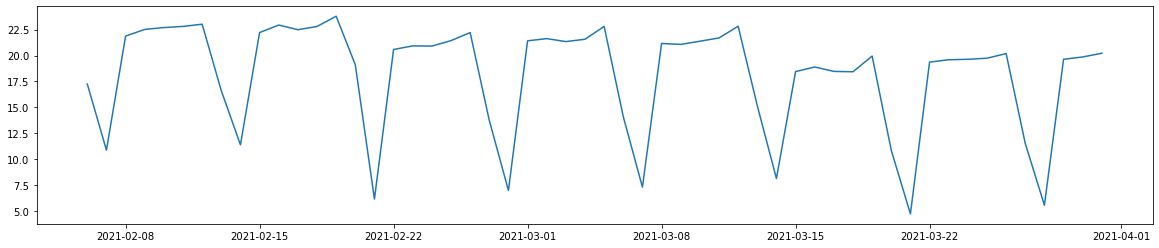

SS 9 tra Rimini e Santa Giustina


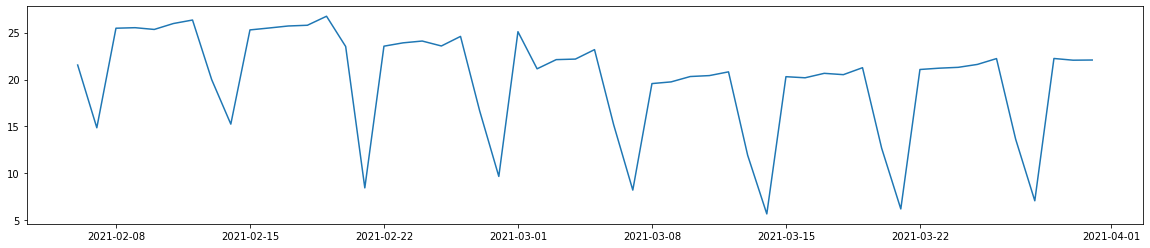

SS 9 tra Ronco e Forlimpopoli


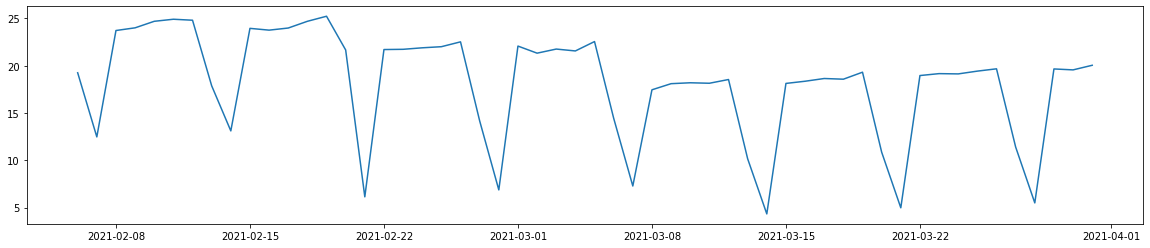

SS 9 tra San Prospero (Case Crostolo) e Sant'Ilario d'Enza


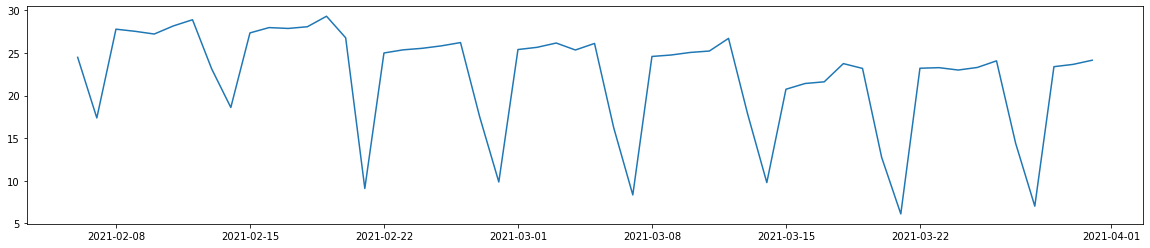

SS 9 tra Sant'Ambrogio e Castelfranco Emilia


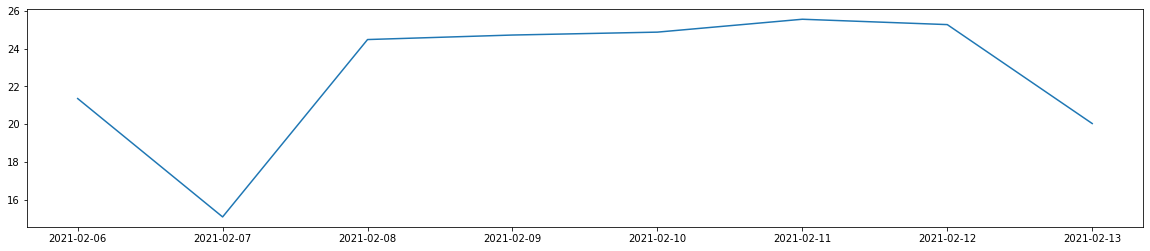

SS 9 tra Savignano sul Rubicone e Santarcangelo di Romagna


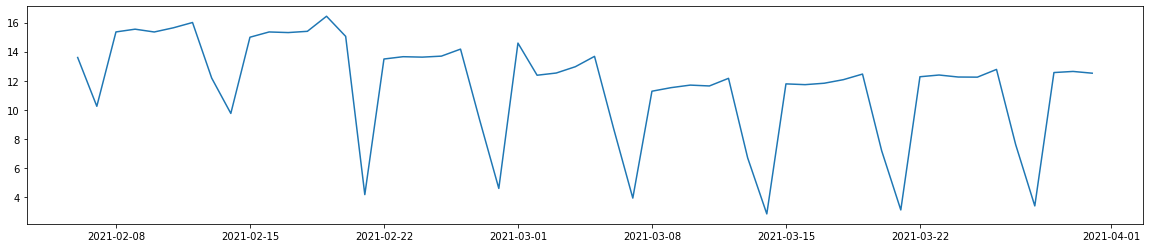

SS 9 tra la tangenziale nord di Reggio Emilia e Sant'Ilario d'Enza


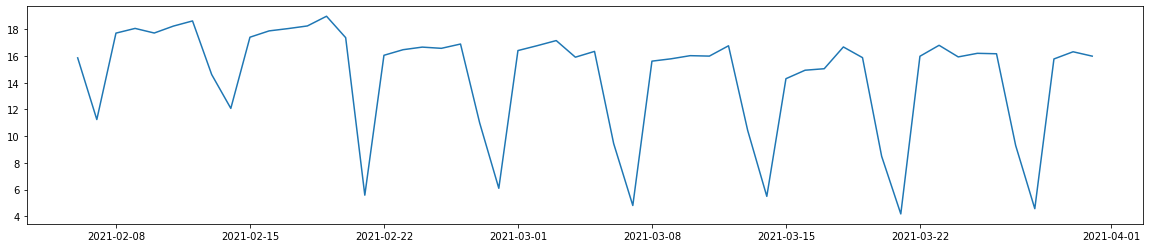

SS 9Var tra la tangenziale nord di Parma (intersezione SP 343R) e l'intersezione SP 62R


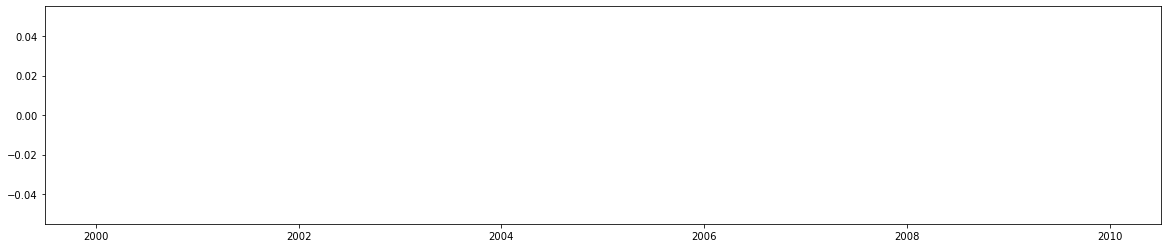

Tra Rastignano e Pian di Macina (SP85 Fondo Valle Savena)


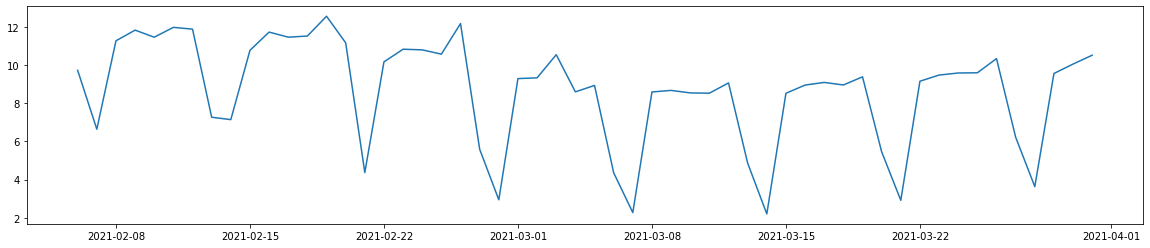

Via Adriatica (ex SS 16) tra Riccione e Misano Adriatico


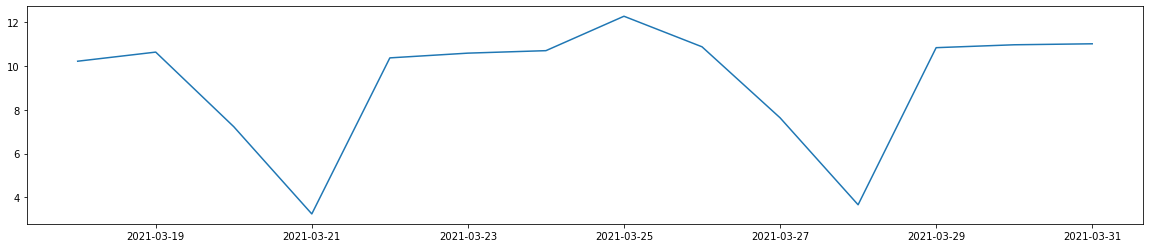

Via Emilia tra San Lazzaro e Idice


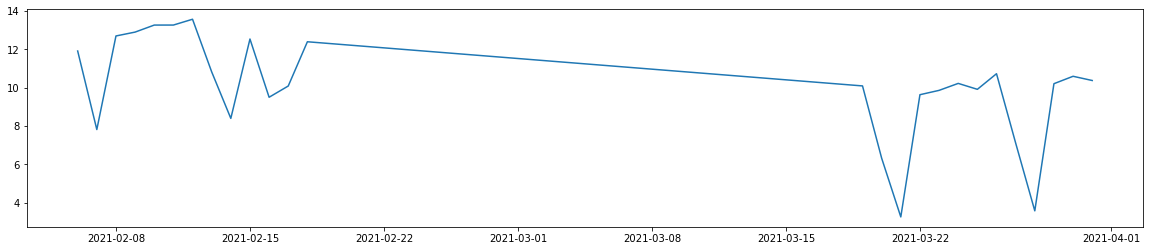

Via Porrettana (ex SS 64) tra Bologna e Pontecchio Marconi


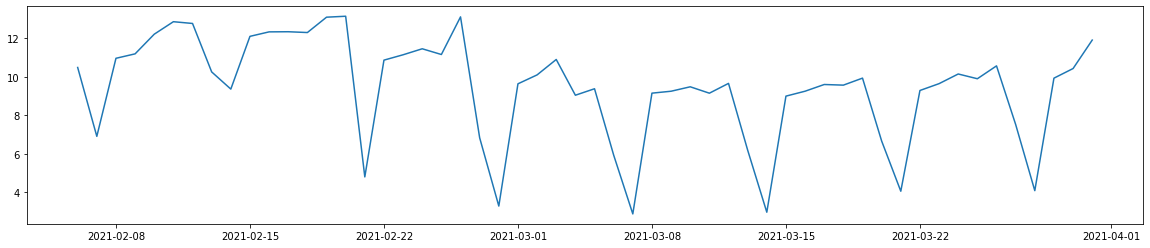

Via San Donato (ex SP 5) tra Granarolo dell'Emilia e Quarto Inferiore


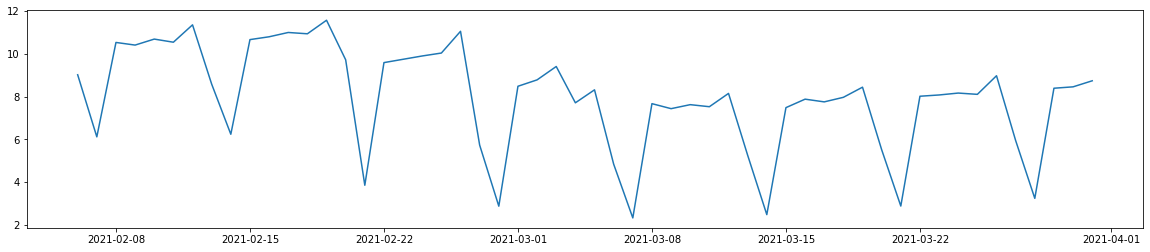

Via San Nicola (ex SP 39) tra bivio per Taneto a Caprara


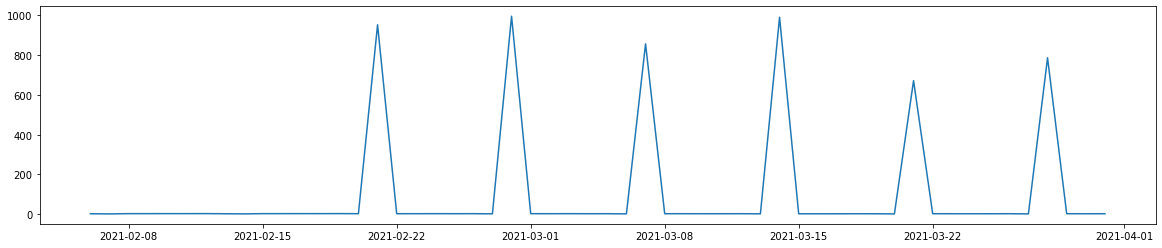

exSP 32 (via Dante Alighieri) da Felino a Pilastro


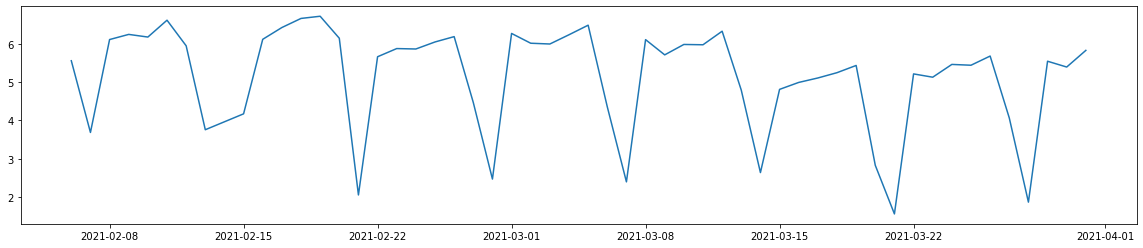

In [32]:
for i, frame in dati_agg_strada: 
    print(i)
    frame = frame.sort_values("DataNuova")
    frame = frame.set_index("DataNuova")
    plt.figure(figsize = (20, 4))
    plt.plot(frame["Transiti - Totale"])
    plt.show()